In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = ' /content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'


In [ ]:
!pip install pandas


# Data Exploration

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'

In [ ]:
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
print(sheet_names)


['Jobs by industry >', 'IND jobs local area', 'IND Jobs country', 'Jobs by occupation >', 'OCC jobs local area', 'OCC jobs country', 'Job postings > ', 'JP by occupation local area', 'Skills library', 'Top skills by occ local area', 'Skills_ Categorization', 'Jobs _ Skills_ OCC _ local area']


## Read Each Sheet into a DataFrame

In [ ]:
jobs_by_industry_df = pd.read_excel(file_path, sheet_name='Jobs by industry >')
ind_jobs_local_area_df = pd.read_excel(file_path, sheet_name='IND jobs local area')
ind_jobs_country_df = pd.read_excel(file_path, sheet_name='IND Jobs country')
jobs_by_occupation_df = pd.read_excel(file_path, sheet_name='Jobs by occupation >')
occ_jobs_local_area_df = pd.read_excel(file_path, sheet_name='OCC jobs local area')
occ_jobs_country_df = pd.read_excel(file_path, sheet_name='OCC jobs country')
job_postings_df = pd.read_excel(file_path, sheet_name='Job postings > ')
jp_by_occupation_local_area_df = pd.read_excel(file_path, sheet_name='JP by occupation local area')
top_skills_by_occ_local_area_df = pd.read_excel(file_path, sheet_name='Top skills by occ local area')
skills_library_df = pd.read_excel(file_path, sheet_name='Skills library')
jobs_skills_occ_local_area_df = pd.read_excel(file_path, sheet_name='Jobs _ Skills_ OCC _ local area')
skills_categorization_tourism_and_leisure_df = pd.read_excel(file_path, sheet_name='Skills_ Categorization')

In [ ]:
# Print the first few rows of each DataFrame
print("Jobs by Industry:")
print(jobs_by_industry_df.head())
print("\nIND Jobs Local Area:")
print(ind_jobs_local_area_df.head())
print("\nIND Jobs Country:")
print(ind_jobs_country_df.head())
print("\nJobs by Occupation:")
print(jobs_by_occupation_df.head())
print("\nOCC Jobs Local Area:")
print(occ_jobs_local_area_df.head())
print("\nOCC Jobs Country:")
print(occ_jobs_country_df.head())
print("\nJob Postings:")
print(job_postings_df.head())
print("\nJP by Occupation Local Area:")
print(jp_by_occupation_local_area_df.head())
print("\nTop Skills by OCC Local Area:")
print(top_skills_by_occ_local_area_df.head())
print("\nSkills Library:")
print(skills_library_df.head())

# Print summary information about each DataFrame
print("\nSummary Information:\n")
dataframes = [jobs_by_industry_df, ind_jobs_local_area_df, ind_jobs_country_df, jobs_by_occupation_df,
              occ_jobs_local_area_df, occ_jobs_country_df, job_postings_df, jp_by_occupation_local_area_df,
              top_skills_by_occ_local_area_df, skills_library_df]

for df in dataframes:
    print(df.info())
    print("\n")


Jobs by Industry:
Empty DataFrame
Columns: []
Index: []

IND Jobs Local Area:
    SIC                                      Industry name    2010 Jobs  \
0  01A0  Growing of Crops, Market Gardening, Horticultu...  9419.656745   
1  0161             Support Activities for Crop Production   153.710675   
2  0162           Support Activities for Animal Production     88.63445   
3  0163                       Post-harvest Crop Activities            0   
4  0164                    Seed Processing for Propagation            0   

     2030 Jobs  2010 Jobs.1    2011 Jobs     2012 Jobs    2013 Jobs  \
0  9560.720958  9419.656745  9935.440132  10061.198119  9489.673148   
1   159.582093   153.710675   193.820253    223.577121   172.525768   
2    96.758309     88.63445    96.593682    167.290683   125.158475   
3            0            0            0             0            0   
4            0            0            0             0            0   

     2014 Jobs    2015 Jobs  ...    2022 Job

## Pre-processing and data cleaning

remove empty df
drop the columns
Order the years
Change name of the columns
Delete duplicates
change <10 with 5


In [ ]:
# Remove the empty DataFrames
del jobs_by_industry_df
del jobs_by_occupation_df
del job_postings_df
del skills_library_df

In [ ]:
print(ind_jobs_local_area_df.columns)
print(ind_jobs_country_df.columns)


Index(['SIC', 'Industry name', '2010 Jobs', '2030 Jobs', '2010 Jobs.1',
       '2011 Jobs', '2012 Jobs', '2013 Jobs', '2014 Jobs', '2015 Jobs',
       '2016 Jobs', '2017 Jobs', '2018 Jobs', '2019 Jobs', '2020 Jobs',
       '2021 Jobs', '2022 Jobs', '2023 Jobs', '2024 Jobs', '2025 Jobs',
       '2026 Jobs', '2027 Jobs', '2028 Jobs', '2029 Jobs', '2030 Jobs.1',
       '2022 Jobs.1'],
      dtype='object')
Index(['SIC', 'Industry name', '2010 Jobs', '2030 Jobs', '2010 Jobs.1',
       '2011 Jobs', '2012 Jobs', '2013 Jobs', '2014 Jobs', '2015 Jobs',
       '2016 Jobs', '2017 Jobs', '2018 Jobs', '2019 Jobs', '2020 Jobs',
       '2021 Jobs', '2022 Jobs', '2023 Jobs', '2024 Jobs', '2025 Jobs',
       '2026 Jobs', '2027 Jobs', '2028 Jobs', '2029 Jobs', '2030 Jobs.1',
       '2022 Jobs.1'],
      dtype='object')


In [ ]:
# Identify columns with " Jobs.1" in 'ind_jobs_local_area_df'
columns_to_drop_local_area = [col for col in ind_jobs_local_area_df.columns if " Jobs.1" in col]

# Drop these columns from 'ind_jobs_local_area_df'
ind_jobs_local_area_df.drop(columns=columns_to_drop_local_area, axis=1, inplace=True)

# Identify columns with " Jobs.1" in 'ind_jobs_country_df'
columns_to_drop_country = [col for col in ind_jobs_country_df.columns if " Jobs.1" in col]

# Drop these columns from 'ind_jobs_country_df'
ind_jobs_country_df.drop(columns=columns_to_drop_country, axis=1, inplace=True)

# Optional: Print a portion of the dataframes to confirm the changes
print(ind_jobs_local_area_df.head())
print(ind_jobs_country_df.head())


    SIC                                      Industry name    2010 Jobs  \
0  01A0  Growing of Crops, Market Gardening, Horticultu...  9419.656745   
1  0161             Support Activities for Crop Production   153.710675   
2  0162           Support Activities for Animal Production     88.63445   
3  0163                       Post-harvest Crop Activities            0   
4  0164                    Seed Processing for Propagation            0   

     2030 Jobs    2011 Jobs     2012 Jobs    2013 Jobs    2014 Jobs  \
0  9560.720958  9935.440132  10061.198119  9489.673148  9722.796286   
1   159.582093   193.820253    223.577121   172.525768   202.413179   
2    96.758309    96.593682    167.290683   125.158475   109.542865   
3            0            0             0            0            0   
4            0            0             0            0            0   

     2015 Jobs    2016 Jobs  ...    2020 Jobs     2021 Jobs    2022 Jobs  \
0  9493.957992  9510.923243  ...  9998.723737 

In [ ]:
# Create dictionary and rename columns for 'ind_jobs_local_area_df'
rename_dict_local_area = {col: col.replace(" Jobs", "") for col in ind_jobs_local_area_df.columns}
ind_jobs_local_area_df.rename(columns=rename_dict_local_area, inplace=True)

# Create dictionary and rename columns for 'ind_jobs_country_df'
rename_dict_country = {col: col.replace(" Jobs", "") for col in ind_jobs_country_df.columns}
ind_jobs_country_df.rename(columns=rename_dict_country, inplace=True)

# Optional: Print a portion of the dataframes to confirm the changes
print(ind_jobs_local_area_df.columns)
print(ind_jobs_country_df.columns)


Index(['SIC', 'Industry name', '2010', '2030', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024', '2025', '2026', '2027', '2028', '2029'],
      dtype='object')
Index(['SIC', 'Industry name', '2010', '2030', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024', '2025', '2026', '2027', '2028', '2029'],
      dtype='object')


In [ ]:
# Define the range of years
years = [str(year) for year in range(2010, 2031)]

# Total jobs per year for local area
total_jobs_local_area = {
    '2010': 219569, '2011': 267132, '2012': 219569, '2013': 215477,
    '2014': 216957, '2015': 217513, '2016': 219120, '2017': 225645,
    '2018': 229696, '2019': 231263, '2020': 232536, '2021': 235260,
    '2022': 232635, '2023': 245568, '2024': 251649, '2025': 255490,
    '2026': 258653, '2027': 261341, '2028': 263678, '2029': 265091,
    '2030': 266022
}

# Total jobs per year for the country
total_jobs_country = {
    '2010': 28439523, '2011': 34490331, '2012': 28439523, '2013': 28452283,
    '2014': 28655252, '2015': 28961959, '2016': 29756145, '2017': 30549098,
    '2018': 31047323, '2019': 31371984, '2020': 31650115, '2021': 31954187,
    '2022': 31349983, '2023': 32241606, '2024': 32879044, '2025': 33277583,
    '2026': 33605791, '2027': 33884768, '2028': 34127357, '2029': 34273930,
    '2030': 34441623
}

# Function to replace '<10' values
def replace_less_than_10(df, total_jobs):
    for year in years:
        df[year] = pd.to_numeric(df[year], errors='coerce')  # Convert '<10' to NaN
        # Sum known values, excluding the last row
        known_sum = df.iloc[:-1][year].sum()
        total_jobs_year = total_jobs[year]
        remainder = total_jobs_year - known_sum
        num_less_than_10 = df.iloc[:-1][year].isna().sum()  # Count NaNs (formerly '<10'), excluding the last row
        average_for_less_than_10 = remainder / num_less_than_10 if num_less_than_10 != 0 else 0
        # Apply the average to all '<10' entries except the last row
        isna_mask = df[year].isna()
        isna_mask.iloc[-1] = False  # Set the last element to False to exclude the last row
        df.loc[isna_mask, year] = average_for_less_than_10

# Apply the function to each DataFrame
replace_less_than_10(ind_jobs_local_area_df, total_jobs_local_area)
replace_less_than_10(ind_jobs_country_df, total_jobs_country)




In [ ]:
# Columns that are not years
non_year_columns = ['SIC', 'Industry name']

# Extracting and sorting year columns
year_columns = sorted([col for col in ind_jobs_local_area_df.columns if col not in non_year_columns])

# New column order
new_column_order = non_year_columns + year_columns

# Reordering columns for 'ind_jobs_local_area_df'
ind_jobs_local_area_df = ind_jobs_local_area_df[new_column_order]

# Reordering columns for 'ind_jobs_country_df'
ind_jobs_country_df = ind_jobs_country_df[new_column_order]

# Optional: Print a portion of the dataframes to confirm the changes
print(ind_jobs_local_area_df.columns)
print(ind_jobs_country_df.columns)


Index(['SIC', 'Industry name', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025', '2026', '2027', '2028', '2029', '2030'],
      dtype='object')
Index(['SIC', 'Industry name', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025', '2026', '2027', '2028', '2029', '2030'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming ind_jobs_local_area_df and ind_jobs_country_df are already defined dataframes

# Print the first 11 values of the ind_jobs_local_area_df dataframe
print("First 11 values of ind_jobs_local_area_df:")
print(ind_jobs_local_area_df.head(11))

# Print a separator for clarity
print("\n" + "-"*50 + "\n")

# Print the first 11 values of the ind_jobs_country_df dataframe
print("First 11 values of ind_jobs_country_df:")
print(ind_jobs_country_df.head(11))


First 11 values of ind_jobs_local_area_df:
     SIC                                      Industry name         2010  \
0   01A0  Growing of Crops, Market Gardening, Horticultu...  9419.656745   
1   0161             Support Activities for Crop Production   153.710675   
2   0162           Support Activities for Animal Production    88.634450   
3   0163                       Post-harvest Crop Activities     0.000000   
4   0164                    Seed Processing for Propagation     0.000000   
5   0170   Hunting, Trapping and Related Service Activities     3.958503   
6   0210         Silviculture and Other Forestry Activities    93.924286   
7   0220                                            Logging     0.000000   
8   0230        Gathering of Wild Growing Non-wood Products     0.000000   
9   0240                       Support Services to Forestry    52.215944   
10  0311                                     Marine Fishing   320.356032   

           2011          2012         2013  

In [ ]:
rows, columns = ind_jobs_local_area_df.shape
print("Total number of rows:", rows)
print("Total number of columns:", columns)


Total number of rows: 587
Total number of columns: 23


In [ ]:
rows, columns = ind_jobs_country_df.shape
print("Total number of rows:", rows)
print("Total number of columns:", columns)


Total number of rows: 587
Total number of columns: 23


In [ ]:
# Check for duplicates in 'ind_jobs_local_area_df'
duplicate_rows_local_area = ind_jobs_local_area_df.duplicated()
num_duplicates_local_area = duplicate_rows_local_area.sum()
print(f"Number of duplicate rows in 'ind_jobs_local_area_df': {num_duplicates_local_area}")

# Check for duplicates in 'ind_jobs_country_df'
duplicate_rows_country = ind_jobs_country_df.duplicated()
num_duplicates_country = duplicate_rows_country.sum()
print(f"Number of duplicate rows in 'ind_jobs_country_df': {num_duplicates_country}")


Number of duplicate rows in 'ind_jobs_local_area_df': 0
Number of duplicate rows in 'ind_jobs_country_df': 0


Check for Missing Values:

In [ ]:
# Checking for missing values in 'ind_jobs_local_area_df'
print("Missing Values in IND Jobs Local Area DataFrame:")
print(ind_jobs_local_area_df.isnull().sum())

# Checking for missing values in 'ind_jobs_country_df'
print("\nMissing Values in IND Jobs Country DataFrame:")
print(ind_jobs_country_df.isnull().sum())


Missing Values in IND Jobs Local Area DataFrame:
SIC              0
Industry name    0
2010             0
2011             0
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
2018             0
2019             0
2020             0
2021             0
2022             0
2023             0
2024             0
2025             0
2026             0
2027             0
2028             0
2029             0
2030             0
dtype: int64

Missing Values in IND Jobs Country DataFrame:
SIC              0
Industry name    0
2010             0
2011             0
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
2018             0
2019             0
2020             0
2021             0
2022             0
2023             0
2024             0
2025             0
2026             0
2027             0
2028             0
2029             0
2030             0
dtype: int64


# Preliminary data analysis

In [ ]:
# Descriptive Statistics for 'ind_jobs_local_area_df'
print("Descriptive Statistics for IND Jobs Local Area DataFrame:")
print(ind_jobs_local_area_df.describe())

# Descriptive Statistics for 'ind_jobs_country_df'
print("\nDescriptive Statistics for IND Jobs Country DataFrame:")
print(ind_jobs_country_df.describe())


Descriptive Statistics for IND Jobs Local Area DataFrame:
                2010           2011           2012           2013  \
count     587.000000     587.000000     587.000000     587.000000   
mean      748.106320     822.161737     743.656422     737.632115   
std      9114.653398    8940.463395    9005.777436    9033.523784   
min         0.000000       0.000000       0.000000     -26.289483   
25%         3.958503      16.397231      16.439740       0.000000   
50%        35.235612     127.134955      42.716040      44.957424   
75%       238.150765     578.012696     263.440113     246.126961   
max    219569.409666  215476.939633  216957.319727  217513.051521   

                2014           2015           2016           2017  \
count     587.000000     587.000000     587.000000     587.000000   
mean      742.891357     754.954431     764.592385     778.378493   
std      9099.068118    9368.017595    9537.204788    9604.944886   
min       -23.763710     -96.734468    -132.

In [ ]:
# Print the column names for 'ind_jobs_local_area_df'
print("Column names in 'ind_jobs_local_area_df':")
print(ind_jobs_local_area_df.columns)

# Print the column names for 'ind_jobs_country_df'
print("Column names in 'ind_jobs_country_df':")
print(ind_jobs_country_df.columns)


Column names in 'ind_jobs_local_area_df':
Index(['SIC', 'Industry name', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025', '2026', '2027', '2028', '2029', '2030'],
      dtype='object')
Column names in 'ind_jobs_country_df':
Index(['SIC', 'Industry name', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025', '2026', '2027', '2028', '2029', '2030'],
      dtype='object')


In [ ]:
print("Last row of ind_jobs_local_area_df:")
print(ind_jobs_local_area_df.tail(1))


Last row of ind_jobs_local_area_df:
           SIC   Industry name           2010           2011           2012  \
586  All codes  All Industries  219569.409666  215476.939633  216957.319727   

              2013           2014           2015           2016  \
586  217513.051521  219120.226451  225645.250764  229695.730022   

              2017  ...        2021           2022           2023  \
586  231263.175347  ...  245568.098  251649.370564  255489.812097   

              2024           2025          2026           2027           2028  \
586  258652.528653  261340.837727  263678.49779  265090.915929  266021.993094   

              2029           2030  
586  266674.094098  267131.707006  

[1 rows x 23 columns]


In [ ]:
print("Last row of ind_jobs_country_df:")
print(ind_jobs_country_df.tail(1))


Last row of ind_jobs_country_df:
           SIC   Industry name          2010          2011          2012  \
586  All codes  All Industries  2.843952e+07  2.845228e+07  2.865525e+07   

             2013          2014          2015          2016          2017  \
586  2.896196e+07  2.975614e+07  3.054910e+07  3.104732e+07  3.137198e+07   

     ...          2021          2022          2023          2024  \
586  ...  3.224161e+07  3.287904e+07  3.327758e+07  3.360579e+07   

             2025          2026          2027          2028          2029  \
586  3.388477e+07  3.412736e+07  3.427393e+07  3.437262e+07  3.444177e+07   

             2030  
586  3.449033e+07  

[1 rows x 23 columns]


#### Estraggo solo righe dei SIC turismo

In [ ]:
import pandas as pd

# Assuming ind_jobs_local_area_df and ind_jobs_country_df are already defined DataFrames

# List of SIC codes you are interested in
sic_codes_tourism = ['5510', '5520', '5530', '5590', '5610', '5621', '5629', '5630', '7711', '7721',
             '7722', '7734', '7735', '9001', '9002', '9003', '9004', '9101', '9102', '9103',
             '9104', '9311', '9312', '9313', '9319', '9321', '9329', '9499', '9602', '9604']

# Filtering rows in local area DataFrame
filtered_local_area_df = ind_jobs_local_area_df[ind_jobs_local_area_df['SIC'].isin(sic_codes_tourism)]

# Filtering rows in country DataFrame
filtered_country_df = ind_jobs_country_df[ind_jobs_country_df['SIC'].isin(sic_codes_tourism)]

# Displaying the filtered DataFrames
print("Filtered Local Area DataFrame:")
print(filtered_local_area_df)

print("\nFiltered Country DataFrame:")
print(filtered_country_df)


Filtered Local Area DataFrame:
      SIC                                      Industry name         2010  \
412  5510                   Hotels and Similar Accommodation  9003.292589   
413  5520         Holiday and Other Short-stay Accommodation  2286.934516   
414  5530  Camping Grounds, Recreational Vehicle Parks an...  1973.702693   
415  5590                                Other Accommodation   228.311590   
416  5610     Restaurants and Mobile Food Service Activities  8109.286297   
417  5621                          Event Catering Activities   951.026607   
418  5629                      Other Food Service Activities    39.192515   
419  5630                        Beverage Serving Activities  7245.358154   
487  7711  Renting and Leasing of Cars and Light Motor Ve...    68.304921   
489  7721  Renting and Leasing of Recreational and Sports...    89.774809   
490  7722                   Renting of Video Tapes and Disks    65.778935   
495  7734   Renting and Leasing of Water Tran

In [ ]:
import pandas as pd

# Assuming filtered_local_area_df and filtered_country_df are already defined and filtered for tourism SIC codes

# Function to aggregate job numbers by year
def aggregate_tourism_jobs(df):
    # Select only the year columns
    year_columns = [col for col in df.columns if col.isdigit()]
    # Aggregate job numbers for each year
    aggregated_df = df[year_columns].sum()
    return aggregated_df

# Aggregate job numbers for the tourism industry in the local area
tourism_jobs_local_area = aggregate_tourism_jobs(filtered_local_area_df)
print("Tourism Jobs in Local Area (2010 - 2030):")
print(tourism_jobs_local_area)

# Aggregate job numbers for the tourism industry in the country
tourism_jobs_country = aggregate_tourism_jobs(filtered_country_df)
print("\nTourism Jobs in Country (2010 - 2030):")
print(tourism_jobs_country)


Tourism Jobs in Local Area (2010 - 2030):
2010    39091.895338
2011    36910.868752
2012    37419.329067
2013    37142.958233
2014    40093.253242
2015    37643.217875
2016    41157.369921
2017    44485.962139
2018    45676.649028
2019    43841.562761
2020    40713.992700
2021    44806.686442
2022    46525.701799
2023    47640.312945
2024    48447.394614
2025    49105.241299
2026    49673.829204
2027    50031.719219
2028    50274.036930
2029    50440.155682
2030    50554.798814
dtype: float64

Tourism Jobs in Country (2010 - 2030):
2010    2.797995e+06
2011    2.839628e+06
2012    2.860130e+06
2013    2.975456e+06
2014    3.040317e+06
2015    3.189756e+06
2016    3.319468e+06
2017    3.371526e+06
2018    3.413777e+06
2019    3.487198e+06
2020    3.204545e+06
2021    3.415288e+06
2022    3.550226e+06
2023    3.603823e+06
2024    3.647961e+06
2025    3.685479e+06
2026    3.718103e+06
2027    3.737815e+06
2028    3.750833e+06
2029    3.759952e+06
2030    3.766346e+06
dtype: float64


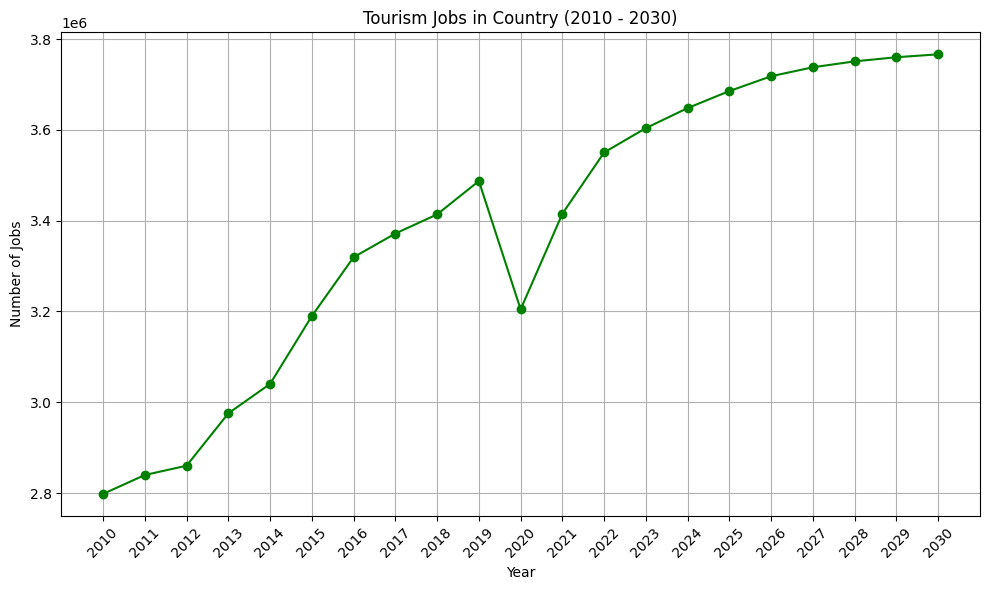

In [ ]:
import matplotlib.pyplot as plt

# Plotting Tourism Jobs in Local Area
plt.figure(figsize=(10, 6))
plt.plot(tourism_jobs_local_area.index, tourism_jobs_local_area.values, marker='o', linestyle='-', color='blue')
plt.title('Tourism Jobs in Local Area (2010 - 2030)')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Tourism Jobs in the Country
plt.figure(figsize=(10, 6))
plt.plot(tourism_jobs_country.index, tourism_jobs_country.values, marker='o', linestyle='-', color='green')
plt.title('Tourism Jobs in Country (2010 - 2030)')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Converting the total jobs dictionaries to Series for easier calculations
total_jobs_local_area_series = pd.Series(total_jobs_local_area)
total_jobs_country_series = pd.Series(total_jobs_country)

# Calculating the weight in percentage of the Tourism industry
tourism_weight_local_area = (tourism_jobs_local_area / total_jobs_local_area_series) * 100
tourism_weight_country = (tourism_jobs_country / total_jobs_country_series) * 100

# Printing the results
print("Tourism Industry's Percentage of Total Jobs in Local Area (2010 - 2030):")
print(tourism_weight_local_area)

print("\nTourism Industry's Percentage of Total Jobs in Country (2010 - 2030):")
print(tourism_weight_country)


Tourism Industry's Percentage of Total Jobs in Local Area (2010 - 2030):
2010    17.803923
2011    13.817464
2012    17.042173
2013    17.237551
2014    18.479815
2015    17.306192
2016    18.783028
2017    19.715022
2018    19.885696
2019    18.957448
2020    17.508684
2021    19.045603
2022    19.999442
2023    19.400049
2024    19.251972
2025    19.220025
2026    19.204815
2027    19.144229
2028    19.066451
2029    19.027487
2030    19.003992
dtype: float64

Tourism Industry's Percentage of Total Jobs in Country (2010 - 2030):
2010     9.838403
2011     8.233113
2012    10.056884
2013    10.457704
2014    10.609980
2015    11.013607
2016    11.155570
2017    11.036416
2018    10.995398
2019    11.115642
2020    10.124908
2021    10.688077
2022    11.324492
2023    11.177554
2024    11.095096
2025    11.074960
2026    11.063876
2027    11.030958
2028    10.990694
2029    10.970296
2030    10.935449
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Plotting Percentage of Tourism Industry in Total Jobs for Local Area
plt.figure(figsize=(12, 6))
plt.plot(tourism_weight_local_area.index, tourism_weight_local_area.values, marker='o', linestyle='-', color='blue', label='Local Area')
plt.title('Percentage of Total Jobs in Tourism Industry - Local Area (2010 - 2030)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Percentage of Tourism Industry in Total Jobs for Country
plt.figure(figsize=(12, 6))
plt.plot(tourism_weight_country.index, tourism_weight_country.values, marker='o', linestyle='-', color='green', label='Country')
plt.title('Percentage of Total Jobs in Tourism Industry - Country (2010 - 2030)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Particularly important to understand the specificities of the territories and the relevance that assume the tourism and leisure sector in the local area in comparison with the country context.

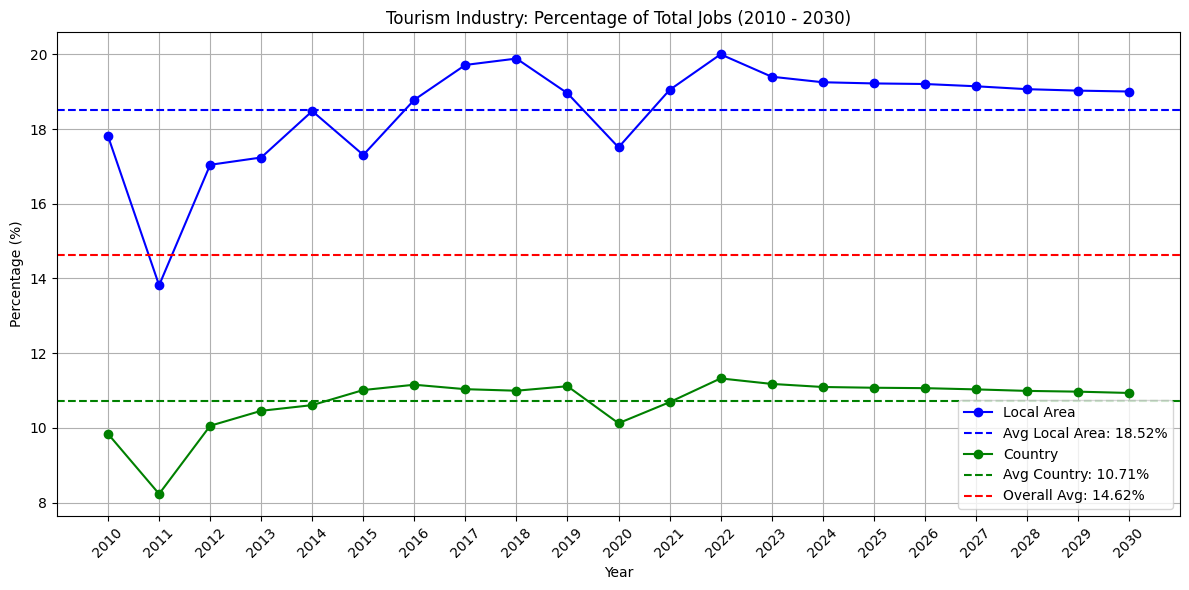

In [ ]:
import matplotlib.pyplot as plt

# Calculating the averages
average_local_area = tourism_weight_local_area.mean()
average_country = tourism_weight_country.mean()
general_average = (average_local_area + average_country) / 2

# Plotting both Local Area and Country percentages on the same graph
plt.figure(figsize=(12, 6))

# Line for Local Area
plt.plot(tourism_weight_local_area.index, tourism_weight_local_area.values, marker='o', linestyle='-', color='blue', label='Local Area')
# Average line for Local Area with value in legend
plt.axhline(y=average_local_area, color='blue', linestyle='--', label=f'Avg Local Area: {average_local_area:.2f}%')

# Line for Country
plt.plot(tourism_weight_country.index, tourism_weight_country.values, marker='o', linestyle='-', color='green', label='Country')
# Average line for Country with value in legend
plt.axhline(y=average_country, color='green', linestyle='--', label=f'Avg Country: {average_country:.2f}%')

# General Average line with value in legend
plt.axhline(y=general_average, color='red', linestyle='--', label=f'Overall Avg: {general_average:.2f}%')

# Adding title and labels
plt.title('Tourism Industry: Percentage of Total Jobs (2010 - 2030)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Adding legends, grid and other layout adjustments
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Calculating the medians
median_local_area = tourism_weight_local_area.median()
median_country = tourism_weight_country.median()

# Plotting both Local Area and Country percentages on the same graph
plt.figure(figsize=(12, 6))

# Line for Local Area
plt.plot(tourism_weight_local_area.index, tourism_weight_local_area.values, marker='o', linestyle='-', color='blue', label='Local Area')
# Median line for Local Area with value in legend
plt.axhline(y=median_local_area, color='blue', linestyle=':', label=f'Median Local Area: {median_local_area:.2f}%')

# Line for Country
plt.plot(tourism_weight_country.index, tourism_weight_country.values, marker='o', linestyle='-', color='green', label='Country')
# Median line for Country with value in legend
plt.axhline(y=median_country, color='green', linestyle=':', label=f'Median Country: {median_country:.2f}%')

# Adding title and labels
plt.title('Tourism Industry: Percentage of Total Jobs (2010 - 2030)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Adding averages to the legend
plt.axhline(y=average_local_area, color='blue', linestyle='--', label=f'Avg Local Area: {average_local_area:.2f}%')
plt.axhline(y=average_country, color='green', linestyle='--', label=f'Avg Country: {average_country:.2f}%')
plt.axhline(y=general_average, color='red', linestyle='--', label=f'Overall Avg: {general_average:.2f}%')

# Adding legends, grid and other layout adjustments
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


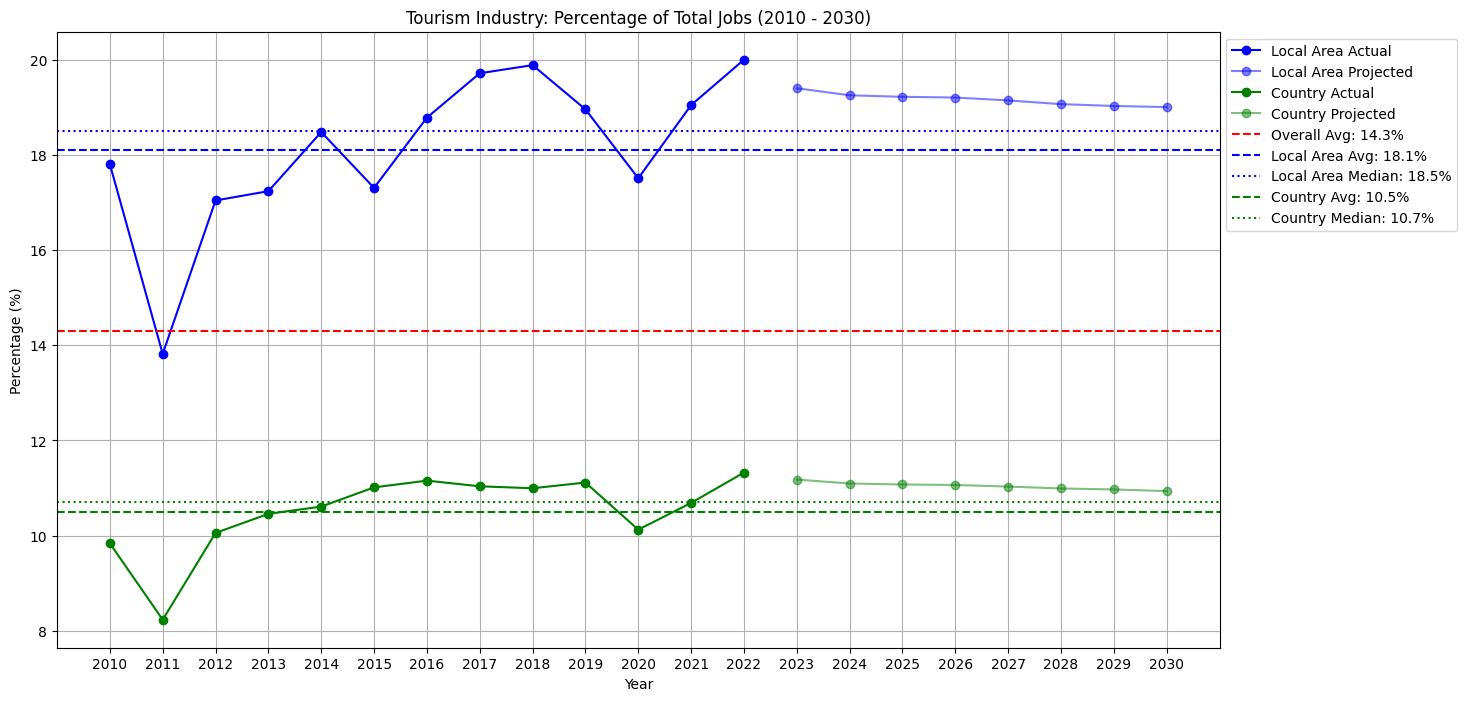

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming that 'tourism_weight_local_area' and 'tourism_weight_country' are pre-defined Pandas Series
# with the index as years in string format (e.g., '2010', '2011', ..., '2030')
# Here's an example of how these Series might be defined:
# tourism_weight_local_area = pd.Series([...], index=[str(year) for year in range(2010, 2031)])
# tourism_weight_country = pd.Series([...], index=[str(year) for year in range(2010, 2031)])

# Calculate averages and medians for actual data up to 2022
average_local_area = round(tourism_weight_local_area.loc[:'2022'].mean(), 1)
average_country = round(tourism_weight_country.loc[:'2022'].mean(), 1)
median_local_area = round(tourism_weight_local_area.loc[:'2022'].median(), 1)
median_country = round(tourism_weight_country.loc[:'2022'].median(), 1)
general_average = round((average_local_area + average_country) / 2, 1)

# Begin plotting with an increased figure size
plt.figure(figsize=(15, 8))

# Plot actual data lines for local area and country
plt.plot(tourism_weight_local_area.index[:13], tourism_weight_local_area.values[:13], marker='o', linestyle='-', color='blue', label='Local Area Actual')
plt.plot(tourism_weight_country.index[:13], tourism_weight_country.values[:13], marker='o', linestyle='-', color='green', label='Country Actual')

# Plot projected data lines for local area and country with reduced opacity
plt.plot(tourism_weight_local_area.index[13:], tourism_weight_local_area.values[13:], marker='o', linestyle='-', color='blue', label='Local Area Projected', alpha=0.5)
plt.plot(tourism_weight_country.index[13:], tourism_weight_country.values[13:], marker='o', linestyle='-', color='green', label='Country Projected', alpha=0.5)

# Add horizontal lines for averages and medians
plt.axhline(y=general_average, color='red', linestyle='--', label=f'Overall Avg: {general_average}%')
plt.axhline(y=average_local_area, color='blue', linestyle='--', label=f'Local Area Avg: {average_local_area}%')
plt.axhline(y=average_country, color='green', linestyle='--', label=f'Country Avg: {average_country}%')
plt.axhline(y=median_local_area, color='blue', linestyle=':', label=f'Local Area Median: {median_local_area}%')
plt.axhline(y=median_country, color='green', linestyle=':', label=f'Country Median: {median_country}%')

# Add titles and axis labels
plt.title('Tourism Industry: Percentage of Total Jobs (2010 - 2030)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Organize the legend. Ensure every handle and label is included.
handles, labels = plt.gca().get_legend_handles_labels()
# This assumes there are 8 items to display in the legend. If there are more or fewer, adjust accordingly.
order = [0, 2, 1, 3, 4, 5, 7, 6, 8]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', bbox_to_anchor=(1, 1))

# Add grid
plt.grid(True)

# Display the plot
plt.show()


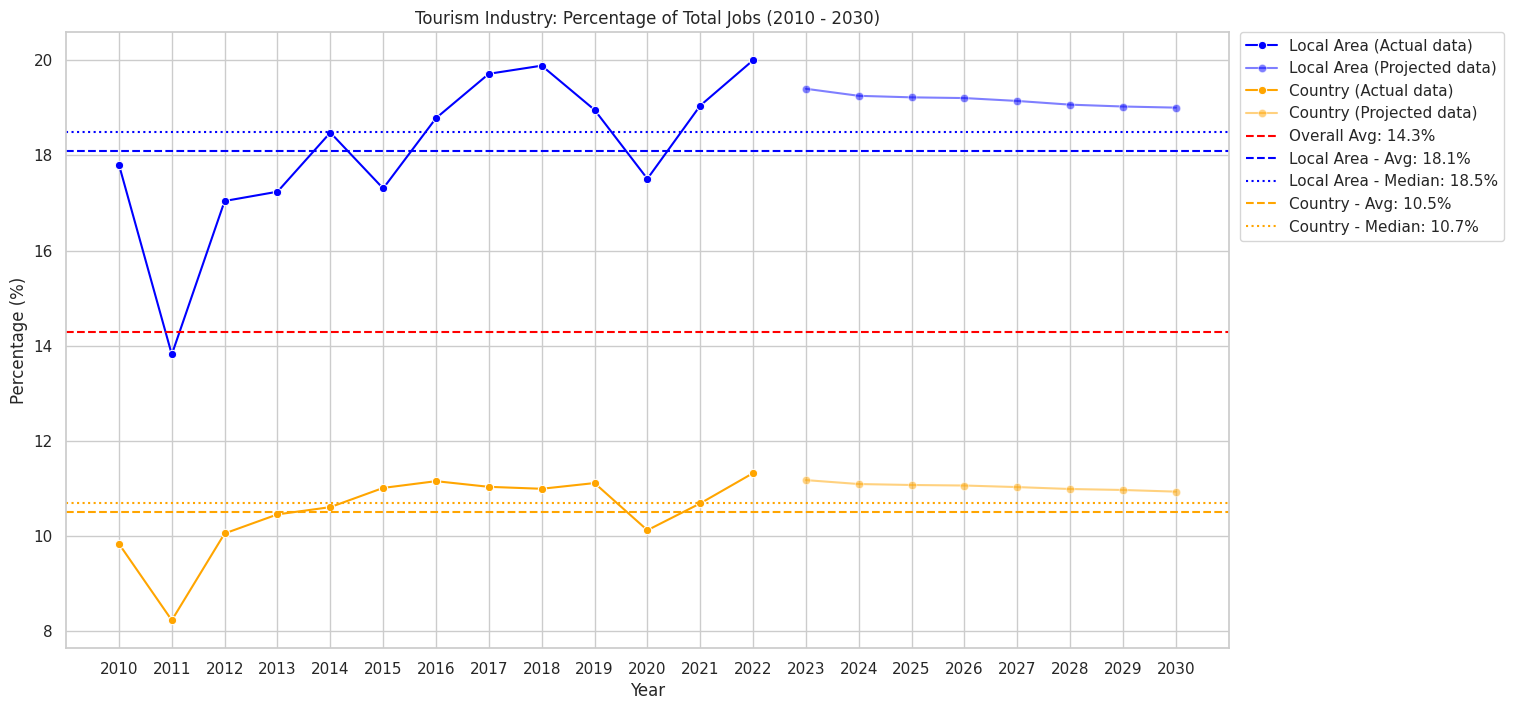

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming that 'tourism_weight_local_area' and 'tourism_weight_country' are pre-defined Pandas Series
# with the index as years in string format (e.g., '2010', '2011', ..., '2030')
# Here's an example of how these Series might be defined:
# tourism_weight_local_area = pd.Series([...], index=[str(year) for year in range(2010, 2031)])
# tourism_weight_country = pd.Series([...], index=[str(year) for year in range(2010, 2031)])

# Calculate averages and medians for actual data up to 2022
average_local_area = round(tourism_weight_local_area.loc[:'2022'].mean(), 1)
average_country = round(tourism_weight_country.loc[:'2022'].mean(), 1)
median_local_area = round(tourism_weight_local_area.loc[:'2022'].median(), 1)
median_country = round(tourism_weight_country.loc[:'2022'].median(), 1)
general_average = round((average_local_area + average_country) / 2, 1)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Begin plotting with an increased figure size
plt.figure(figsize=(15, 8))

# Create a DataFrame for easier plotting with Seaborn
data = pd.DataFrame({
    'Year': tourism_weight_local_area.index,
    'Local Area': tourism_weight_local_area.values,
    'Country': tourism_weight_country.values
})

# Plot actual data lines for local area and country
sns.lineplot(x='Year', y='Local Area', data=data[:13], marker='o', linestyle='-', color='blue', label='Local Area (Actual data)')
sns.lineplot(x='Year', y='Country', data=data[:13], marker='o', linestyle='-', color='orange', label='Country (Actual data)')

# Plot projected data lines for local area and country with reduced opacity
sns.lineplot(x='Year', y='Local Area', data=data[13:], marker='o', linestyle='-', color='blue', label='Local Area (Projected data)', alpha=0.5)
sns.lineplot(x='Year', y='Country', data=data[13:], marker='o', linestyle='-', color='orange', label='Country (Projected data)', alpha=0.5)

# Add horizontal lines for averages and medians
plt.axhline(y=general_average, color='red', linestyle='--', label=f'Overall Avg: {general_average}%')
plt.axhline(y=average_local_area, color='blue', linestyle='--', label=f'Local Area - Avg: {average_local_area}%')
plt.axhline(y=average_country, color='orange', linestyle='--', label=f'Country - Avg: {average_country}%')
plt.axhline(y=median_local_area, color='blue', linestyle=':', label=f'Local Area - Median: {median_local_area}%')
plt.axhline(y=median_country, color='orange', linestyle=':', label=f'Country - Median: {median_country}%')

# Add titles and axis labels
plt.title('Tourism Industry: Percentage of Total Jobs (2010 - 2030)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Organize the legend and position it outside the top right corner
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 2, 1, 3, 4, 5, 7, 6, 8]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0.)

# Display the plot
plt.show()


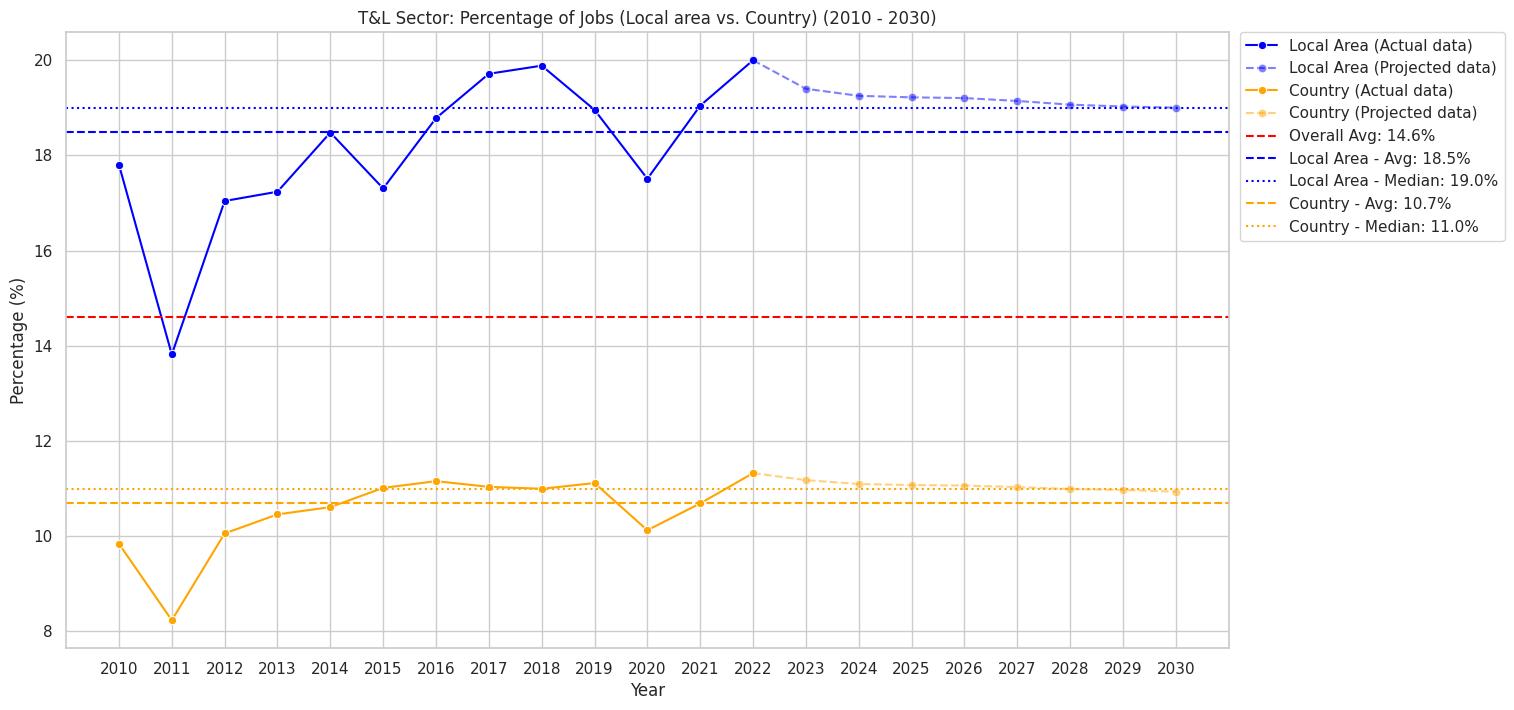

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ... [Assuming the same setup for tourism_weight_local_area and tourism_weight_country] ...

# Calculate averages and medians for actual data up to 2022
average_local_area = round(tourism_weight_local_area.loc[:'2030'].mean(), 1)
average_country = round(tourism_weight_country.loc[:'2030'].mean(), 1)
median_local_area = round(tourism_weight_local_area.loc[:'2030'].median(), 1)
median_country = round(tourism_weight_country.loc[:'2030'].median(), 1)
general_average = round((average_local_area + average_country) / 2, 1)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

data = pd.DataFrame({
    'Year': tourism_weight_local_area.index,
    'Local Area': tourism_weight_local_area.values,
    'Country': tourism_weight_country.values
})

# Plot actual data with solid lines
sns.lineplot(x='Year', y='Local Area', data=data[:13], marker='o', linestyle='-', color='blue', label='Local Area (Actual data)')
sns.lineplot(x='Year', y='Country', data=data[:13], marker='o', linestyle='-', color='orange', label='Country (Actual data)')

# Continue the lines with projected data in dashed lines
sns.lineplot(x='Year', y='Local Area', data=data[12:], marker='o', linestyle='--', color='blue', label='Local Area (Projected data)', alpha=0.5)
sns.lineplot(x='Year', y='Country', data=data[12:], marker='o', linestyle='--', color='orange', label='Country (Projected data)', alpha=0.5)

# Add horizontal lines for averages and medians
plt.axhline(y=general_average, color='red', linestyle='--', label=f'Overall Avg: {general_average}%')
plt.axhline(y=average_local_area, color='blue', linestyle='--', label=f'Local Area - Avg: {average_local_area}%')
plt.axhline(y=average_country, color='orange', linestyle='--', label=f'Country - Avg: {average_country}%')
plt.axhline(y=median_local_area, color='blue', linestyle=':', label=f'Local Area - Median: {median_local_area}%')
plt.axhline(y=median_country, color='orange', linestyle=':', label=f'Country - Median: {median_country}%')

# Add titles and axis labels
plt.title('T&L Sector: Percentage of Jobs (Local area vs. Country) (2010 - 2030)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Organize the legend and position it outside the top right corner
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 2, 1, 3, 4, 5, 7, 6, 8]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0.)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ... [Assuming the same setup for tourism_weight_local_area and tourism_weight_country] ...

# Calculate averages and medians for data including projected data up to 2030
average_local_area = round(tourism_weight_local_area.loc[:'2030'].mean(), 1)
average_country = round(tourism_weight_country.loc[:'2030'].mean(), 1)
median_local_area = round(tourism_weight_local_area.loc[:'2030'].median(), 1)
median_country = round(tourism_weight_country.loc[:'2030'].median(), 1)
general_average = round((average_local_area + average_country) / 2, 1)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

data = pd.DataFrame({
    'Year': tourism_weight_local_area.index,
    'Local Area': tourism_weight_local_area.values,
    'Country': tourism_weight_country.values
})

# Plot actual and projected data
sns.lineplot(x='Year', y='Local Area', data=data[:13], marker='o', linestyle='-', color='blue', label='Local Area (Actual data)')
sns.lineplot(x='Year', y='Country', data=data[:13], marker='o', linestyle='-', color='orange', label='Country (Actual data)')
sns.lineplot(x='Year', y='Local Area', data=data[12:], marker='o', linestyle='--', color='blue', label='Local Area (Projected data)', alpha=0.5)
sns.lineplot(x='Year', y='Country', data=data[12:], marker='o', linestyle='--', color='orange', label='Country (Projected data)', alpha=0.5)

# Add horizontal lines for averages and medians
plt.axhline(y=general_average, color='red', linestyle='--', label=f'Overall Avg*: {general_average}%')
plt.axhline(y=average_local_area, color='blue', linestyle='--', label=f'Local Area - Avg*: {average_local_area}%')
plt.axhline(y=average_country, color='orange', linestyle='--', label=f'Country - Avg*: {average_country}%')
plt.axhline(y=median_local_area, color='blue', linestyle=':', label=f'Local Area - Median*: {median_local_area}%')
plt.axhline(y=median_country, color='orange', linestyle=':', label=f'Country - Median*: {median_country}%')

# Add titles and axis labels
plt.title('T&L Jobs Proportion in Total Number of Jobs: Local Area Vs. Country (2010 - 2030)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Organize the legend and position it outside the top right corner
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 2, 1, 3, 4, 5, 7, 6, 8]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0.)

# Add the note in the bottom right corner
plt.text(1.21, 0.0001, '*Averages and medians include projected data.', horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, fontsize=7)

plt.show()


In [ ]:
# Assuming the data is in dictionaries named tourism_jobs_local_area, tourism_jobs_country,
# total_jobs_local_area, and total_jobs_country for simplicity.

# Example data for demonstration (this would be your actual data)
tourism_jobs_local_area = {'2022': 46525}
tourism_jobs_country = {'2022': 3550226}
total_jobs_local_area = {'2022': 232635}
total_jobs_country = {'2022': 31349983}

# Convert the total jobs dictionaries to Series for easier calculations
total_jobs_local_area_series = pd.Series(total_jobs_local_area)
total_jobs_country_series = pd.Series(total_jobs_country)

# Get the values for 2022
tourism_jobs_local_area_2022 = tourism_jobs_local_area['2022']
tourism_jobs_country_2022 = tourism_jobs_country['2022']
total_jobs_local_area_2022 = total_jobs_local_area_series['2022']
total_jobs_country_2022 = total_jobs_country_series['2022']

# Calculate the percentages
percentage_tourism_local_area_2022 = (tourism_jobs_local_area_2022 / total_jobs_local_area_2022) * 100
percentage_tourism_country_2022 = (tourism_jobs_country_2022 / total_jobs_country_2022) * 100

# Print the results
print(f"Total jobs in tourism sector in local area in 2022: {tourism_jobs_local_area_2022}")
print(f"Percentage of tourism jobs in local area in 2022: {percentage_tourism_local_area_2022:.2f}%")
print(f"Total jobs in tourism sector in country in 2022: {tourism_jobs_country_2022}")
print(f"Percentage of tourism jobs in country in 2022: {percentage_tourism_country_2022:.2f}%")


Total jobs in tourism sector in local area in 2022: 46525
Percentage of tourism jobs in local area in 2022: 20.00%
Total jobs in tourism sector in country in 2022: 3550226
Percentage of tourism jobs in country in 2022: 11.32%


In the local area, there were 46,525 jobs in the tourism sector in 2022. This number represents 20% of the total jobs in the local area, which indicates that 1 out of every 5 jobs in the local area was in the tourism sector.

In the country, there were 3,550,226 jobs in the tourism sector in 2022. This number represents approximately 11.32% of the total jobs in the country, meaning a bit more than 1 out of every 10 jobs in the country was in the tourism sector.

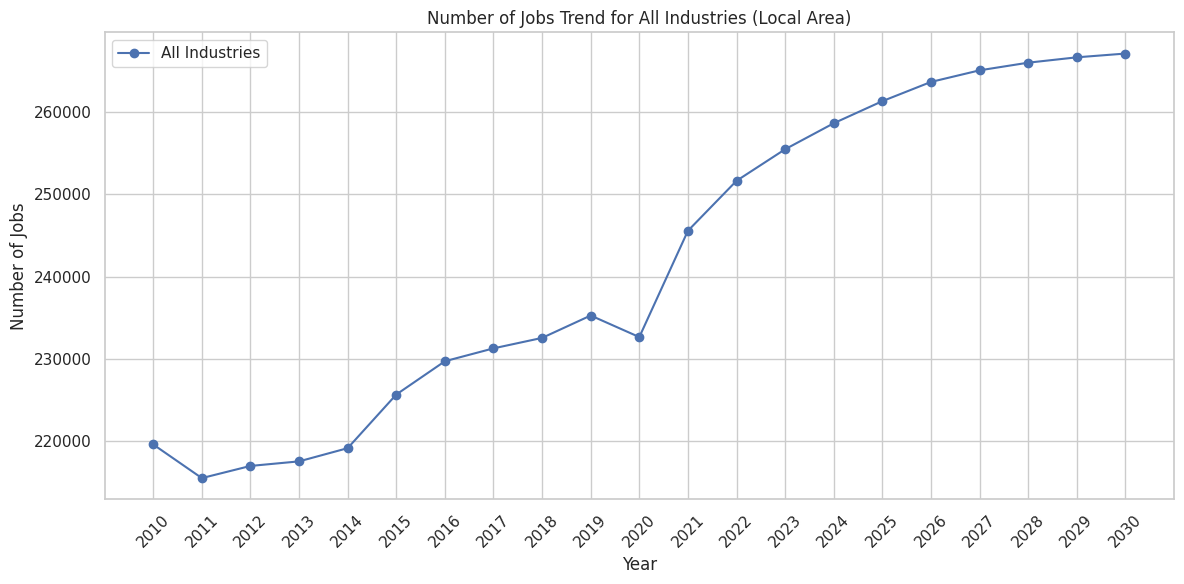

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ind_jobs_local_area_df is already defined and contains the relevant data

# Drop the 'SIC' column
ind_jobs_local_area_df = ind_jobs_local_area_df.drop('SIC', axis=1)

# Select the row for 'All Industries'
all_industries_local_data = ind_jobs_local_area_df[ind_jobs_local_area_df['Industry name'] == 'All Industries']

# Extract year columns
year_columns = [col for col in ind_jobs_local_area_df.columns if col.isdigit()]

# Plotting
plt.figure(figsize=(12, 6))  # Adjusting figure size
plt.plot(year_columns, all_industries_local_data[year_columns].iloc[0], label='All Industries', marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs Trend for All Industries (Local Area)')

# Adding grid, legend, and layout adjustments
plt.xticks(rotation=45)  # Rotating x-ticks for better readability
plt.grid(True)           # Adding grid lines for better readability
plt.legend()
plt.tight_layout()       # Adjusting layout for neatness

# Display the plot
plt.show()


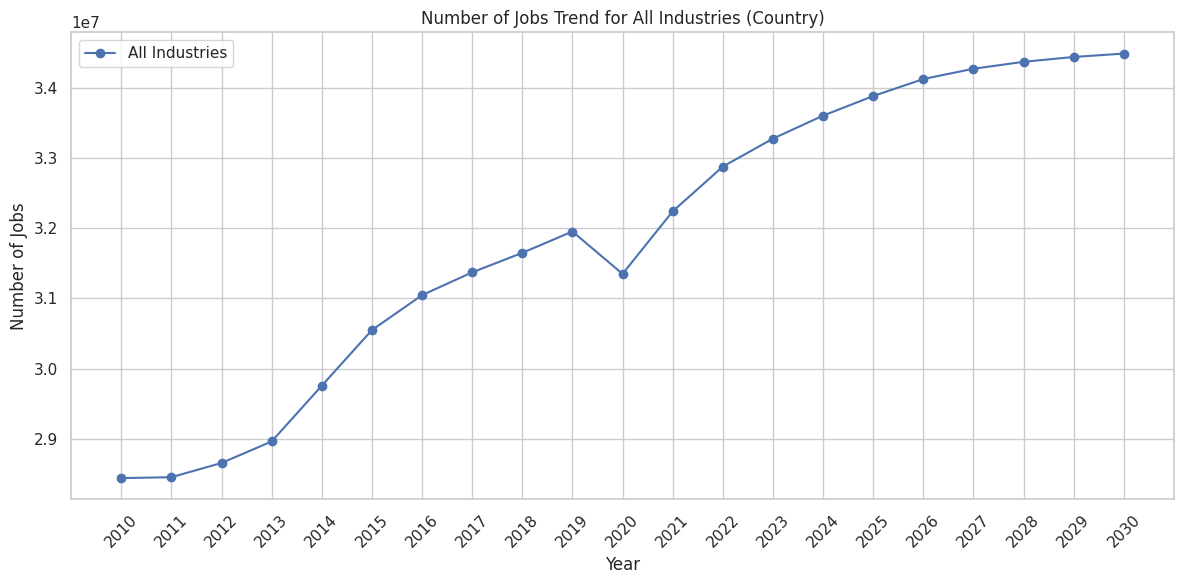

In [ ]:
# Select the row for 'All Industries'
all_industries_country_data = ind_jobs_country_df[ind_jobs_country_df['Industry name'] == 'All Industries']

# Extract year columns
year_columns = [col for col in ind_jobs_country_df.columns if col.isdigit()]

# Plotting
plt.figure(figsize=(12, 6))  # Adjusting figure size
plt.plot(year_columns, all_industries_country_data[year_columns].iloc[0], label='All Industries', marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs Trend for All Industries (Country)')

# Adding grid, legend, and layout adjustments
plt.xticks(rotation=45)  # Rotating x-ticks for better readability
plt.grid(True)           # Adding grid lines for better readability
plt.legend()
plt.tight_layout()       # Adjusting layout for neatness

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ind_jobs_local_area_df, ind_jobs_country_df,
# filtered_local_area_df, and filtered_country_df are already defined and contain the relevant data

# Extract the total jobs for all industries for both local area and country
all_industries_local_data = ind_jobs_local_area_df[ind_jobs_local_area_df['Industry name'] == 'All Industries']
all_industries_country_data = ind_jobs_country_df[ind_jobs_country_df['Industry name'] == 'All Industries']

# Extract year columns
year_columns = [col for col in ind_jobs_local_area_df.columns if col.isdigit()]

# Extracting tourism data from the previously filtered DataFrames (filtered_local_area_df and filtered_country_df)
tourism_jobs_local_area = aggregate_tourism_jobs(filtered_local_area_df)
tourism_jobs_country = aggregate_tourism_jobs(filtered_country_df)

# Plotting for Local Area
plt.figure(figsize=(12, 6))
plt.plot(year_columns, all_industries_local_data[year_columns].iloc[0], label='Total Jobs - Local Area', marker='o', linestyle='-', color='blue')
plt.plot(year_columns, tourism_jobs_local_area, label='Tourism Jobs - Local Area', marker='x', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Local Area: Total Jobs vs Tourism Jobs (2010 - 2030)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for Country
plt.figure(figsize=(12, 6))
plt.plot(year_columns, all_industries_country_data[year_columns].iloc[0], label='Total Jobs - Country', marker='o', linestyle='-', color='red')
plt.plot(year_columns, tourism_jobs_country, label='Tourism Jobs - Country', marker='x', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Country: Total Jobs vs Tourism Jobs (2010 - 2030)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Growth Rate

In [ ]:
def calculate_annual_growth_rate(df):
    # Extract columns for the years 2010 and 2030
    initial_year = '2010'
    final_year = '2030'

    # Sum up the jobs for the initial and final years
    initial_jobs = df[initial_year].sum()
    final_jobs = df[final_year].sum()

    # Calculate the number of years
    number_of_years = int(final_year) - int(initial_year)

    # Use the compound annual growth rate formula
    growth_rate = ((final_jobs / initial_jobs) ** (1 / number_of_years) - 1) * 100

    return growth_rate

# Calculate the growth rate for local area
local_area_growth_rate = calculate_annual_growth_rate(ind_jobs_local_area_df)

print(f"Local Area Jobs Annual Growth Rate (2010 - 2030): {local_area_growth_rate:.2f}%")


Local Area Jobs Annual Growth Rate (2010 - 2030): 0.97%


In [ ]:
def calculate_annual_growth_rate_country(df):
    # Extract columns for the years 2010 and 2030
    initial_year = '2010'
    final_year = '2030'

    # Sum up the jobs for the initial and final years
    initial_jobs = df[initial_year].sum()
    final_jobs = df[final_year].sum()

    # Calculate the number of years
    number_of_years = int(final_year) - int(initial_year)

    # Use the compound annual growth rate formula
    growth_rate = ((final_jobs / initial_jobs) ** (1 / number_of_years) - 1) * 100

    return growth_rate

# Calculate the growth rate for the country
country_growth_rate = calculate_annual_growth_rate_country(ind_jobs_country_df)

print(f"Country Jobs Annual Growth Rate (2010 - 2030): {country_growth_rate:.2f}%")


Country Jobs Annual Growth Rate (2010 - 2030): 0.97%


Local Area Jobs Annual Growth Rate (2010 - 2030): 0.97%: This indicates that, on average, the number of jobs in the local area increased by 0.97% each year over the 20-year period from 2010 to 2030. This is a relatively modest growth rate, suggesting a steady but slow increase in employment opportunities in the local area.

Country Jobs Annual Growth Rate (2010 - 2030): 0.97%: Surprisingly, this is the same growth rate as for the local area, which is quite unusual. Typically, local and national job markets have different growth rates due to varying economic, social, and industrial factors. The identical rate could suggest that the local area's job market trends are closely aligned with or representative of the national trend, or it might be coincidental.

### Annual growth rates per nr. of jobs in the T&S sector in the local area


In [ ]:
import pandas as pd

def calculate_annual_growth_rates(df):
    # List of years in the DataFrame
    years = [str(year) for year in range(2010, 2031)]

    # Dictionary to hold the growth rates for each year
    growth_rates = {}

    for i in range(len(years) - 1):
        previous_year = years[i]
        current_year = years[i + 1]

        # Sum up the jobs for the previous and current years
        previous_year_jobs = df[previous_year].sum()
        current_year_jobs = df[current_year].sum()

        # Calculate the growth rate
        growth_rate = ((current_year_jobs - previous_year_jobs) / previous_year_jobs) * 100

        # Store the growth rate in the dictionary
        growth_rates[f"{previous_year}-{current_year}"] = growth_rate

    return growth_rates

# Annual growth rates per nr. of jobs in the T&S sector in the local area
annual_growth_rates = calculate_annual_growth_rates(ind_jobs_local_area_df)
for period, rate in annual_growth_rates.items():
    print(f"Annual Growth Rate for {period}: {rate:.2f}%")


Annual Growth Rate for 2010-2011: 9.90%
Annual Growth Rate for 2011-2012: -9.55%
Annual Growth Rate for 2012-2013: -0.81%
Annual Growth Rate for 2013-2014: 0.71%
Annual Growth Rate for 2014-2015: 1.62%
Annual Growth Rate for 2015-2016: 1.28%
Annual Growth Rate for 2016-2017: 1.80%
Annual Growth Rate for 2017-2018: 1.17%
Annual Growth Rate for 2018-2019: 0.93%
Annual Growth Rate for 2019-2020: -0.29%
Annual Growth Rate for 2020-2021: 3.37%
Annual Growth Rate for 2021-2022: 0.72%
Annual Growth Rate for 2022-2023: 3.46%
Annual Growth Rate for 2023-2024: 1.84%
Annual Growth Rate for 2024-2025: 1.28%
Annual Growth Rate for 2025-2026: 1.06%
Annual Growth Rate for 2026-2027: 0.79%
Annual Growth Rate for 2027-2028: 0.62%
Annual Growth Rate for 2028-2029: 0.39%
Annual Growth Rate for 2029-2030: 0.26%


### Annual growth rates per nr. of jobs in the T&S sector in the country


In [ ]:
import pandas as pd

def calculate_annual_growth_rates(df):
    # List of years in the DataFrame
    years = [str(year) for year in range(2010, 2031)]

    # Dictionary to hold the growth rates for each year
    growth_rates = {}

    for i in range(len(years) - 1):
        previous_year = years[i]
        current_year = years[i + 1]

        # Sum up the jobs for the previous and current years
        previous_year_jobs = df[previous_year].sum()
        current_year_jobs = df[current_year].sum()

        # Calculate the growth rate
        growth_rate = ((current_year_jobs - previous_year_jobs) / previous_year_jobs) * 100

        # Store the growth rate in the dictionary
        growth_rates[f"{previous_year}-{current_year}"] = growth_rate

    return growth_rates

# Example usage
annual_growth_rates = calculate_annual_growth_rates(ind_jobs_country_df)
for period, rate in annual_growth_rates.items():
    print(f"Annual Growth Rate for {period}: {rate:.2f}%")


Annual Growth Rate for 2010-2011: 10.66%
Annual Growth Rate for 2011-2012: -9.29%
Annual Growth Rate for 2012-2013: 0.56%
Annual Growth Rate for 2013-2014: 1.74%
Annual Growth Rate for 2014-2015: 1.88%
Annual Growth Rate for 2015-2016: 2.17%
Annual Growth Rate for 2016-2017: 1.84%
Annual Growth Rate for 2017-2018: 1.25%
Annual Growth Rate for 2018-2019: 1.00%
Annual Growth Rate for 2019-2020: -0.51%
Annual Growth Rate for 2020-2021: 1.90%
Annual Growth Rate for 2021-2022: 0.05%
Annual Growth Rate for 2022-2023: 2.01%
Annual Growth Rate for 2023-2024: 1.47%
Annual Growth Rate for 2024-2025: 1.02%
Annual Growth Rate for 2025-2026: 0.85%
Annual Growth Rate for 2026-2027: 0.63%
Annual Growth Rate for 2027-2028: 0.50%
Annual Growth Rate for 2028-2029: 0.31%
Annual Growth Rate for 2029-2030: 0.31%


In [ ]:
import pandas as pd
import statistics

def calculate_annual_growth_rates(df):
    # List of years in the DataFrame
    years = [str(year) for year in range(2010, 2031)]

    # List to hold the growth rates for each year
    growth_rates = []

    for i in range(len(years) - 1):
        previous_year = years[i]
        current_year = years[i + 1]

        # Sum up the jobs for the previous and current years
        previous_year_jobs = df[previous_year].sum()
        current_year_jobs = df[current_year].sum()

        # Calculate the growth rate
        growth_rate = ((current_year_jobs - previous_year_jobs) / previous_year_jobs) * 100

        # Append the growth rate to the list
        growth_rates.append(growth_rate)

    return growth_rates

# Calculate growth rates for local area and country
local_area_growth_rates = calculate_annual_growth_rates(ind_jobs_local_area_df)
country_growth_rates = calculate_annual_growth_rates(ind_jobs_country_df)

# Calculate median and average growth rates
local_area_median = statistics.median(local_area_growth_rates)
local_area_average = statistics.mean(local_area_growth_rates)
country_median = statistics.median(country_growth_rates)
country_average = statistics.mean(country_growth_rates)

print(f"Local Area Median Growth Rate: {local_area_median:.2f}%")
print(f"Local Area Average Growth Rate: {local_area_average:.2f}%")
print(f"Country Median Growth Rate: {country_median:.2f}%")
print(f"Country Average Growth Rate: {country_average:.2f}%")


Local Area Median Growth Rate: 1.00%
Local Area Average Growth Rate: 1.03%
Country Median Growth Rate: 1.01%
Country Average Growth Rate: 1.02%


Plotting of the annual plot

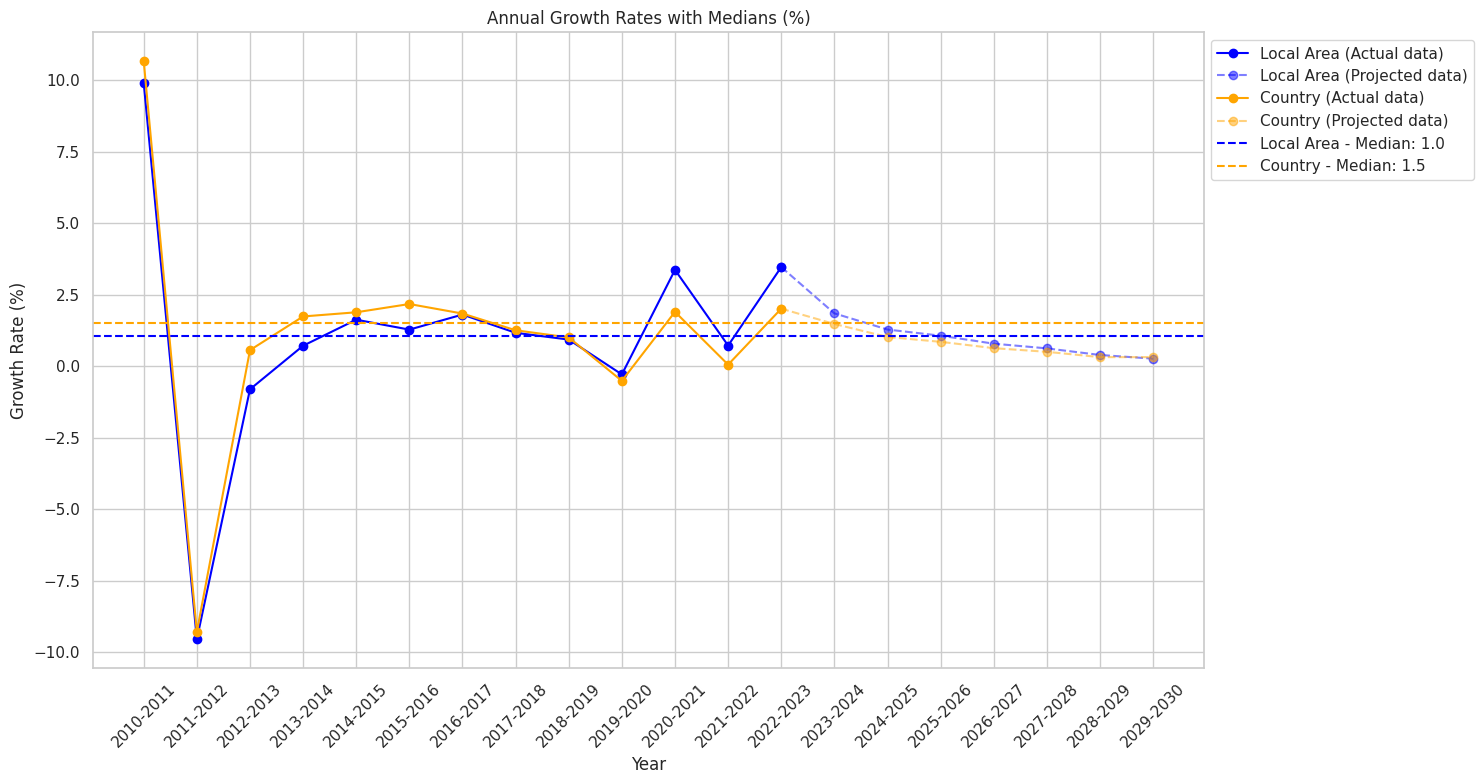

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics

# Assuming 'local_area_growth_rates' and 'country_growth_rates' are lists of growth rates
years = [f"{year}-{year+1}" for year in range(2010, 2030)]

# Split the data into actual and projected based on the year
split_year_index = years.index("2022-2023")

# Creating a DataFrame for plotting
growth_rates = {
    "Year": years,
    "Local Area Growth": local_area_growth_rates,
    "Country Growth": country_growth_rates
}
growth_rates_df = pd.DataFrame(growth_rates)

# Calculate median growth rates for the actual data and round them
local_area_median = statistics.median(local_area_growth_rates[:split_year_index])
country_median = statistics.median(country_growth_rates[:split_year_index])
local_area_median_rounded = round(local_area_median, 1)
country_median_rounded = round(country_median, 1)

# Set the colors for the actual and projected lines
local_color = "blue"
country_color = "orange"

# Plotting
plt.figure(figsize=(15, 8))

# Plot the actual and projected growth rates with different line styles
# Solid line for actual data, dashed line for projected data
for i, (label, color) in enumerate([('Local Area', local_color), ('Country', country_color)]):
    # Actual growth rates
    actual_data = growth_rates_df.iloc[:split_year_index+1][f'{label} Growth']
    plt.plot(years[:split_year_index+1], actual_data, marker='o', color=color, label=f'{label} (Actual data)')

    # Projected growth rates
    projected_data = growth_rates_df.iloc[split_year_index:][f'{label} Growth']
    plt.plot(years[split_year_index:], projected_data, marker='o', color=color, label=f'{label} (Projected data)', linestyle='--', alpha=0.5)

# Adding horizontal lines for medians with rounded values in the legend
plt.axhline(local_area_median, color=local_color, linestyle='--', label=f'Local Area - Median: {local_area_median_rounded}')
plt.axhline(country_median, color=country_color, linestyle='--', label=f'Country - Median: {country_median_rounded}')

# Enhancing the Plot
plt.xticks(rotation=45)
plt.ylabel('Growth Rate (%)')
plt.xlabel('Year')
plt.title('Annual Growth Rates with Medians (%)')

# Place the legend outside of the plot area in the top right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics

# Assuming 'local_area_growth_rates' and 'country_growth_rates' are lists of growth rates
years = [f"{year}-{year+1}" for year in range(2010, 2030)]

# Split the data into actual and projected based on the year (2023 is the first projected year)
split_year_index = years.index("2022-2023")

# Creating a DataFrame for plotting
growth_rates = {
    "Year": years,
    "Local Area Growth": local_area_growth_rates,
    "Country Growth": country_growth_rates
}
growth_rates_df = pd.DataFrame(growth_rates)

# Calculate median growth rates for the actual data and round them
local_area_median = statistics.median(local_area_growth_rates[:split_year_index])
country_median = statistics.median(country_growth_rates[:split_year_index])
local_area_median_rounded = round(local_area_median, 1)
country_median_rounded = round(country_median, 1)

# Set the colors for the actual and projected lines
local_color = "blue"
country_color = "orange"

# Plotting
plt.figure(figsize=(15, 8))

# Plot the actual and projected growth rates with different line styles
# Solid line for actual data, dashed line for projected data
for i, (label, color) in enumerate([('Local Area', local_color), ('Country', country_color)]):
    # Actual growth rates
    actual_data = growth_rates_df.iloc[:split_year_index+1][f'{label} Growth']
    plt.plot(years[:split_year_index+1], actual_data, marker='o', color=color, label=f'{label} (Actual data)')

    # Projected growth rates
    projected_data = growth_rates_df.iloc[split_year_index:][f'{label} Growth']
    plt.plot(years[split_year_index:], projected_data, marker='o', color=color, label=f'{label} (Projected data)', linestyle='--', alpha=0.5)

# Adding horizontal lines for medians with rounded values in the legend
plt.axhline(local_area_median, color=local_color, linestyle='--', label=f'Local Area - Median: {local_area_median_rounded}')
plt.axhline(country_median, color=country_color, linestyle='--', label=f'Country - Median: {country_median_rounded}')

# Enhancing the Plot
plt.xticks(rotation=45)
plt.ylabel('Growth Rate (%)')
plt.xlabel('Year')
plt.title('Annual Growth Rates of Number of Jobs in the T&L Sector (%): Local Area versus Country (2010 - 2030)')

# Place the legend outside of the plot area in the top right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


# Plot the Job concentration etc.

In [ ]:
import pandas as pd

# Define the file path
file_path = '/content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'

# Load the Excel file without loading any sheets into DataFrames
xls = pd.ExcelFile(file_path)

# Get the list of sheet names
sheet_names = xls.sheet_names
print(sheet_names)


['Jobs by industry >', 'IND jobs local area', 'IND Jobs country', 'Jobs by occupation >', 'OCC jobs local area', 'OCC jobs country', 'Job postings > ', 'JP by occupation local area', 'Skills library', 'Top skills by occ local area', 'Skills_ Categorization', 'Jobs _ Skills_ OCC _ local area']


In [ ]:
import pandas as pd

# Load the data for 'OCC jobs local area' and 'OCC jobs country'
occ_jobs_local_area_df = pd.read_excel(file_path, sheet_name='OCC jobs local area')
occ_jobs_country_df = pd.read_excel(file_path, sheet_name='OCC jobs country')

# Basic data analysis
print("Local Area - Basic Information:")
print(occ_jobs_local_area_df.info())
print("\nLocal Area - Descriptive Statistics:")
print(occ_jobs_local_area_df.describe())

print("\nCountry - Basic Information:")
print(occ_jobs_country_df.info())
print("\nCountry - Descriptive Statistics:")
print(occ_jobs_country_df.describe())


Local Area - Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SOC                            412 non-null    int64  
 1   Occupation name                412 non-null    object 
 2   2022 Jobs                      412 non-null    float64
 3   2022 Employment Concentration  412 non-null    float64
 4   Median Wages                   412 non-null    float64
 5   Education Level                412 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 19.4+ KB
None

Local Area - Descriptive Statistics:
               SOC     2022 Jobs  2022 Employment Concentration  Median Wages
count   412.000000    412.000000                     412.000000    412.000000
mean   4520.507282    610.799443                       1.012908  27913.475651
std    2495.529105   1101.334759            

<ipython-input-48-56999c816dc7>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # To ensure the labels don't get cut off


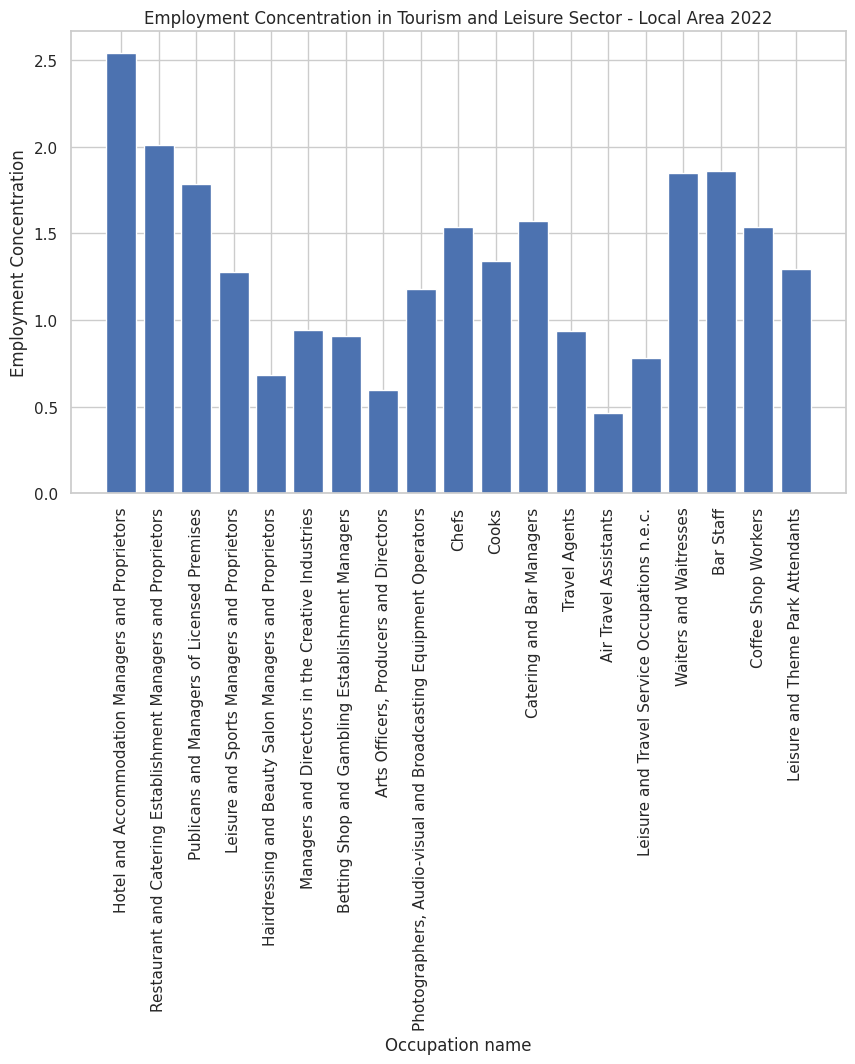

In [ ]:
# Define the SOC codes for the tourism and leisure sector
# Replace the list below with the actual SOC codes relevant to the tourism and leisure sector
tourism_leisure_soc_codes = [1221, 1222, 1223, 1224, 1255, 1256, 1253, 3416, 3417, 6212, 6213, 6219, 5436, 5434, 5435, 9264, 9265, 9266, 9267]

# Filter the DataFrame for tourism and leisure sector occupations
tourism_leisure_jobs_local_area = occ_jobs_local_area_df[occ_jobs_local_area_df['SOC'].isin(tourism_leisure_soc_codes)]

# Plotting employment concentration for tourism and leisure sector in the local area
plt.figure(figsize=(10, 6))
plt.bar(tourism_leisure_jobs_local_area['Occupation name'], tourism_leisure_jobs_local_area['2022 Employment Concentration'])
plt.xlabel('Occupation name')
plt.xticks(rotation=90)  # Rotating the x labels to make them readable
plt.ylabel('Employment Concentration')
plt.title('Employment Concentration in Tourism and Leisure Sector - Local Area 2022')
plt.tight_layout()  # To ensure the labels don't get cut off
plt.show()


In [ ]:
import pandas as pd

# Define the file path
file_path = '/content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'

# Load the specific sheets into DataFrames
occ_jobs_local_area_df = pd.read_excel(file_path, sheet_name='OCC jobs local area')
occ_jobs_country_df = pd.read_excel(file_path, sheet_name='OCC jobs country')

# Display the first few rows
print("OCC Jobs Local Area - First 5 rows:")
print(occ_jobs_local_area_df.head())
print("\nOCC Jobs Country - First 5 rows:")
print(occ_jobs_country_df.head())

# Check for missing values
print("\nMissing values - OCC Jobs Local Area:")
print(occ_jobs_local_area_df.isnull().sum())
print("\nMissing values - OCC Jobs Country:")
print(occ_jobs_country_df.isnull().sum())

# Get summary statistics
print("\nSummary statistics - OCC Jobs Local Area:")
print(occ_jobs_local_area_df.describe())
print("\nSummary statistics - OCC Jobs Country:")
print(occ_jobs_country_df.describe())

# Number of unique values
print("\nUnique values - OCC Jobs Local Area:")
print(occ_jobs_local_area_df.nunique())
print("\nUnique values - OCC Jobs Country:")
print(occ_jobs_country_df.nunique())


OCC Jobs Local Area - First 5 rows:
    SOC                                    Occupation name    2022 Jobs  \
0  1111              Chief Executives and Senior Officials   533.232896   
1  1112               Elected Officers and Representatives    75.085654   
2  1121  Production Managers and Directors in Manufactu...  1957.637497   
3  1122  Production Managers and Directors in Construction  1188.194270   
4  1123  Production Managers and Directors in Mining an...    79.516565   

   2022 Employment Concentration  Median Wages             Education Level  
0                       0.685434  45953.764567  Honours, Bachelor's degree  
1                       0.832039  58119.661498  Honours, Bachelor's degree  
2                       0.961311  36000.000000  Honours, Bachelor's degree  
3                       1.046891  44189.000000       Level 3 NVQ; A Levels  
4                       0.926922  35417.367327  Honours, Bachelor's degree  

OCC Jobs Country - First 5 rows:
    SOC          

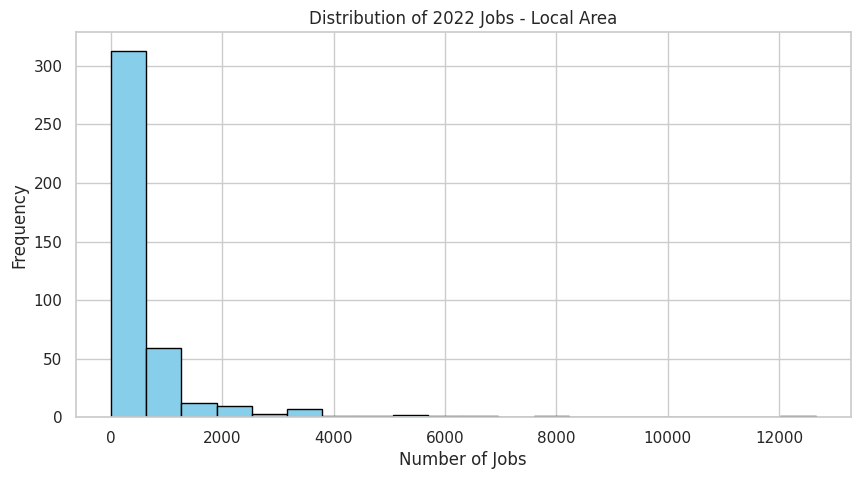

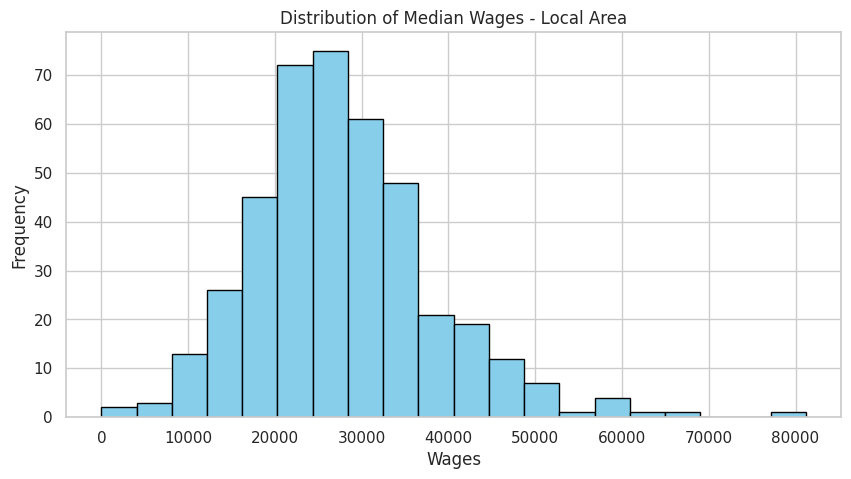

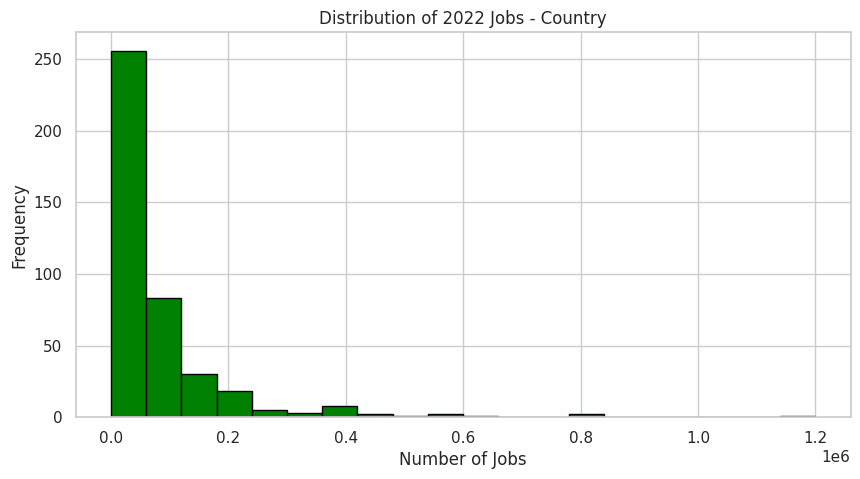

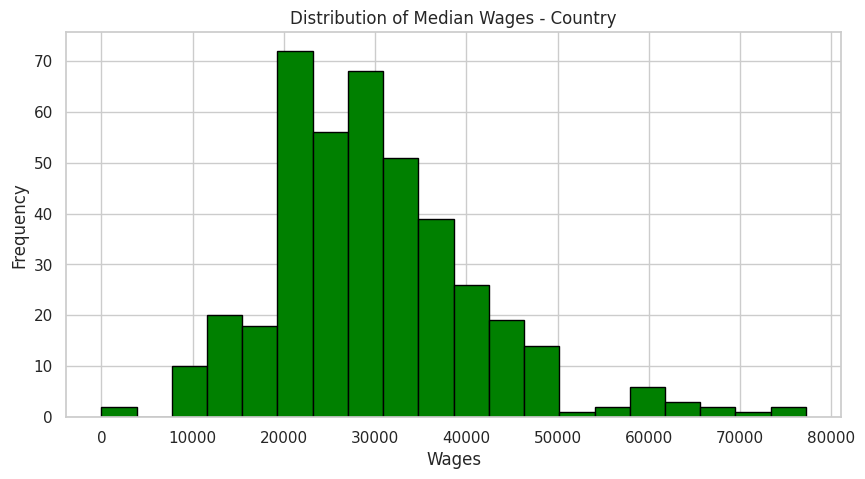

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of 2022 Jobs for Local Area
plt.figure(figsize=(10, 5))
plt.hist(occ_jobs_local_area_df['2022 Jobs'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of 2022 Jobs - Local Area')
plt.xlabel('Number of Jobs')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of Median Wages for Local Area
plt.figure(figsize=(10, 5))
plt.hist(occ_jobs_local_area_df['Median Wages'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Median Wages - Local Area')
plt.xlabel('Wages')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of 2022 Jobs for Country
plt.figure(figsize=(10, 5))
plt.hist(occ_jobs_country_df['2022 Jobs'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of 2022 Jobs - Country')
plt.xlabel('Number of Jobs')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of Median Wages for Country
plt.figure(figsize=(10, 5))
plt.hist(occ_jobs_country_df['Median Wages'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Median Wages - Country')
plt.xlabel('Wages')
plt.ylabel('Frequency')
plt.show()


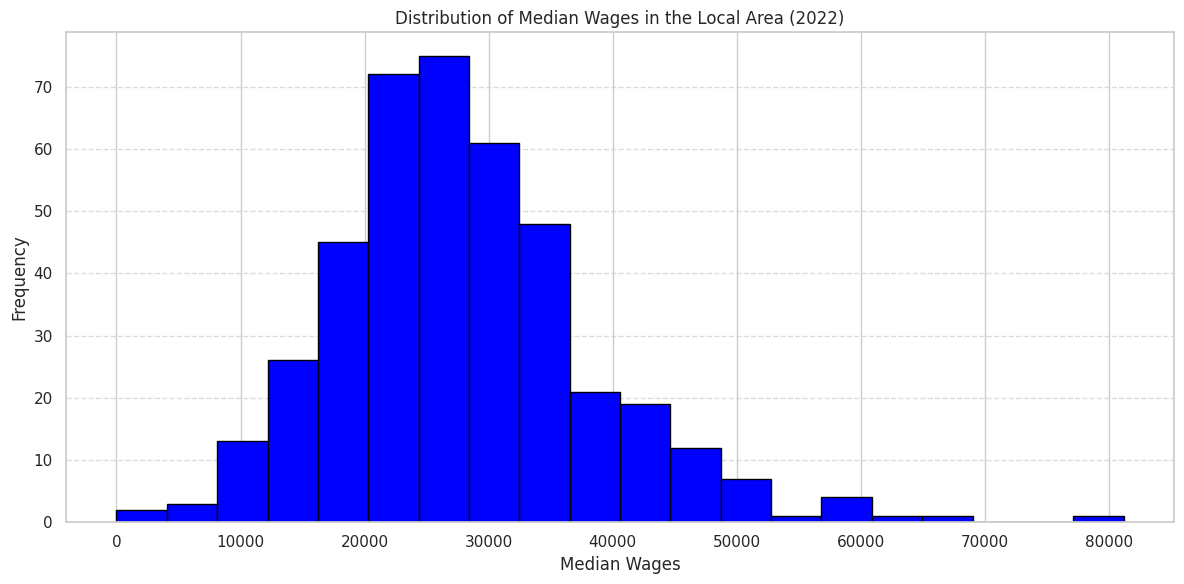

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of Median Wages for Local Area
plt.figure(figsize=(12, 6))
plt.hist(occ_jobs_local_area_df['Median Wages'], bins=20, color='blue', edgecolor='black')

# Enhancing the plot with labels and titles
plt.title('Distribution of Median Wages in the Local Area (2022)')
plt.xlabel('Median Wages')
plt.ylabel('Frequency')

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout for better presentation
plt.tight_layout()

# Show plot
plt.show()


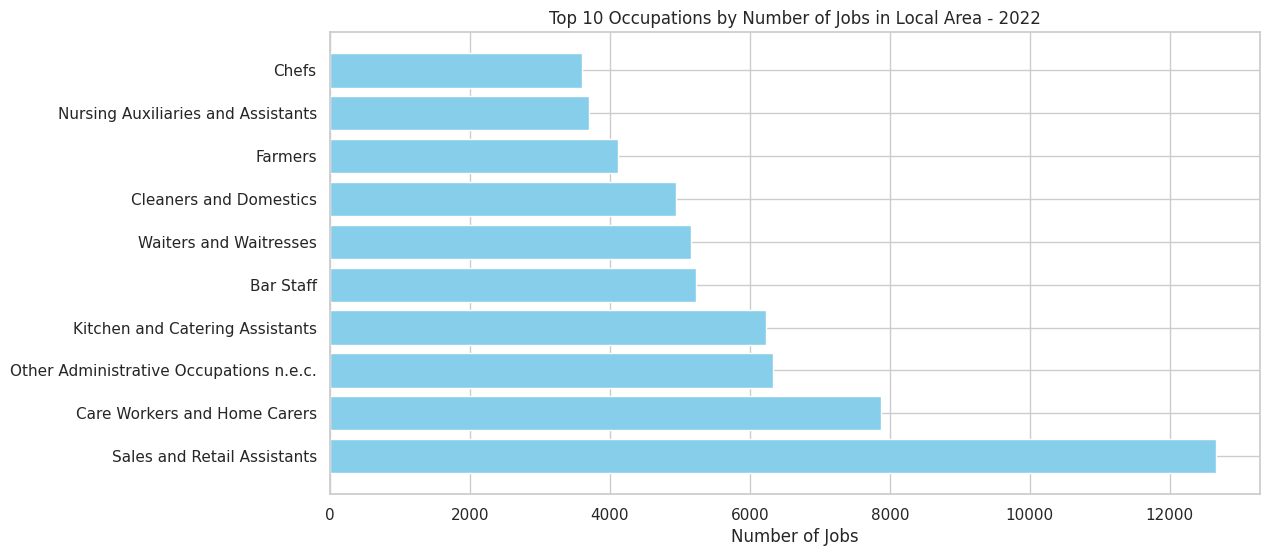

In [ ]:
import matplotlib.pyplot as plt

# Get top 10 occupations by number of jobs in the local area and country for 2022
top_occupations_local_area = occ_jobs_local_area_df.nlargest(10, '2022 Jobs')
top_occupations_country = occ_jobs_country_df.nlargest(10, '2022 Jobs')

# Bar chart for Local Area
plt.figure(figsize=(12, 6))
plt.barh(top_occupations_local_area['Occupation name'], top_occupations_local_area['2022 Jobs'], color='skyblue')
plt.xlabel('Number of Jobs')
plt.title('Top 10 Occupations by Number of Jobs in Local Area - 2022')
plt.show()

# Bar chart for Country
plt.figure(figsize=(12, 6))
plt.barh(top_occupations_country['Occupation name'], top_occupations_country['2022 Jobs'], color='green')
plt.xlabel('Number of Jobs')
plt.title('Top 10 Occupations by Number of Jobs in Country - 2022')
plt.show()


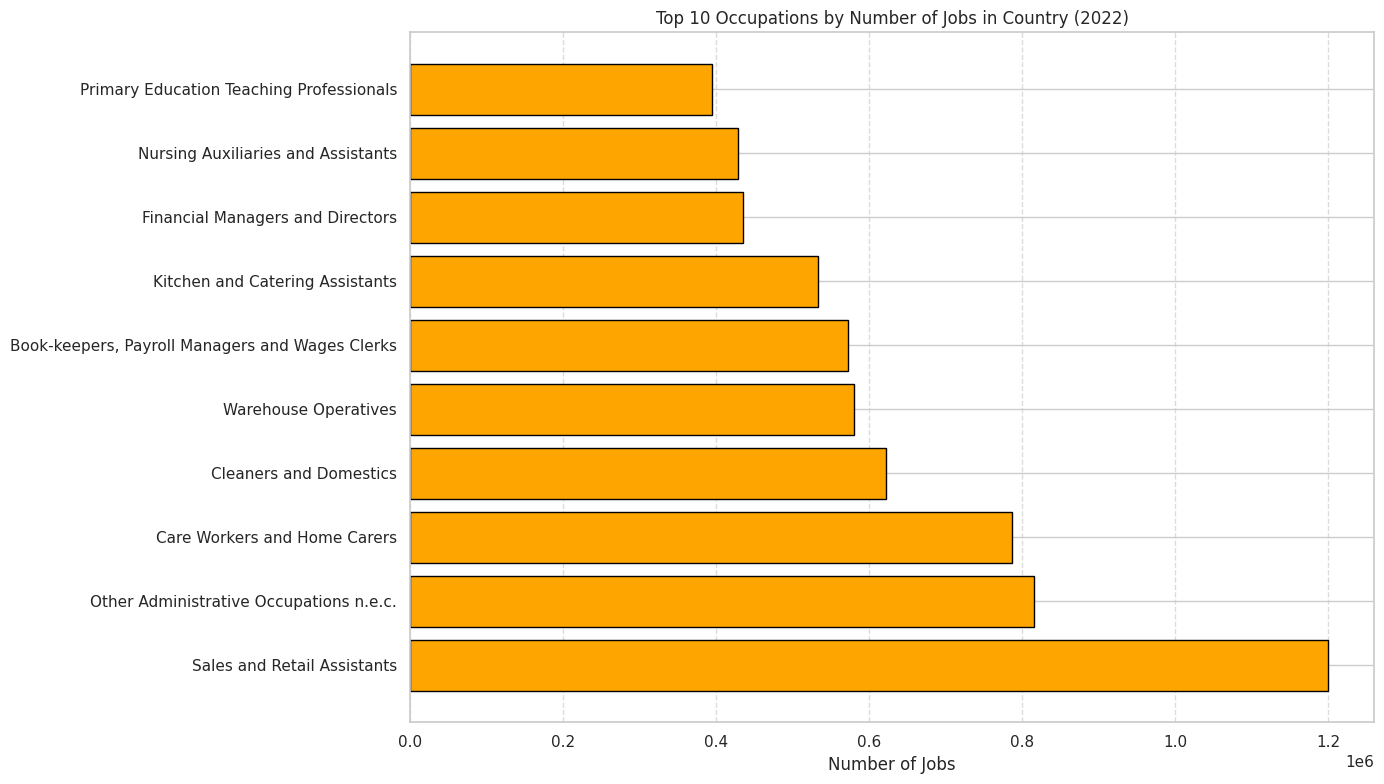

In [ ]:
import matplotlib.pyplot as plt

# Get top 10 occupations by number of jobs in the local area and country for 2022
top_occupations_local_area = occ_jobs_local_area_df.nlargest(10, '2022 Jobs')
top_occupations_country = occ_jobs_country_df.nlargest(10, '2022 Jobs')

# Enhance readability with larger font sizes and consistent style
plt.rcParams.update({'font.size': 12})

# Bar chart for Local Area
plt.figure(figsize=(14, 8))
plt.barh(top_occupations_local_area['Occupation name'], top_occupations_local_area['2022 Jobs'], color='blue', edgecolor='black')
plt.xlabel('Number of Jobs')
plt.title('Top 10 Occupations by Number of Jobs in Local Area (2022)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Bar chart for Country
plt.figure(figsize=(14, 8))
plt.barh(top_occupations_country['Occupation name'], top_occupations_country['2022 Jobs'], color='orange', edgecolor='black')
plt.xlabel('Number of Jobs')
plt.title('Top 10 Occupations by Number of Jobs in Country (2022)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


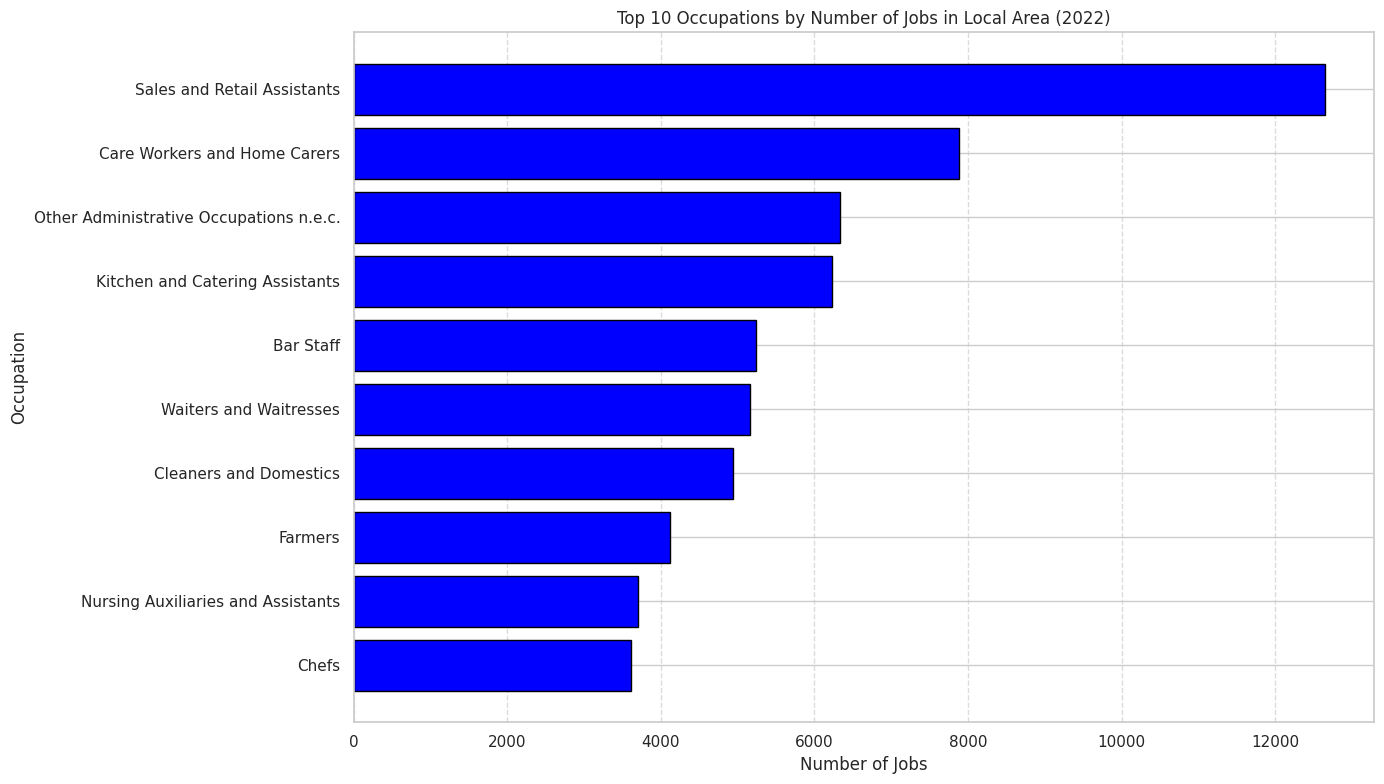

In [ ]:
import matplotlib.pyplot as plt

# Get top 10 occupations by number of jobs in the local area for 2022
top_occupations_local_area = occ_jobs_local_area_df.nlargest(10, '2022 Jobs')

# Enhance readability with larger font sizes and consistent style
plt.rcParams.update({'font.size': 12})

# Bar chart for Local Area
plt.figure(figsize=(14, 8))
plt.barh(top_occupations_local_area['Occupation name'], top_occupations_local_area['2022 Jobs'], color='blue', edgecolor='black')
plt.xlabel('Number of Jobs')
plt.title('Top 10 Occupations by Number of Jobs in Local Area (2022)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.ylabel('Occupation')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


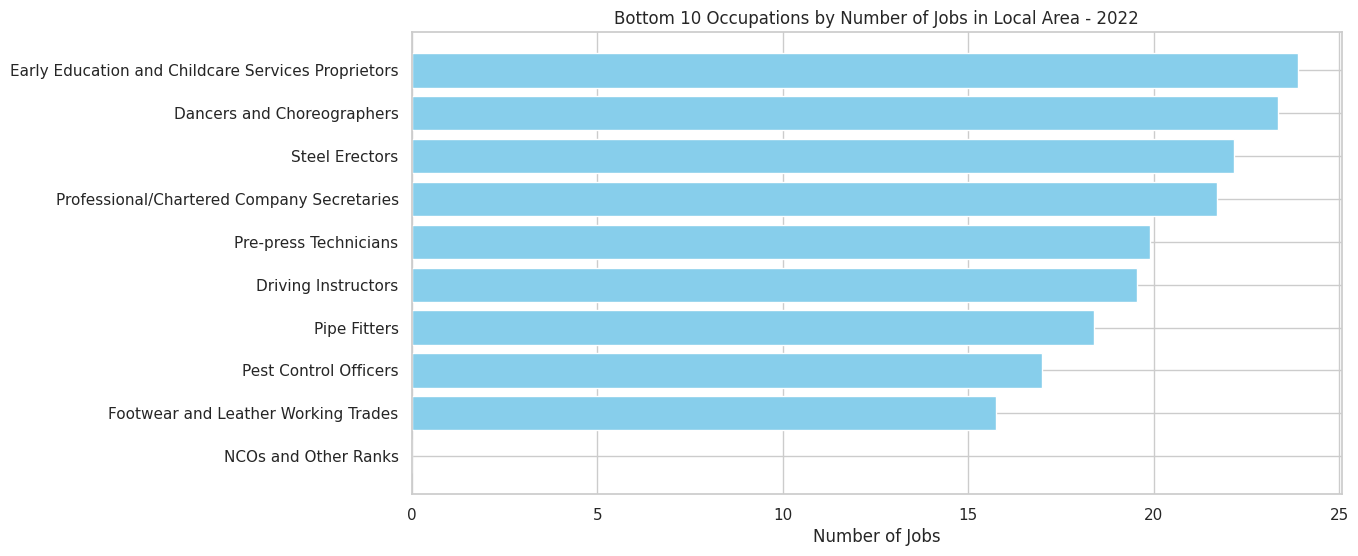

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have two DataFrames: occ_jobs_local_area_df and occ_jobs_country_df
# with a column '2022 Jobs' that contains the number of jobs.

# Get bottom 10 occupations by number of jobs in the local area and country for 2022
bottom_occupations_local_area = occ_jobs_local_area_df.nsmallest(10, '2022 Jobs')
bottom_occupations_country = occ_jobs_country_df.nsmallest(10, '2022 Jobs')

# Bar chart for Local Area (Bottom 10)
plt.figure(figsize=(12, 6))
plt.barh(bottom_occupations_local_area['Occupation name'], bottom_occupations_local_area['2022 Jobs'], color='skyblue')
plt.xlabel('Number of Jobs')
plt.title('Bottom 10 Occupations by Number of Jobs in Local Area - 2022')
plt.show()

# Bar chart for Country (Bottom 10)
plt.figure(figsize=(12, 6))
plt.barh(bottom_occupations_country['Occupation name'], bottom_occupations_country['2022 Jobs'], color='green')
plt.xlabel('Number of Jobs')
plt.title('Bottom 10 Occupations by Number of Jobs in Country - 2022')
plt.show()


### Numbers of job postings in the tourism and leisure sector

                                Occupation name   SOC  POSTING_COUNT
0  Other elementary services occupations n.e.c.  9269            235
1             Leisure and theme park attendants  9267             24
2                           Coffee shop workers  9266            105
3                                     Bar staff  9265            112
4                        Waiters and waitresses  9264            218
Total Postings: 2586
Average Postings per Occupation: 136.10526315789474
Median Postings: 25.0


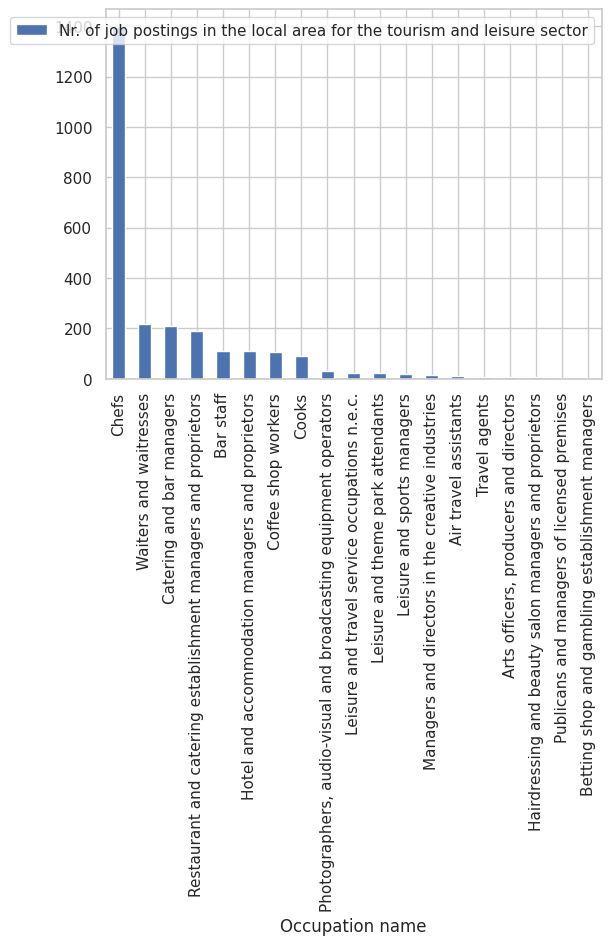

In [ ]:
# Numbers of job postings in the tourism and leisure sector

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'  # Replace with the path to your Excel file
sheet_name = 'JP by occupation local area'  # Sheet name
df_skills = pd.read_excel(file_path, sheet_name=sheet_name)

# Overview of the data
print(df_skills.head())  # Displays the first few rows for a quick look

# Filter for tourism and leisure sector occupations
tourism_leisure_soc_codes = [1221, 1222, 1223, 1224, 1255, 1256, 1253, 3416, 3417, 6212, 6213, 6219, 5436, 5434, 5435, 9264, 9265, 9266, 9267]  # Replace with actual SOC codes
df_tourism_leisure = df_skills[df_skills['SOC'].isin(tourism_leisure_soc_codes)]

# Analysis of job postings
total_postings = df_tourism_leisure['POSTING_COUNT'].sum()
average_postings = df_tourism_leisure['POSTING_COUNT'].mean()
median_postings = df_tourism_leisure['POSTING_COUNT'].median()

# Displaying the results
print(f"Total Postings: {total_postings}")
print(f"Average Postings per Occupation: {average_postings}")
print(f"Median Postings: {median_postings}")

# Rename the column for the plot
df_tourism_leisure = df_tourism_leisure.rename(columns={'POSTING_COUNT': 'Nr. of job postings in the local area for the tourism and leisure sector'})

# Sort the data for visualization
df_tourism_leisure_sorted = df_tourism_leisure.sort_values(by='Nr. of job postings in the local area for the tourism and leisure sector', ascending=False)

# Visualization: Ordered bar chart
df_tourism_leisure_sorted.plot(kind='bar', x='Occupation name', y='Nr. of job postings in the local area for the tourism and leisure sector')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'  # Replace with your file path
sheet_name = 'JP by occupation local area'  # Sheet name
df_skills = pd.read_excel(file_path, sheet_name=sheet_name)

# Overview of the data
print(df_skills.head())  # Quick look at the data

# Total job postings in the local area
total_all_postings = df_skills['POSTING_COUNT'].sum()

# Filter for tourism and leisure sector occupations
tourism_leisure_soc_codes = [1221, 1222, 1223, 1224, 1255, 1256, 1253, 3416, 3417, 6212, 6213, 6219, 5436, 5434, 5435, 9264, 9265, 9266, 9267]  # Replace with actual SOC codes
df_tourism_leisure = df_skills[df_skills['SOC'].isin(tourism_leisure_soc_codes)]

# Analysis of job postings in the tourism and leisure sector
total_tourism_postings = df_tourism_leisure['POSTING_COUNT'].sum()
average_tourism_postings = df_tourism_leisure['POSTING_COUNT'].mean()
median_tourism_postings = df_tourism_leisure['POSTING_COUNT'].median()

# Displaying the results
print(f"Total Postings in Tourism and Leisure: {total_tourism_postings}")
print(f"Average Postings per Occupation in Tourism and Leisure: {average_tourism_postings}")
print(f"Median Postings in Tourism and Leisure: {median_tourism_postings}")
print(f"Total Job Postings in Local Area: {total_all_postings}")

# Compare tourism and leisure sector with total job postings
percentage_tourism = (total_tourism_postings / total_all_postings) * 100
print(f"Percentage of Tourism and Leisure Postings: {percentage_tourism:.2f}%")

# Visualization
df_tourism_leisure = df_tourism_leisure.rename(columns={'POSTING_COUNT': 'Number of Job Postings in Tourism and Leisure'})

# Sort the data for visualization
df_tourism_leisure_sorted = df_tourism_leisure.sort_values(by='Number of Job Postings in Tourism and Leisure', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df_tourism_leisure_sorted.plot(kind='bar', x='Occupation name', y='Number of Job Postings in Tourism and Leisure', ax=ax)
plt.title('Job Postings in Tourism and Leisure Sector')
plt.show()


                                Occupation name   SOC  POSTING_COUNT
0  Other elementary services occupations n.e.c.  9269            235
1             Leisure and theme park attendants  9267             24
2                           Coffee shop workers  9266            105
3                                     Bar staff  9265            112
4                        Waiters and waitresses  9264            218
Total Postings in Tourism and Leisure: 2586
Average Postings per Occupation in Tourism and Leisure: 136.10526315789474
Median Postings in Tourism and Leisure: 25.0
Total Job Postings in Local Area: 37651
Percentage of Tourism and Leisure Postings: 6.87%


                                Occupation name   SOC  POSTING_COUNT
0  Other elementary services occupations n.e.c.  9269            235
1             Leisure and theme park attendants  9267             24
2                           Coffee shop workers  9266            105
3                                     Bar staff  9265            112
4                        Waiters and waitresses  9264            218
Total Postings in Tourism and Leisure: 2586
Average Postings per Occupation in Tourism and Leisure: 136.10526315789474
Median Postings in Tourism and Leisure: 25.0
Total Job Postings in Local Area: 37651
Percentage of Tourism and Leisure Postings: 6.87%


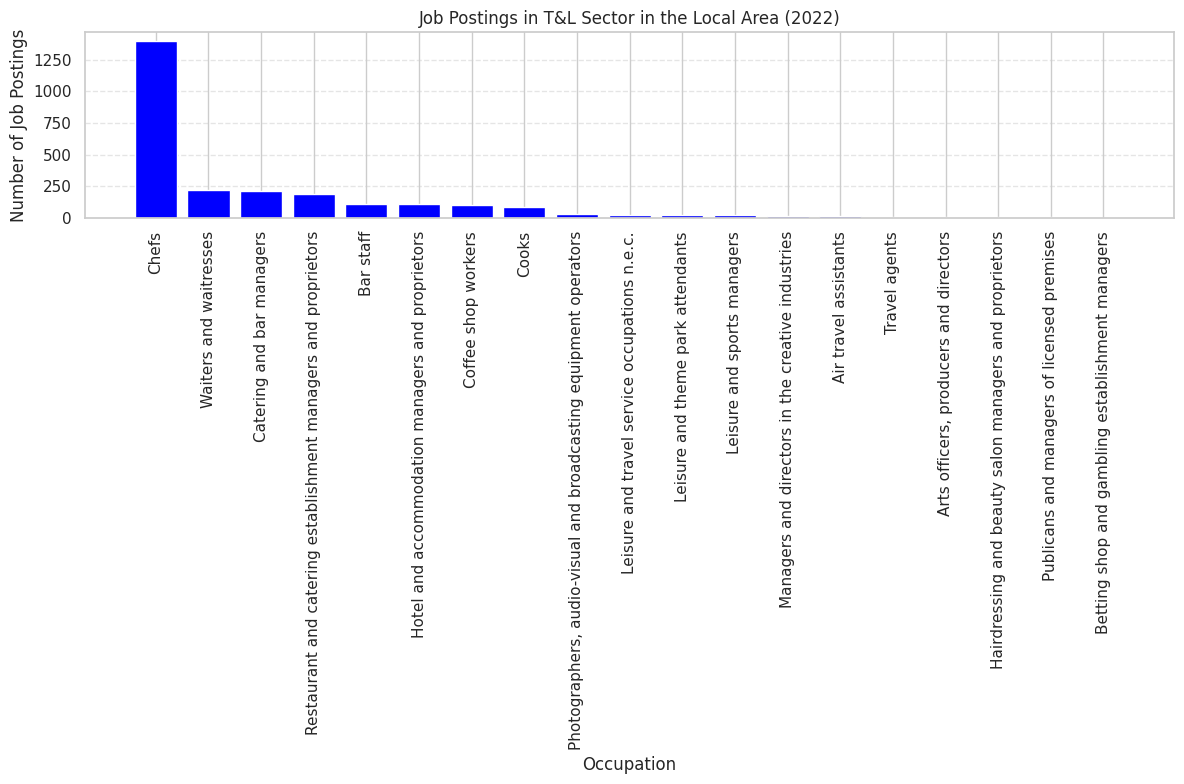

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'  # Replace with your file path
sheet_name = 'JP by occupation local area'  # Sheet name
df_skills = pd.read_excel(file_path, sheet_name=sheet_name)

# Overview of the data
print(df_skills.head())  # Quick look at the data

# Total job postings in the local area
total_all_postings = df_skills['POSTING_COUNT'].sum()

# Filter for tourism and leisure sector occupations
tourism_leisure_soc_codes = [1221, 1222, 1223, 1224, 1255, 1256, 1253, 3416, 3417, 6212, 6213, 6219, 5436, 5434, 5435, 9264, 9265, 9266, 9267]  # Replace with actual SOC codes
df_tourism_leisure = df_skills[df_skills['SOC'].isin(tourism_leisure_soc_codes)]

# Analysis of job postings in the tourism and leisure sector
total_tourism_postings = df_tourism_leisure['POSTING_COUNT'].sum()
average_tourism_postings = df_tourism_leisure['POSTING_COUNT'].mean()
median_tourism_postings = df_tourism_leisure['POSTING_COUNT'].median()

# Displaying the results
print(f"Total Postings in Tourism and Leisure: {total_tourism_postings}")
print(f"Average Postings per Occupation in Tourism and Leisure: {average_tourism_postings}")
print(f"Median Postings in Tourism and Leisure: {median_tourism_postings}")
print(f"Total Job Postings in Local Area: {total_all_postings}")

# Compare tourism and leisure sector with total job postings
percentage_tourism = (total_tourism_postings / total_all_postings) * 100
print(f"Percentage of Tourism and Leisure Postings: {percentage_tourism:.2f}%")

# Visualization
df_tourism_leisure = df_tourism_leisure.rename(columns={'POSTING_COUNT': 'Number of Job Postings in Tourism and Leisure'})

# Sort the data for visualization
df_tourism_leisure_sorted = df_tourism_leisure.sort_values(by='Number of Job Postings in Tourism and Leisure', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(df_tourism_leisure_sorted['Occupation name'], df_tourism_leisure_sorted['Number of Job Postings in Tourism and Leisure'], color='blue')
plt.xticks(rotation=90)
plt.ylabel('Number of Job Postings')
plt.xlabel('Occupation')
plt.title('Job Postings in T&L Sector in the Local Area (2022)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the data
file_path = '/content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'
sheet_name = 'JP by occupation local area'
df_skills = pd.read_excel(file_path, sheet_name=sheet_name)

# Sort the DataFrame by POSTING_COUNT in descending order and select the top 20 rows
top_20_job_postings = df_skills.sort_values(by='POSTING_COUNT', ascending=False).head(20)

# Display the top 10 job postings
print(top_20_job_postings)


                                       Occupation name   SOC  POSTING_COUNT
98                        Care workers and home carers  6135           3103
116                                              Chefs  5434           1397
295                       Other nursing professionals   2237           1150
69                 Customer service occupations n.e.c.  7219            911
20                              Cleaners and domestics  9223            880
76                    Sales related occupations n.e.c.  7129            836
5                      Kitchen and catering assistants  9263            773
109                                Teaching assistants  6112            745
85                         Sales and retail assistants  7111            714
162            Other administrative occupations n.e.c.  4159            584
299                                  Specialist nurses  2233            570
320  Programmers and software development professio...  2134            511
10          

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'
sheet_name = 'JP by occupation local area'
df_skills = pd.read_excel(file_path, sheet_name=sheet_name)

# Sort the DataFrame by POSTING_COUNT in descending order and select the top 20 rows
top_20_job_postings = df_skills.sort_values(by='POSTING_COUNT', ascending=False).head(20)

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(top_20_job_postings['Occupation name'], top_20_job_postings['POSTING_COUNT'])
plt.xlabel('POSTING_COUNT')
plt.ylabel('Occupation name')
plt.title('Top 20 Job Postings by POSTING_COUNT')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'
sheet_name = 'JP by occupation local area'
df_skills = pd.read_excel(file_path, sheet_name=sheet_name)

# Sort the DataFrame by POSTING_COUNT in descending order and select the top 10 rows
top_10_job_postings = df_skills.sort_values(by='POSTING_COUNT', ascending=False).head(10)

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = plt.barh(top_10_job_postings['Occupation name'], top_10_job_postings['POSTING_COUNT'], color='blue', edgecolor='black')
plt.xlabel('Number of Job Postings')
plt.ylabel('Occupation')
plt.title('Top 10 Job Postings by Occupation in Local Area (2022)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

# Display the plot
plt.show()


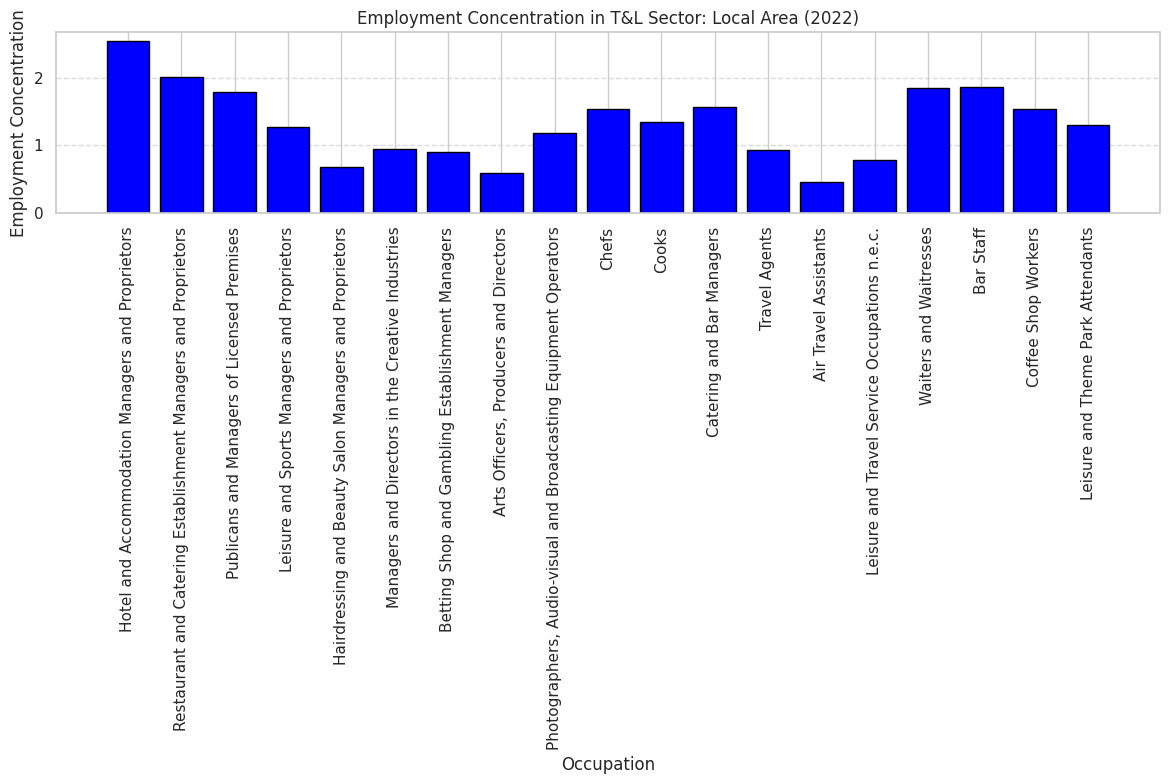

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'tourism_leisure_jobs_local_area' is your filtered DataFrame

# Define the SOC codes for the tourism and leisure sector
# Replace the list below with the actual SOC codes relevant to the tourism and leisure sector
tourism_leisure_soc_codes = [1221, 1222, 1223, 1224, 1255, 1256, 1253, 3416, 3417, 6212, 6213, 6219, 5436, 5434, 5435, 9264, 9265, 9266, 9267]

# Filter the DataFrame for tourism and leisure sector occupations
tourism_leisure_jobs_local_area = occ_jobs_local_area_df[occ_jobs_local_area_df['SOC'].isin(tourism_leisure_soc_codes)]

# Plotting employment concentration for tourism and leisure sector in the local area
plt.figure(figsize=(12, 8))
bars = plt.bar(tourism_leisure_jobs_local_area['Occupation name'], tourism_leisure_jobs_local_area['2022 Employment Concentration'], color='blue', edgecolor='black')
plt.xlabel('Occupation')
plt.xticks(rotation=90)  # Rotating the x labels to make them readable
plt.ylabel('Employment Concentration')
plt.title('Employment Concentration in T&L Sector: Local Area (2022)')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()  # To ensure the labels don't get cut off

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'tourism_leisure_jobs_local_area' is your filtered DataFrame

# Define the SOC codes for the tourism and leisure sector
tourism_leisure_soc_codes = [1221, 1222, 1223, 1224, 1255, 1256, 1253, 3416, 3417, 6212, 6213, 6219, 5436, 5434, 5435, 9264, 9265, 9266, 9267]

# Filter the DataFrame for tourism and leisure sector occupations
tourism_leisure_jobs_local_area = occ_jobs_local_area_df[occ_jobs_local_area_df['SOC'].isin(tourism_leisure_soc_codes)]

# Sort the DataFrame by '2022 Employment Concentration' in descending order
tourism_leisure_jobs_local_area_sorted = tourism_leisure_jobs_local_area.sort_values('2022 Employment Concentration', ascending=False)

# Plotting employment concentration for tourism and leisure sector in the local area
plt.figure(figsize=(12, 8))
bars = plt.bar(tourism_leisure_jobs_local_area_sorted['Occupation name'], tourism_leisure_jobs_local_area_sorted['2022 Employment Concentration'], color='blue', edgecolor='black')
plt.xlabel('Occupation')
plt.xticks(rotation=90)  # Rotating the x labels to make them readable
plt.ylabel('Employment Concentration')
plt.title('Employment Concentration in T&L Sector: Local Area (2022)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # To ensure the labels don't get cut off

# Show plot
plt.show()


# How strong is its outlook now in the local area? Some consideration using further data:

In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'

# Read the specific sheet into a DataFrame
df_job_skills_OCC_local_area = pd.read_excel(file_path, sheet_name='Jobs _ Skills_ OCC _ local area')

# Print the DataFrame
print(df_job_skills_OCC_local_area)

                                      Occupation name  2022 Jobs  \
0                                               Chefs    3607.06   
1                              Waiters and Waitresses    5161.74   
2    Betting Shop and Gambling Establishment Managers     120.30   
3                           Catering and Bar Managers    1046.24   
4   Restaurant and Catering Establishment Managers...    2232.79   
5                                           Bar Staff    5235.71   
6    Hotel and Accommodation Managers and Proprietors     728.18   
7                                 Coffee Shop Workers     745.00   
8                                               Cooks     843.34   
9   Photographers, Audio-visual and Broadcasting E...     371.67   
10      Leisure and Travel Service Occupations n.e.c.     118.69   
11                  Leisure and Theme Park Attendants     538.82   
12        Leisure and Sports Managers and Proprietors     572.45   
13  Managers and Directors in the Creative Indus

In [ ]:
descriptive_stats = df_job_skills_OCC_local_area.describe()

# Print Descriptive Statistics
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
          2022 Jobs  Employment Concentration
count    20.000000                 20.000000
mean   1178.758000                  1.301000
std    1608.311262                  0.538818
min      46.030000                  0.460000
25%     216.035000                  0.910000
50%     555.635000                  1.290000
75%     935.600000                  1.625000
max    5235.710000                  2.540000


In [ ]:
# Convert 'Median Wages' to a numerical format if necessary
# Remove currency symbols and commas, then convert to float
df_job_skills_OCC_local_area['Median Wages'] = df_job_skills_OCC_local_area['Median Wages'].replace('[£,]', '', regex=True).astype(float)

# Perform Correlation Analysis
correlation_matrix = df_job_skills_OCC_local_area[['2022 Jobs', 'Employment Concentration', 'Median Wages']].corr()

# Print the Correlation Matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                           2022 Jobs  Employment Concentration  Median Wages
2022 Jobs                  1.000000                  0.555519     -0.439809
Employment Concentration   0.555519                  1.000000     -0.093306
Median Wages              -0.439809                 -0.093306      1.000000


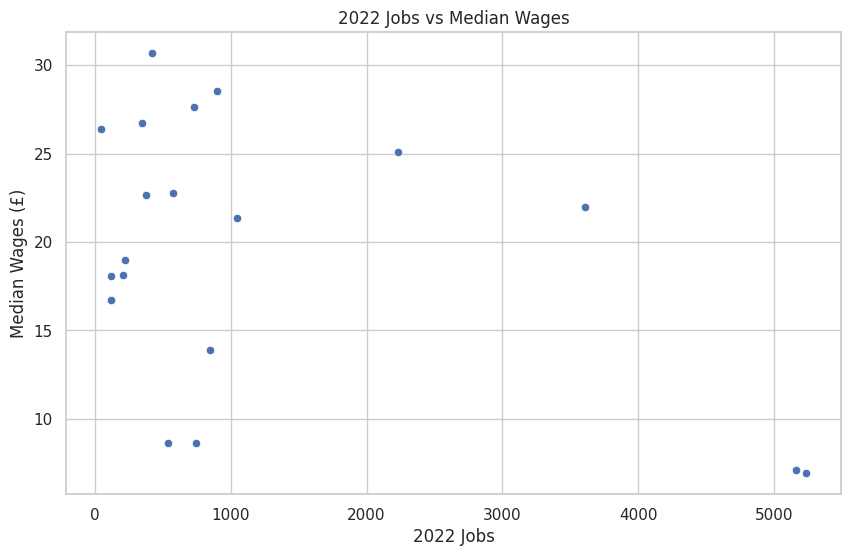

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'Median Wages' to a numerical format if it's not already
df_job_skills_OCC_local_area['Median Wages'] = df_job_skills_OCC_local_area['Median Wages'].replace('[£,]', '', regex=True).astype(float)

# Scatter Plot for '2022 Jobs' vs 'Median Wages'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_job_skills_OCC_local_area, x='2022 Jobs', y='Median Wages')
plt.title('2022 Jobs vs Median Wages')
plt.xlabel('2022 Jobs')
plt.ylabel('Median Wages (£)')
plt.show()

# Scatter Plot for 'Employment Concentration' vs 'Median Wages'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_job_skills_OCC_local_area, x='Employment Concentration', y='Median Wages')
plt.title('Employment Concentration vs Median Wages')
plt.xlabel('Employment Concentration')
plt.ylabel('Median Wages (£)')
plt.show()

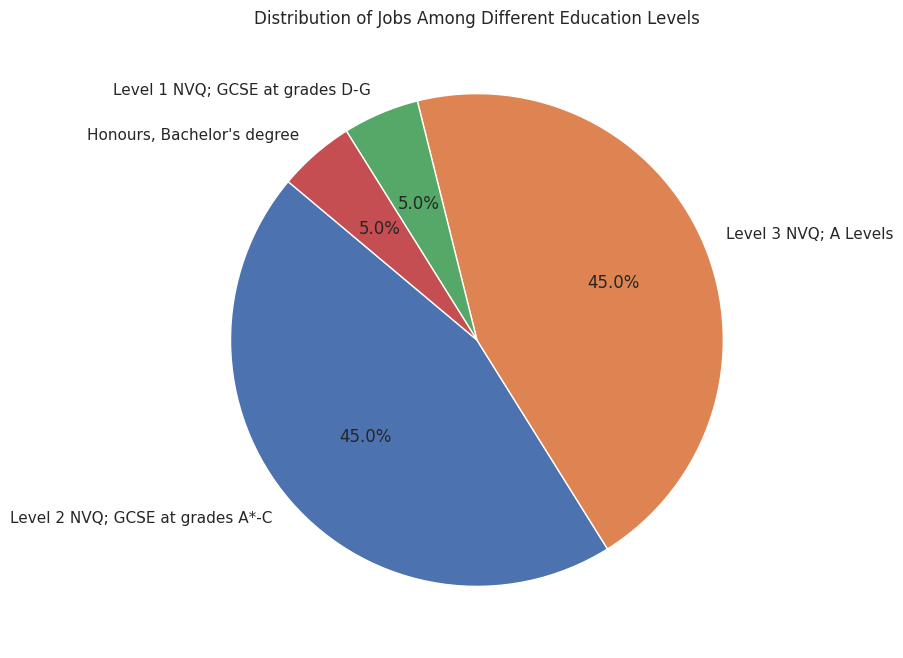

In [ ]:
# Pie Chart for 'Education Level'
education_level_counts = df_job_skills_OCC_local_area['Education Level'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_level_counts, labels=education_level_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Jobs Among Different Education Levels')
plt.show()


In [ ]:
# Box Plot for 'Median Wages'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_job_skills_OCC_local_area, x='Median Wages')
plt.title('Box Plot of Median Wages')
plt.xlabel('Median Wages (£)')
plt.show()


# Skills Analysis

####  top 10 and bottom 10 skills in all industries.

In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/drive/My Drive/Colab _ Data analysis/RA task.xlsx'

# Read the specific sheet into a DataFrame
top_skills_by_occ_local_area_df = pd.read_excel(file_path, sheet_name='Top skills by occ local area')

# Drop the 'SOC' column
top_skills_by_occ_local_area_df = top_skills_by_occ_local_area_df.drop('SOC ', axis=1)

# Print the DataFrame
print(top_skills_by_occ_local_area_df)




                           Occupation name                    SKILL_NAME  \
0      Actors, entertainers and presenters                      Planning   
1      Actors, entertainers and presenters              English Language   
2      Actors, entertainers and presenters               Self-Motivation   
3      Actors, entertainers and presenters                     Pantomime   
4      Actors, entertainers and presenters  Interpersonal Communications   
...                                    ...                           ...   
49871                                  NaN                    Apache Ant   
49872                                  NaN      Business Support Systems   
49873                                  NaN      Discounts And Allowances   
49874                                  NaN         Promotional Materials   
49875                                  NaN             Computer Security   

       SKILL_COUNT  
0                3  
1                3  
2                2  
3  

In [ ]:
skill_counts = top_skills_by_occ_local_area_df.groupby('SKILL_NAME')['SKILL_COUNT'].sum()


In [ ]:
top_10_skills = skill_counts.nlargest(10)


In [ ]:
bottom_10_skills = skill_counts.nsmallest(10)


In [ ]:
# Print the top 10 skills
print("Top 10 Skills:")
print(top_10_skills)

# Print the bottom 10 skills
print("\nBottom 10 Skills:")
print(bottom_10_skills)


Top 10 Skills:
SKILL_NAME
Communications      9197
Customer Service    6286
Management          5614
Leadership          3535
Nursing             3101
Sales               3011
English Language    2790
Teaching            2708
Teamwork            2631
Coaching            2541
Name: SKILL_COUNT, dtype: int64

Bottom 10 Skills:
SKILL_NAME
2D Animation                             1
2D Computer-Aided Drafting And Design    1
3D Art                                   1
3D Rendering                             1
5S Methodology                           1
ARM Architecture                         1
Abutments                                1
Academic Libraries                       1
Academic Record-Keeping                  1
Account Closures                         1
Name: SKILL_COUNT, dtype: int64


In [ ]:
import pandas as pd

# Load your DataFrame
# top_skills_by_occ_local_area_df = pd.read_excel(file_path, sheet_name='Top skills by occ local area')

# Define a list of occupations related to the tourism and leisure industry
tourism_and_leisure_occupations = [
    'Chefs',
    'Waiters and Waitresses',
    'Betting Shop and Gambling Establishment Managers',
    'Catering and Bar Managers',
    'Restaurant and Catering Establishment Managers and Proprietors',
    'Bar Staff',
    'Hotel and Accommodation Managers and Proprietors',
    'Coffee Shop Workers',
    'Cooks',
    'Photographers, Audio-visual and Broadcasting Equipment Operators',
    'Leisure and Travel Service Occupations n.e.c.',
    'Leisure and Theme Park Attendants',
    'Leisure and Sports Managers and Proprietors',
    'Managers and Directors in the Creative Industries',
    'Air Travel Assistants',
    'Travel Agents',
    'Arts Officers, Producers and Directors',
    'Hairdressing and Beauty Salon Managers and Proprietors',
    'Publicans and Managers of Licensed Premises',
    'Betting Shop and Gambling Establishment Managers'
]

# Filter the DataFrame for these occupations
tourism_leisure_df = top_skills_by_occ_local_area_df[top_skills_by_occ_local_area_df['Occupation name'].isin(tourism_and_leisure_occupations)]

# Extract unique skills
unique_skills = tourism_leisure_df['SKILL_NAME'].unique()

# Print the unique skills
print("Unique Skills for Tourism and Leisure Industry:")
for skill in unique_skills:
    print(skill)


Unique Skills for Tourism and Leisure Industry:
Cooking
Restaurant Operation
Food Safety And Sanitation
Communications
Food Preparation
Sales
Enthusiasm
Management
Customer Service
Product Knowledge
Cleanliness
Leadership
Operations
Seafood Preparation
Grilling
Teamwork
Stock Control
Detail Oriented
Stock Rotation
Organizational Skills
Problem Solving
Menu Planning
Willingness To Learn
Profit Margins
Budgeting
Safety Monitoring
Food Services
Hazard Analysis And Critical Control Points (HACCP)
Calmness Under Pressure
Composure
Food Plating And Presentation
Imagination
Coaching
Auditing
Scheduling
Interpersonal Communications
Call Center Experience
Kitchen Management
Apache Pig
Occupational Safety And Health
Constructive Feedback
Team Performance Management
Mentorship
Innovation
Planning
Energetic
Financial Management
Stocks (Inventory)
Training And Development
Marketing
Punctuality
Self-Motivation
Positivity
Prioritization
Safety Standards
Reliability
Purchasing
Proactivity
Ingredient P

from the top skills dataset: deleted the row: Chefs, "Endoscopy", 2 for incongruency and data cleaning aims.


In [ ]:
import pandas as pd

# Load your DataFrame
# top_skills_by_occ_local_area_df = pd.read_excel(file_path, sheet_name='Top skills by occ local area')

# Define the list of occupations related to the tourism and leisure industry
tourism_and_leisure_occupations =    ['Chefs',
    'Waiters and Waitresses',
    'Betting Shop and Gambling Establishment Managers',
    'Catering and Bar Managers',
    'Restaurant and Catering Establishment Managers and Proprietors',
    'Bar Staff',
    'Hotel and Accommodation Managers and Proprietors',
    'Coffee Shop Workers',
    'Cooks',
    'Photographers, Audio-visual and Broadcasting Equipment Operators',
    'Leisure and Travel Service Occupations n.e.c.',
    'Leisure and Theme Park Attendants',
    'Leisure and Sports Managers and Proprietors',
    'Managers and Directors in the Creative Industries',
    'Air Travel Assistants',
    'Travel Agents',
    'Arts Officers, Producers and Directors',
    'Hairdressing and Beauty Salon Managers and Proprietors',
    'Publicans and Managers of Licensed Premises',
    'Betting Shop and Gambling Establishment Managers'
]


# Filter the DataFrame for these occupations
tourism_leisure_df = top_skills_by_occ_local_area_df[top_skills_by_occ_local_area_df['Occupation name'].isin(tourism_and_leisure_occupations)]

# Group by 'SKILL_NAME' and sum the 'SKILL_COUNT' for each skill
skills_count_sum = tourism_leisure_df.groupby('SKILL_NAME')['SKILL_COUNT'].sum()

# Sort the summed counts in descending order to see the most valued skills
sorted_skills = skills_count_sum.sort_values(ascending=False)

# Print the skills and their counts
print("Skills and Their Counts in Tourism and Leisure Industry:")
for skill, count in sorted_skills.items():
    print(f"{skill}: {count}")


Skills and Their Counts in Tourism and Leisure Industry:
Cooking: 381
Restaurant Operation: 242
Food Safety And Sanitation: 204
Communications: 172
Food Preparation: 164
Enthusiasm: 128
Sales: 127
Customer Service: 114
Management: 111
Product Knowledge: 97
Cleanliness: 94
Leadership: 83
Operations: 82
Seafood Preparation: 80
Teamwork: 68
Grilling: 67
Stock Control: 66
Detail Oriented: 61
Organizational Skills: 54
Stock Rotation: 54
Problem Solving: 52
Menu Planning: 46
Willingness To Learn: 40
Profit Margins: 38
Safety Monitoring: 37
Budgeting: 37
Food Services: 36
Hazard Analysis And Critical Control Points (HACCP): 36
Stocks (Inventory): 34
Calmness Under Pressure: 32
Planning: 31
Composure: 31
Food Plating And Presentation: 27
Coaching: 27
Imagination: 27
Auditing: 26
Scheduling: 24
Interpersonal Communications: 24
Call Center Experience: 23
Apache Pig: 22
Occupational Safety And Health: 22
Kitchen Management: 22
Constructive Feedback: 20
Innovation: 20
Mentorship: 19
Team Performan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the sorted_skills series is already defined and loaded as per your previous code

# Select the top 20 and bottom 20 skills
top_20_skills = sorted_skills.head(20)
bottom_20_skills = sorted_skills.tail(20)

# Plotting the top 20 skills
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_skills.values, y=top_20_skills.index)
plt.title('Top 20 Skills in the Tourism and Leisure Industry')
plt.xlabel('Skill Count')
plt.ylabel('Skills')
plt.show()

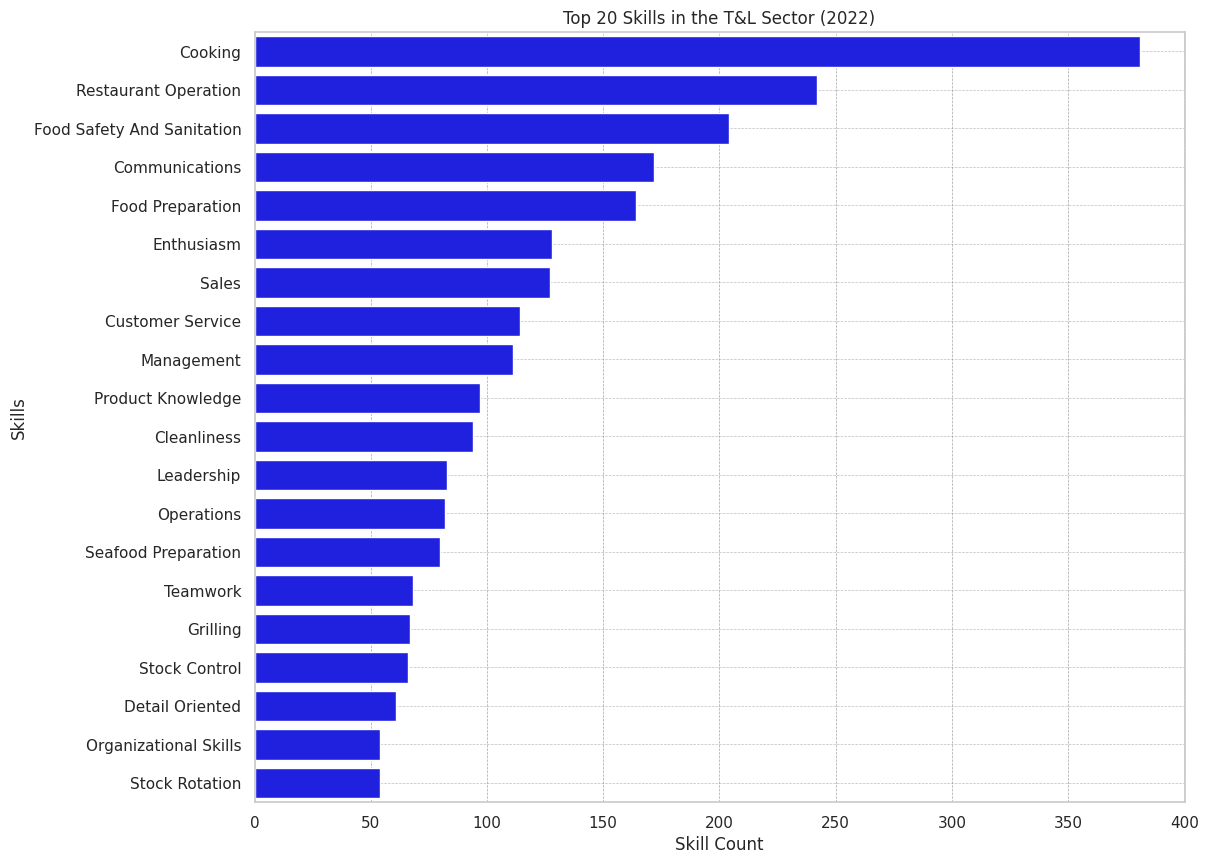

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the sorted_skills series is already defined and loaded as per your previous code

# Select the top 20 and bottom 20 skills
top_20_skills = sorted_skills.head(20)

# Plotting the top 20 skills with improved grid
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_skills.values, y=top_20_skills.index, palette=['blue']*len(top_20_skills))
plt.title('Top 20 Skills in the T&L Sector (2022)')
plt.xlabel('Skill Count')
plt.ylabel('Skills')
plt.grid(axis='x', color='grey', linestyle='--', linewidth=0.5, alpha=0.7)  # Enhanced grid
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.5, alpha=0.5)  # Adding horizontal grid lines
plt.show()

In [ ]:
!pip install wordcloud


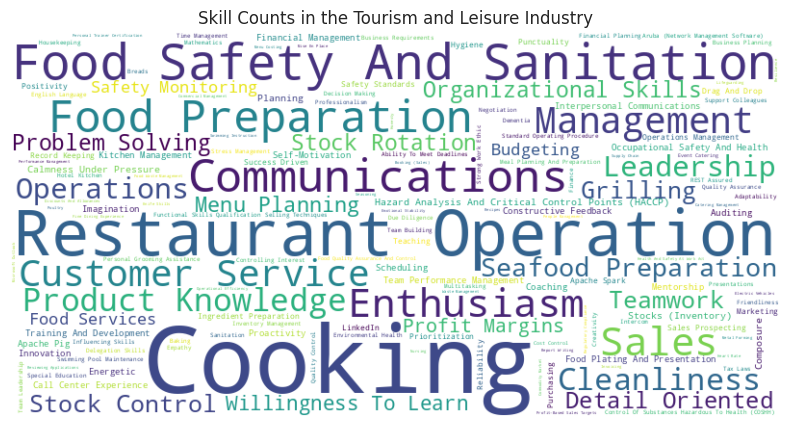

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming sorted_skills is already defined and loaded as per your previous code

# Convert the skills and counts into a dictionary suitable for the WordCloud
skills_dict = sorted_skills.to_dict()

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color ='white')

# Generate the word cloud using the skills_dict
wordcloud.generate_from_frequencies(skills_dict)

# Plotting the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skill Counts in the Tourism and Leisure Industry')
plt.show()


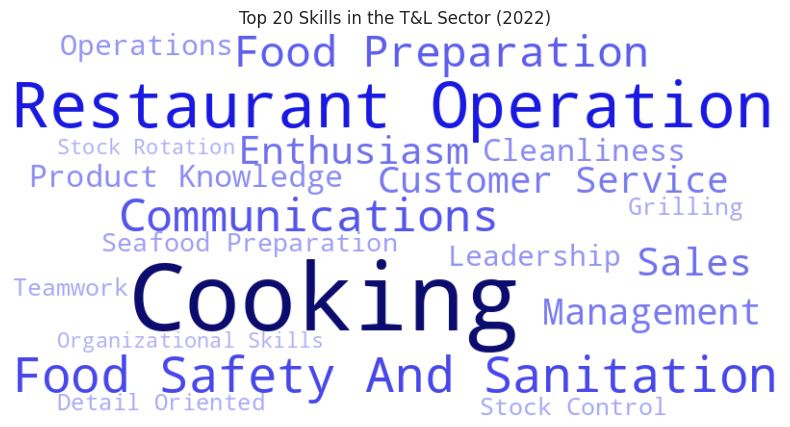

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming sorted_skills is already defined and loaded as per your previous code

# Select the top 20 skills
top_20_skills = sorted_skills.head(20)

# Convert the top 20 skills and counts into a dictionary
skills_dict = top_20_skills.to_dict()

# Define a color function for different shades of blue
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl(240, 80%, {100 - int(font_size / max(top_20_skills) * 300)}%)"

# Create the WordCloud object with the custom color function
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func)

# Generate the word cloud using the skills_dict
wordcloud.generate_from_frequencies(skills_dict)

# Plotting the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Skills in the T&L Sector (2022)')
plt.show()


# Skills categorization based on role

In [ ]:
!pip install requests


In [ ]:
!pip install pandas openpyxl

USE CASE

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Looking for a software engineer experienced in developing web applications. Must have proficiency in JavaScript, React.js, and CSS. Experience with AWS and microservices is a plus."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Software Engineering, Confidence: 1.0, Type: Specialized Skill
Skill: JavaScript (Programming Language), Confidence: 1.0, Type: Specialized Skill
Skill: React.js (Javascript Library), Confidence: 1.0, Type: Specialized Skill
Skill: Microservices, Confidence: 1.0, Type: Specialized Skill
Skill: Cascading Style Sheets (CSS), Confidence: 0.9999019503593445, Type: Specialized Skill
Skill: Amazon Web Services, Confidence: 0.9996156692504883, Type: Specialized Skill


Natual language solution for Lightcast APIs

##### Chefs "Looking for creative and experienced chefs to join our dynamic kitchen team. Candidates should have expertise in various cooking techniques, menu innovation, and food presentation. A strong grasp of kitchen management and food safety regulations is crucial. Specialization in specific cuisines or dietary needs is a plus."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Looking for creative and experienced chefs to join our dynamic kitchen team. Candidates should have expertise in various cooking techniques, menu innovation, and food presentation. A strong grasp of kitchen management and food safety regulations is crucial. Specialization in specific cuisines or dietary needs is a plus."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Food Plating And Presentation, Confidence: 1.0, Type: Specialized Skill
Skill: Kitchen Management, Confidence: 1.0, Type: Specialized Skill
Skill: Food Safety And Sanitation, Confidence: 0.8502040505409241, Type: Specialized Skill
Skill: Cooking, Confidence: 0.7005053162574768, Type: Specialized Skill
Skill: Innovation, Confidence: 0.693877637386322, Type: Common Skill


#### Waiters and Waitresses "Seeking engaging and attentive waiters/waitresses for our high-end restaurant. Must have excellent customer service skills, knowledge of menu offerings, and the ability to work in a fast-paced environment. Experience with point-of-sale systems and a basic understanding of food and beverage pairings is desirable."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Seeking engaging and attentive waiters/waitresses for our high-end restaurant. Must have excellent customer service skills, knowledge of menu offerings, and the ability to work in a fast-paced environment. Experience with point-of-sale systems and a basic understanding of food and beverage pairings is desirable."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Restaurant Operation, Confidence: 0.9976993799209595, Type: Specialized Skill
Skill: Point Of Sale, Confidence: 0.8670615553855896, Type: Specialized Skill
Skill: Customer Service, Confidence: 0.6885340809822083, Type: Common Skill


#### Catering and Bar Managers "In search of experienced catering and bar managers to oversee operations. Candidates should have strong leadership skills, inventory management experience, and the ability to design appealing menus. Proficiency in managing budgets and enhancing customer satisfaction is essential."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "In search of experienced catering and bar managers to oversee operations. Candidates should have strong leadership skills, inventory management experience, and the ability to design appealing menus. Proficiency in managing budgets and enhancing customer satisfaction is essential."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Leadership, Confidence: 1.0, Type: Common Skill
Skill: Inventory Management, Confidence: 1.0, Type: Specialized Skill
Skill: Customer Service, Confidence: 1.0, Type: Common Skill
Skill: Operations, Confidence: 0.718209445476532, Type: Common Skill



#### Restaurant and Catering Establishment Managers and Proprietors "Looking for motivated managers and proprietors with a knack for running successful restaurant and catering establishments. Must have expertise in business management, staff training, and customer service excellence. Experience in marketing and event coordination is a significant advantage."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Looking for motivated managers and proprietors with a knack for running successful restaurant and catering establishments. Must have expertise in business management, staff training, and customer service excellence. Experience in marketing and event coordination is a significant advantage."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Marketing, Confidence: 1.0, Type: Specialized Skill
Skill: Event Planning, Confidence: 1.0, Type: Specialized Skill
Skill: Management, Confidence: 0.9994950294494629, Type: Common Skill
Skill: Restaurant Operation, Confidence: 0.9976993799209595, Type: Specialized Skill
Skill: Customer Service, Confidence: 0.6885340809822083, Type: Common Skill


#### Bar Staff "Seeking enthusiastic bar staff to provide exceptional service. Ideal candidates should have knowledge of mixology, beverage service, and inventory management. Ability to work under pressure and maintain a clean and organized bar area is important."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Seeking enthusiastic bar staff to provide exceptional service. Ideal candidates should have knowledge of mixology, beverage service, and inventory management. Ability to work under pressure and maintain a clean and organized bar area is important."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Enthusiasm, Confidence: 1.0, Type: Common Skill
Skill: Inventory Management, Confidence: 1.0, Type: Specialized Skill


#### Hotel and Accommodation Managers and Proprietors "In search of experienced hotel and accommodation managers and proprietors to oversee daily operations. Candidates must have a strong background in hospitality management, guest relations, and facility maintenance. Skills in financial planning and staff management are key."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "In search of experienced hotel and accommodation managers and proprietors to oversee daily operations. Candidates must have a strong background in hospitality management, guest relations, and facility maintenance. Skills in financial planning and staff management are key."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Hospitality Management, Confidence: 1.0, Type: Specialized Skill
Skill: Guest Relations, Confidence: 1.0, Type: Specialized Skill
Skill: Facility Repair And Maintenance, Confidence: 1.0, Type: Specialized Skill
Skill: Financial Planning, Confidence: 1.0, Type: Specialized Skill
Skill: Staff Management, Confidence: 1.0, Type: Specialized Skill
Skill: Operations, Confidence: 0.718209445476532, Type: Common Skill


#### Coffee Shop Workers "Looking for friendly and efficient coffee shop workers. Responsibilities include coffee preparation, customer service, and maintaining a clean work environment. Barista experience and knowledge of various coffee beverages are preferred."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Looking for friendly and efficient coffee shop workers. Responsibilities include coffee preparation, customer service, and maintaining a clean work environment. Barista experience and knowledge of various coffee beverages are preferred."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Customer Service, Confidence: 0.6885340809822083, Type: Common Skill


Cooks "Seeking skilled cooks to join our kitchen team. Candidates should have experience in food preparation, cooking, and kitchen maintenance. Understanding of different cooking methods and health and safety standards is vital."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Seeking skilled cooks to join our kitchen team. Candidates should have experience in food preparation, cooking, and kitchen maintenance. Understanding of different cooking methods and health and safety standards is vital."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Health And Safety Standards, Confidence: 1.0, Type: Specialized Skill
Skill: Food Preparation, Confidence: 0.9996994733810425, Type: Specialized Skill
Skill: Cooking, Confidence: 0.9804545044898987, Type: Specialized Skill


#### Photographers, Audio-Visual and Broadcasting Equipment Operators "In search of talented photographers and audio-visual operators with a passion for creating captivating content. Must have technical proficiency in handling various equipment and editing software. Creativity and an eye for detail are essential."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "In search of talented photographers and audio-visual operators with a passion for creating captivating content. Must have technical proficiency in handling various equipment and editing software. Creativity and an eye for detail are essential.In search of talented photographers and audio-visual operators with a passion for creating captivating content. Must have technical proficiency in handling various equipment and editing software. Creativity and an eye for detail are essential."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Creativity, Confidence: 0.851629376411438, Type: Common Skill
Skill: Editing, Confidence: 0.6520572900772095, Type: Common Skill


#### Leisure and Travel Service Occupations n.e.c. "Looking for versatile professionals in leisure and travel services. Candidates should have a broad skill set, including customer service, organization, and problem-solving abilities. Experience in various leisure and travel sectors is highly desirable."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Looking for versatile professionals in leisure and travel services. Candidates should have a broad skill set, including customer service, organization, and problem-solving abilities. Experience in various leisure and travel sectors is highly desirable."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Problem Solving, Confidence: 0.9786332249641418, Type: Common Skill
Skill: Customer Service, Confidence: 0.6885340809822083, Type: Common Skill


#### Leisure and Theme Park Attendants "Seeking energetic and friendly attendants for our leisure and theme park. Responsibilities include guest assistance, ride operation, and maintaining safety standards. Excellent communication skills and a positive attitude are key."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Seeking energetic and friendly attendants for our leisure and theme park. Responsibilities include guest assistance, ride operation, and maintaining safety standards. Excellent communication skills and a positive attitude are key."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Energetic, Confidence: 1.0, Type: Common Skill
Skill: Safety Standards, Confidence: 1.0, Type: Specialized Skill
Skill: Positivity, Confidence: 1.0, Type: Common Skill
Skill: Communications, Confidence: 0.6904411315917969, Type: Common Skill


#### Leisure and Sports Managers "Looking for dynamic leisure and sports managers to oversee recreational facilities. Must have experience in facility management, program development, and staff supervision. A background in sports science or recreation management is advantageous."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Looking for dynamic leisure and sports managers to oversee recreational facilities. Must have experience in facility management, program development, and staff supervision. A background in sports science or recreation management is advantageous."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Facility Management, Confidence: 1.0, Type: Specialized Skill
Skill: Exercise Science, Confidence: 1.0, Type: Specialized Skill
Skill: Management, Confidence: 0.7795451283454895, Type: Common Skill
Skill: Program Development, Confidence: 0.5, Type: Specialized Skill


#### Managers and Directors in the Creative Industries "In search of visionary managers and directors to lead in the creative industries. Candidates should have a strong track record in project management, team leadership, and creative problem-solving. Experience in arts, media, or entertainment sectors is crucial."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "In search of visionary managers and directors to lead in the creative industries. Candidates should have a strong track record in project management, team leadership, and creative problem-solving. Experience in arts, media, or entertainment sectors is crucial."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Project Management, Confidence: 1.0, Type: Specialized Skill
Skill: Team Leadership, Confidence: 1.0, Type: Common Skill
Skill: Creative Problem Solving, Confidence: 1.0, Type: Common Skill
Skill: Visionary, Confidence: 0.7407825589179993, Type: Common Skill


#### Air Travel Assistants "Seeking professional and courteous air travel assistants. Must have excellent communication skills, knowledge of safety procedures, and the ability to provide high-quality passenger service. Previous experience in the airline industry is preferred."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Seeking professional and courteous air travel assistants. Must have excellent communication skills, knowledge of safety procedures, and the ability to provide high-quality passenger service. Previous experience in the airline industry is preferred."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Passenger Service, Confidence: 1.0, Type: Specialized Skill
Skill: Communications, Confidence: 0.6904411315917969, Type: Common Skill


#### Travel Agents "Looking for experienced travel agents with a passion for travel planning. Candidates should have strong knowledge of travel software, destination information, and customer service skills. Ability to tailor travel experiences to client needs is essential."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Looking for experienced travel agents with a passion for travel planning. Candidates should have strong knowledge of travel software, destination information, and customer service skills. Ability to tailor travel experiences to client needs is essential."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Travel Planning, Confidence: 1.0, Type: Specialized Skill
Skill: Customer Service, Confidence: 0.6885340809822083, Type: Common Skill


#### Arts Officers, Producers and Directors "Seeking innovative arts officers, producers, and directors to lead various creative projects. Must have experience in project management, budgeting, and team collaboration. A background in the arts or media production is highly valued."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Seeking innovative arts officers, producers, and directors to lead various creative projects. Must have experience in project management, budgeting, and team collaboration. A background in the arts or media production is highly valued."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Project Management, Confidence: 1.0, Type: Specialized Skill
Skill: Media Production, Confidence: 1.0, Type: Specialized Skill
Skill: Innovation, Confidence: 0.6830916404724121, Type: Common Skill
Skill: Budgeting, Confidence: 0.5963923335075378, Type: Common Skill


#### Hairdressing and Beauty Salon Managers and Proprietors "In search of skilled managers and proprietors for hairdressing and beauty salons. Candidates should have experience in salon management, customer service, and staff training. Knowledge of current beauty trends and treatments is important."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "In search of skilled managers and proprietors for hairdressing and beauty salons. Candidates should have experience in salon management, customer service, and staff training. Knowledge of current beauty trends and treatments is important."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Management, Confidence: 0.7795451283454895, Type: Common Skill
Skill: Customer Service, Confidence: 0.6885340809822083, Type: Common Skill


### Publicans and Managers of Licensed Premises "Looking for experienced publicans and managers to run licensed premises. Must have strong leadership skills, knowledge of licensing laws, and the ability to create a welcoming atmosphere. Experience in event hosting and inventory management is a plus."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Looking for experienced publicans and managers to run licensed premises. Must have strong leadership skills, knowledge of licensing laws, and the ability to create a welcoming atmosphere. Experience in event hosting and inventory management is a plus."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Leadership, Confidence: 1.0, Type: Common Skill
Skill: Inventory Management, Confidence: 1.0, Type: Specialized Skill


#### Betting Shop and Gambling Establishment Managers "Seeking capable managers for betting shops and gambling establishments. Candidates should have experience in gaming operations, customer service, and staff supervision. Knowledge of gambling regulations and a commitment to responsible gaming practices is essential."

In [ ]:
import requests
import json

# Set up your credentials and token endpoint
client_id = 'yr1qemgrh6os57ws'
client_secret = 'kVSX2YB7'
auth_url = 'https://auth.emsicloud.com/connect/token'

# Obtain access token
data = {
    'client_id': client_id,
    'client_secret': client_secret,
    'grant_type': 'client_credentials',
    'scope': 'emsi_open'
}
response = requests.post(auth_url, data=data)
access_token = response.json().get('access_token')

# API endpoint for skill extraction
api_url = 'https://emsiservices.com/skills/versions/latest/extract/trace'

# Prepare your request data with the sample text
sample_text = "Seeking capable managers for betting shops and gambling establishments. Candidates should have experience in gaming operations, customer service, and staff supervision. Knowledge of gambling regulations and a commitment to responsible gaming practices is essential."
payload = {
    'text': sample_text,
    'confidenceThreshold': 0.5
}
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/json'
}

# Make the API call
response = requests.post(api_url, json=payload, headers=headers)

# Process and categorize the skills
if response.status_code == 200:
    skills_data = response.json().get('data', {}).get('skills', [])
    for skill in skills_data:
        skill_name = skill.get('skill', {}).get('name', '')
        skill_confidence = skill.get('confidence', 0)
        skill_type = skill.get('skill', {}).get('type', {}).get('name', '')
        print(f"Skill: {skill_name}, Confidence: {skill_confidence}, Type: {skill_type}")
else:
    print("Error fetching skills data")


Skill: Operations, Confidence: 0.718209445476532, Type: Common Skill
Skill: Customer Service, Confidence: 0.6885340809822083, Type: Common Skill


### Analysis of the types of categories

In [ ]:
import pandas as pd

# Load the data for 'Skills_ Categorization'
skills_categorization_tourism_and_leisure_df = pd.read_excel(file_path, sheet_name='Skills_ Categorization')

# Basic data analysis
print("Skills_ Categorization:")
print(skills_categorization_tourism_and_leisure_df.info())
print("\nSkills_ Categorization:")
print(skills_categorization_tourism_and_leisure_df.describe())
print(skills_categorization_tourism_and_leisure_df)


Skills_ Categorization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Job Title   59 non-null     object 
 1   Skill       59 non-null     object 
 2   Confidence  59 non-null     float64
 3   Type        59 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.0+ KB
None

Skills_ Categorization:
       Confidence
count   59.000000
mean     0.881017
std      0.150627
min      0.500000
25%      0.710000
50%      1.000000
75%      1.000000
max      1.000000
                                            Job Title  \
0                                               Chefs   
1                                               Chefs   
2                                               Chefs   
3                                               Chefs   
4                                               Chefs   
5                              Waiters and

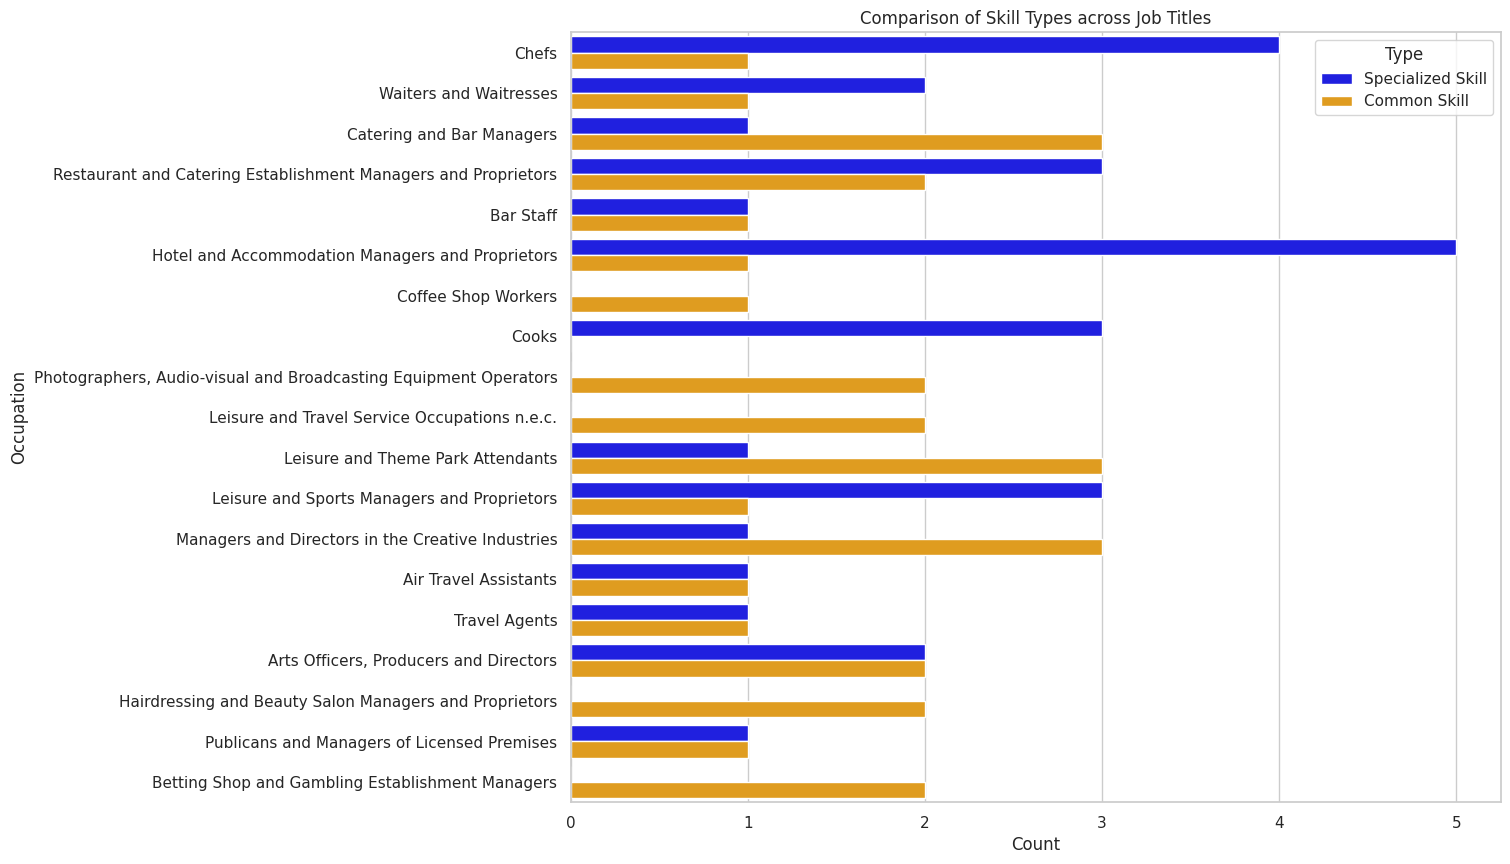

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(
    y='Job Title',
    hue='Type',
    data=skills_categorization_tourism_and_leisure_df,
    palette=['#0000FF', '#FFA500']  # Custom color palette as hex codes
)
plt.title('Comparison of Skill Types across Job Titles')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()


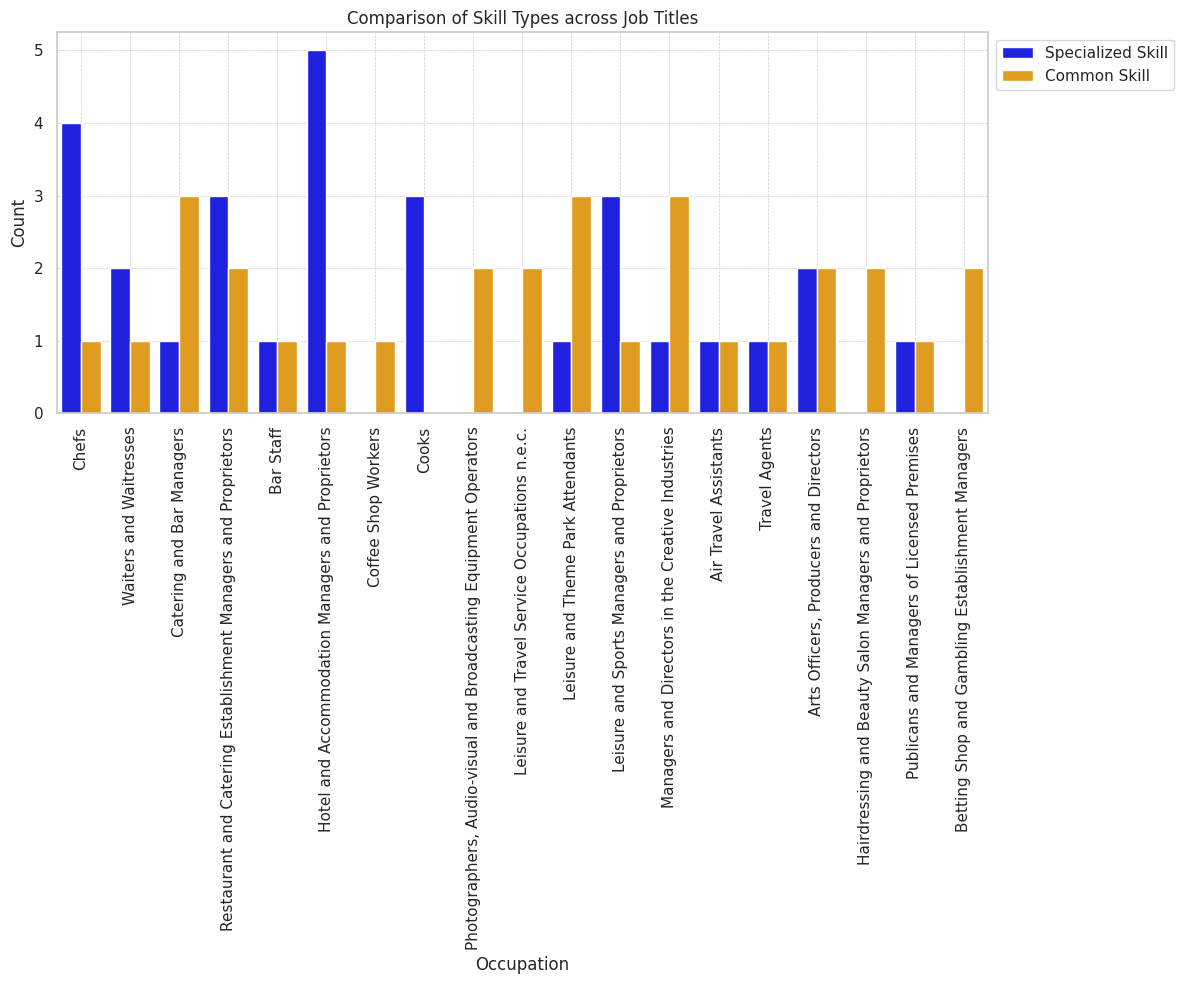

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your updated code
plt.figure(figsize=(12, 10))
sns.countplot(
    x='Job Title',  # Changed from y to x
    hue='Type',
    data=skills_categorization_tourism_and_leisure_df,
    palette=['#0000FF', '#FFA500']  # Custom color palette as hex codes
)
plt.title('Comparison of Skill Types across Job Titles')
plt.ylabel('Count')  # Changed from xlabel to ylabel
plt.xlabel('Occupation')  # Changed from ylabel to xlabel
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Adding horizontal and vertical grid lines
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Placing the legend outside the plot area, to the right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot with an adjusted layout
plt.tight_layout()
plt.show()


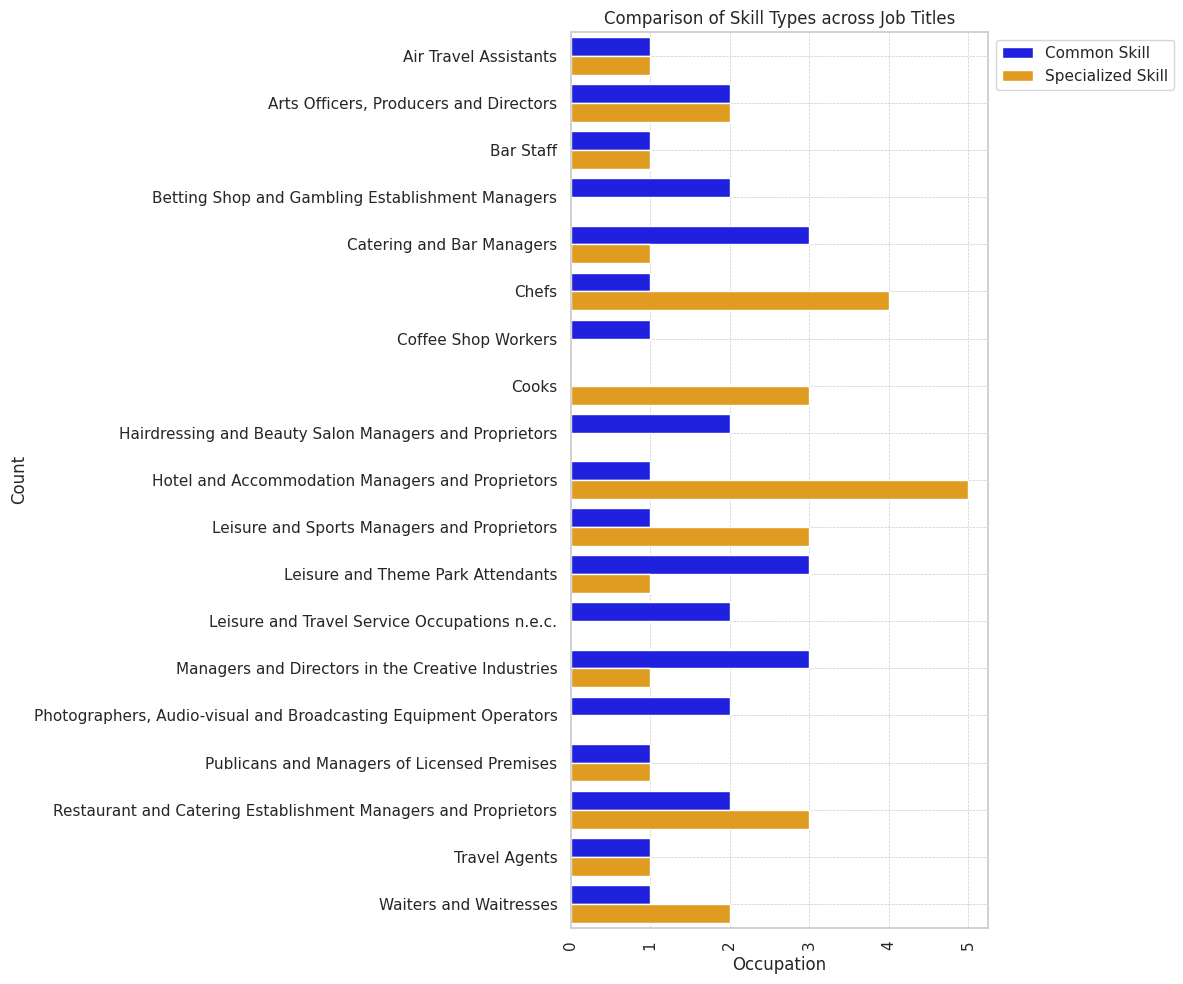

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame based on 'Job Title'
sorted_df = skills_categorization_tourism_and_leisure_df.sort_values('Job Title')

# Your updated code with the sorted DataFrame
plt.figure(figsize=(12, 10))
sns.countplot(
    y='Job Title',
    hue='Type',
    data=sorted_df,  # Use the sorted DataFrame
    palette=['#0000FF', '#FFA500']
)
plt.title('Comparison of Skill Types across Job Titles')
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Adding horizontal and vertical grid lines
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Placing the legend outside the plot area, to the right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot with an adjusted layout
plt.tight_layout()
plt.show()


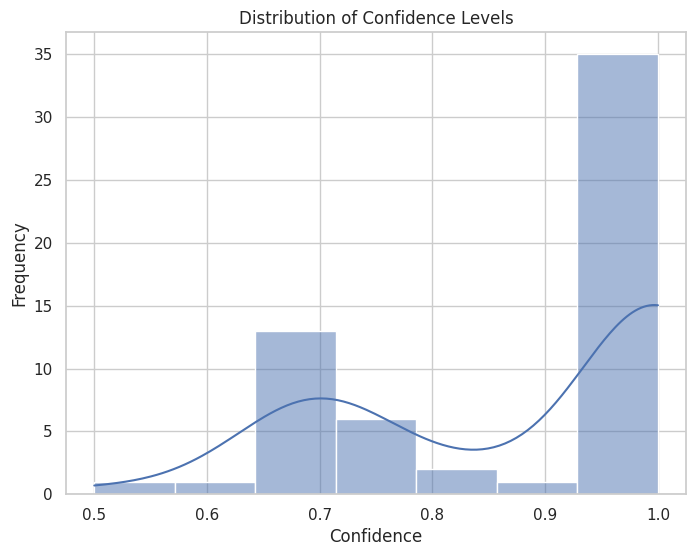

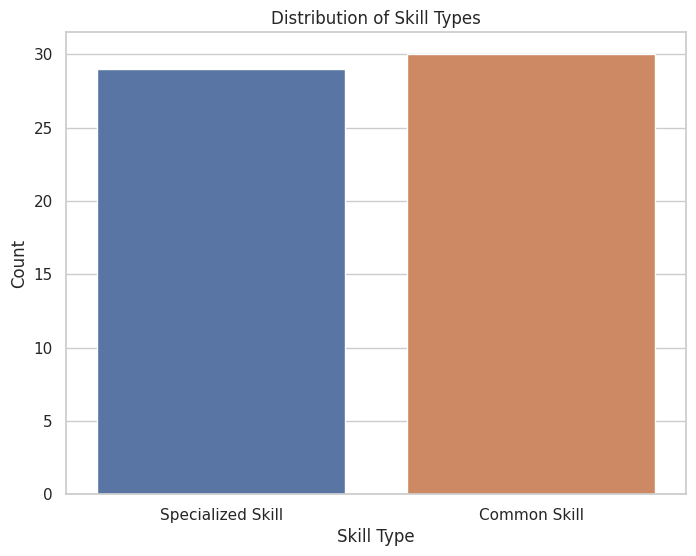

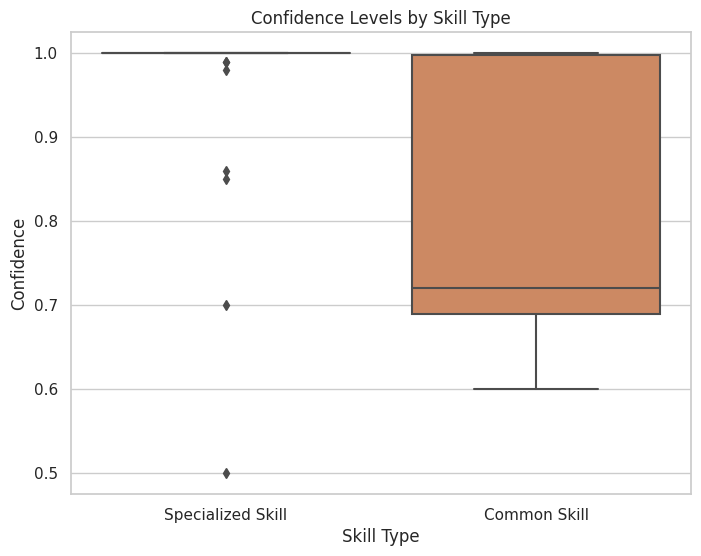

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Visualization

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram for Confidence Distribution
plt.figure(figsize=(8, 6))
sns.histplot(skills_categorization_tourism_and_leisure_df['Confidence'], kde=True)
plt.title('Distribution of Confidence Levels')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

# Bar Plot for Skill Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=skills_categorization_tourism_and_leisure_df)
plt.title('Distribution of Skill Types')
plt.xlabel('Skill Type')
plt.ylabel('Count')
plt.show()

# Box Plot for Confidence by Skill Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Confidence', data=skills_categorization_tourism_and_leisure_df)
plt.title('Confidence Levels by Skill Type')
plt.xlabel('Skill Type')
plt.ylabel('Confidence')
plt.show()

# If you want to explore job titles, you can create a similar count plot for job titles
# Note: This will be useful if the number of job titles is not too large
# plt.figure(figsize=(10, 8))
# sns.countplot(y='Job Title', data=skills_categorization_tourism_and_leisure_df, order = skills_categorization_tourism_and_leisure_df['Job Title'].value_counts().index)
# plt.title('Distribution of Job Titles')
# plt.xlabel('Count')
# plt.ylabel('Job Title')
# plt.show()


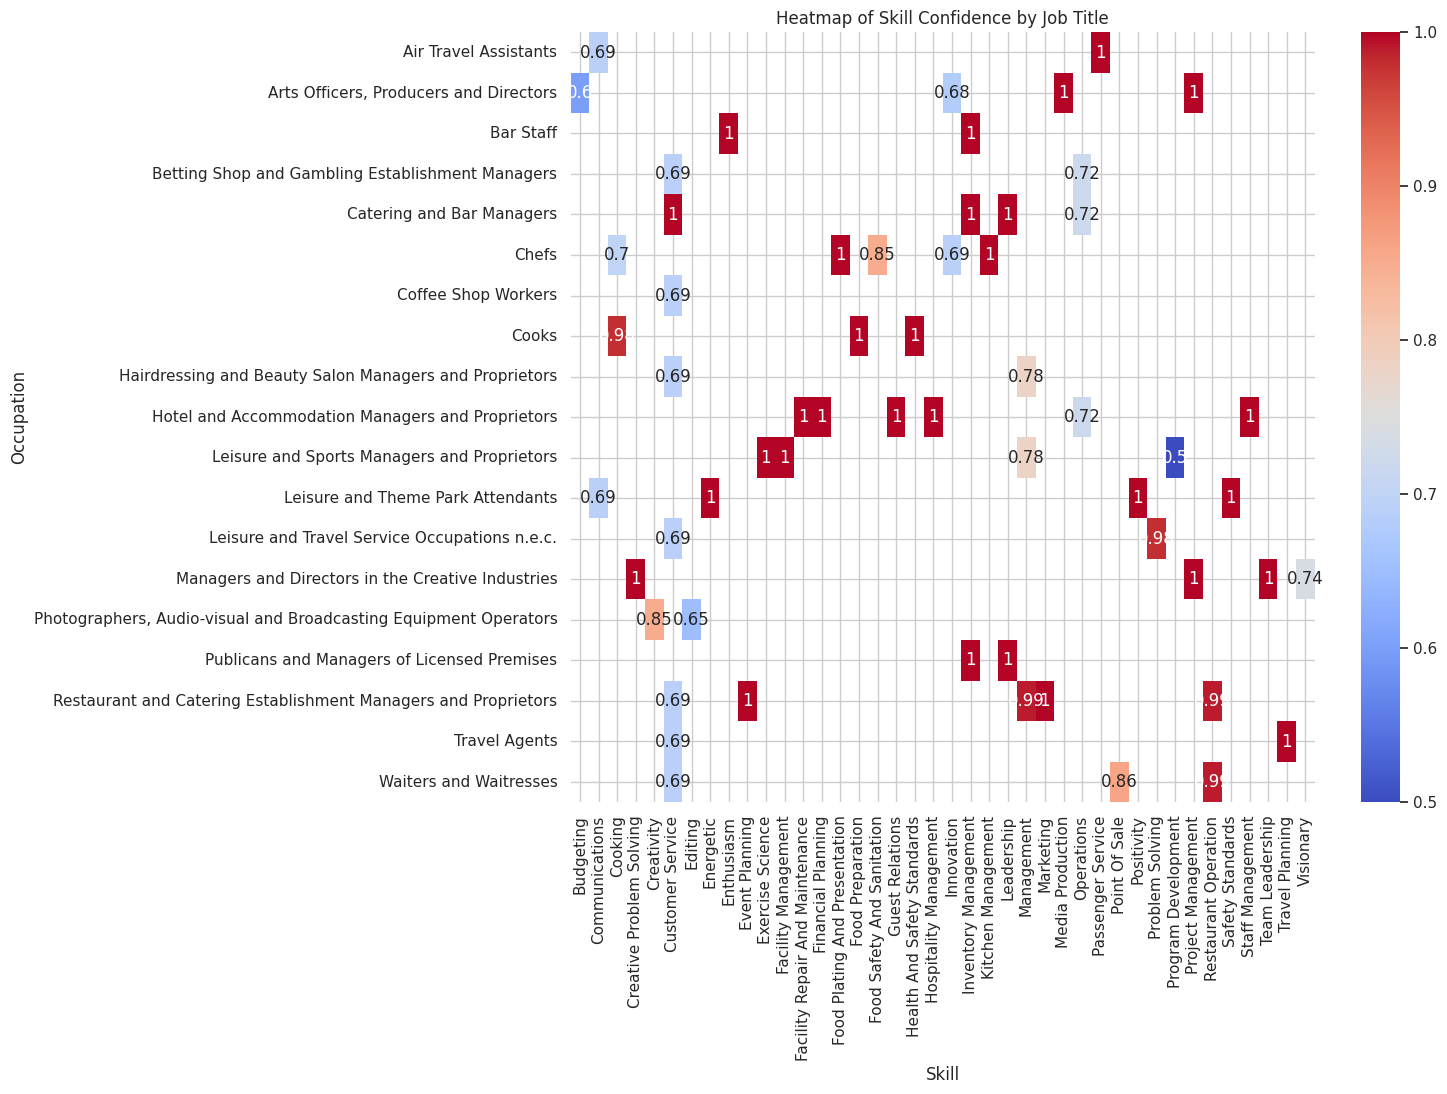

In [ ]:
pivot_table = skills_categorization_tourism_and_leisure_df.pivot_table(index='Job Title', columns='Skill', values='Confidence')
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Skill Confidence by Job Title')
plt.xlabel('Skill')
plt.ylabel('Occupation')
plt.show()


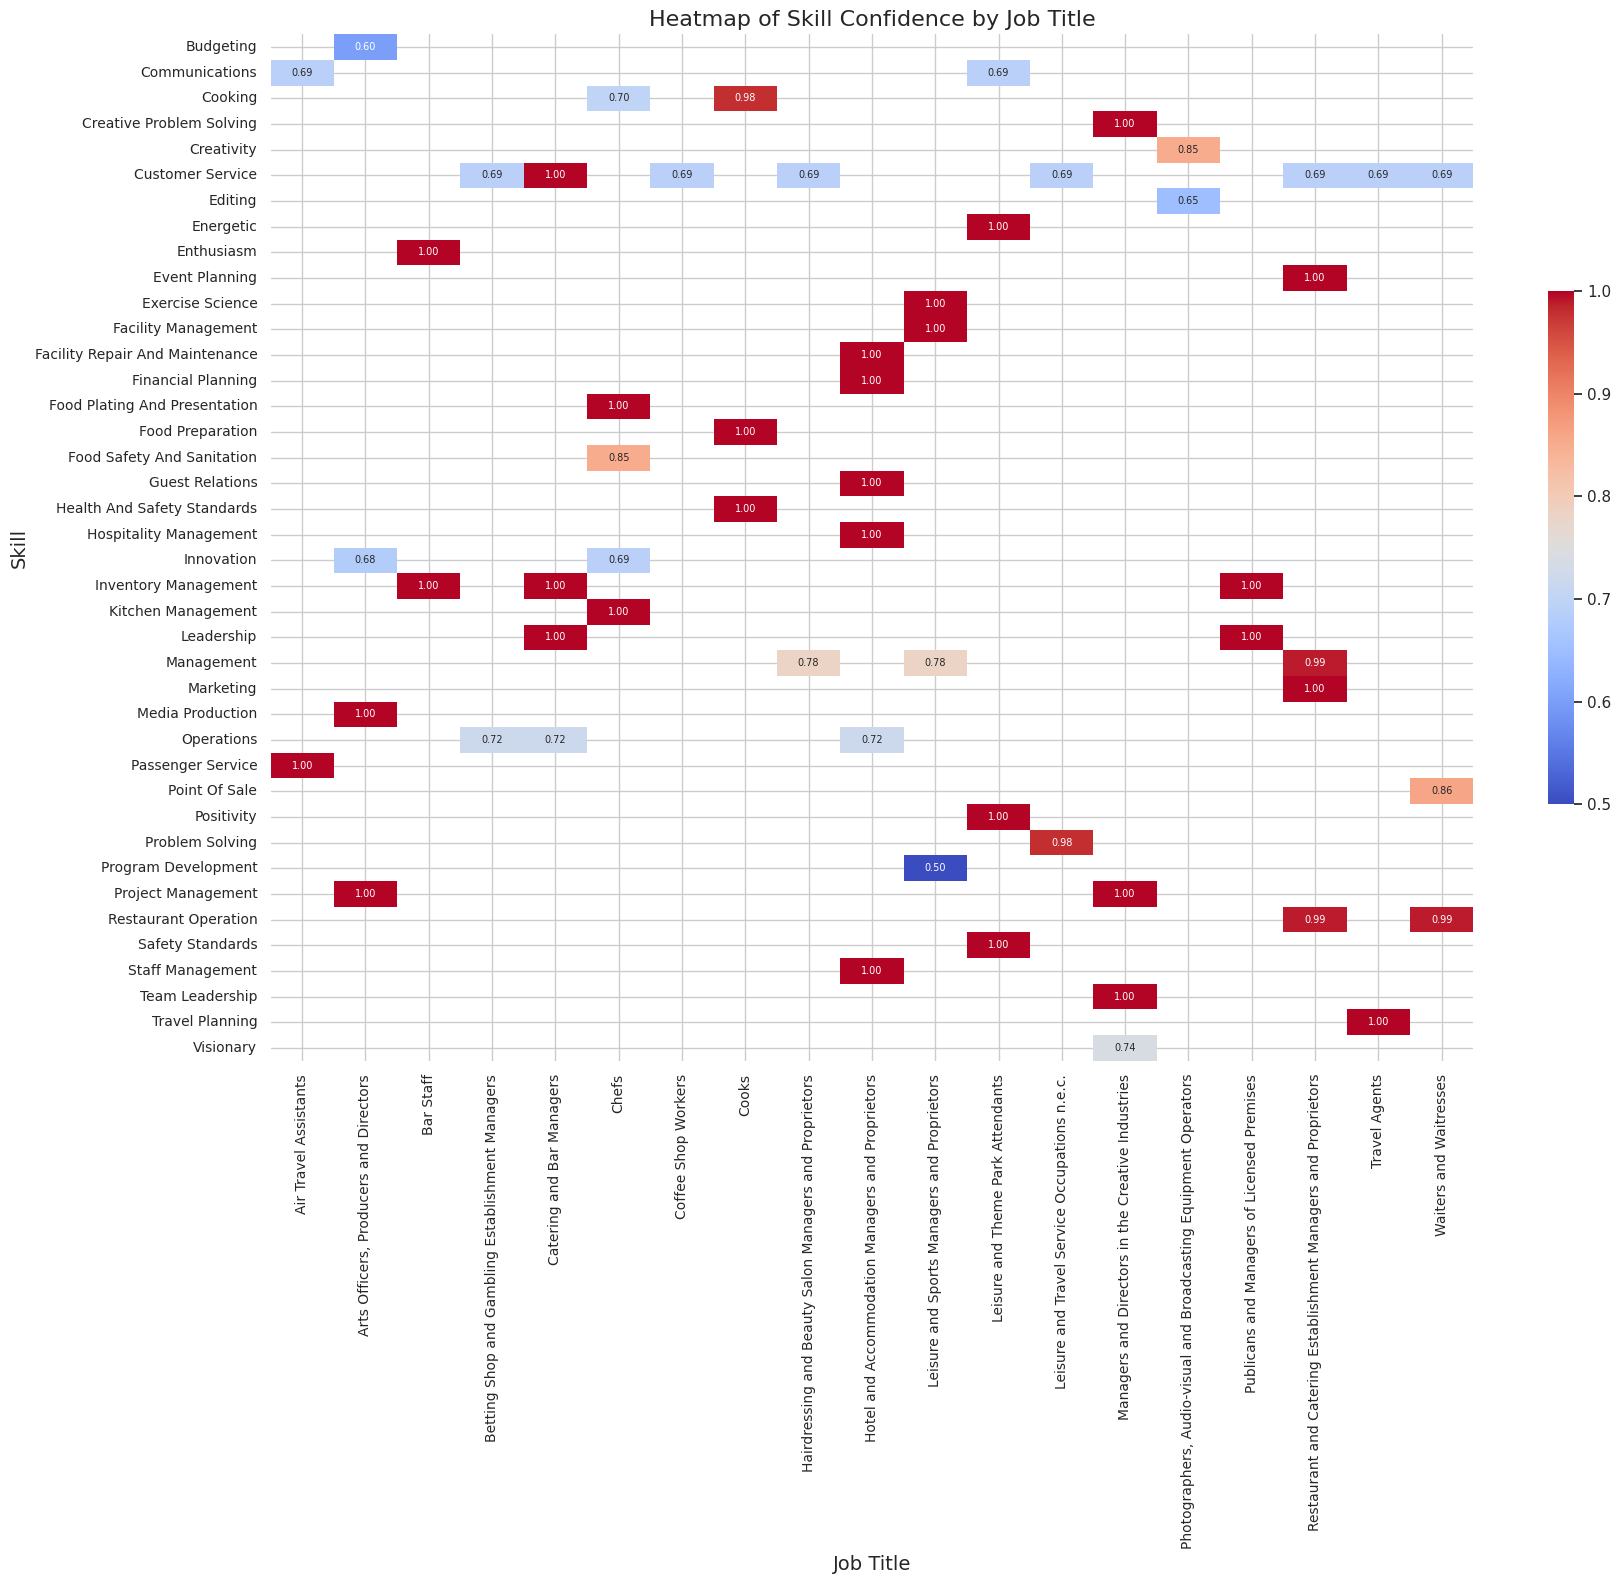

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'skills_categorization_tourism_and_leisure_df' is your DataFrame containing the necessary data.

# Create the pivot table with 'Job Title' as columns and 'Skill' as rows for better visualization
pivot_table = skills_categorization_tourism_and_leisure_df.pivot_table(index='Skill', columns='Job Title', values='Confidence')

# Set up the matplotlib figure and adjust the figure size to accommodate the annotations
plt.figure(figsize=(18, 16))  # Adjust the figure size as needed

# Draw the heatmap with the mask and correct aspect ratio, use a diverging color palette
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .5}, annot_kws={"size": 7})

# Rotate the x-axis labels for better readability if necessary
plt.xticks(fontsize=10)

# Increase the font size of the y-axis labels
plt.yticks(rotation=0, fontsize=10)  # Set rotation to 0 for y-axis labels

# Add a clear and descriptive title and labels with an increased font size for better legibility
plt.title('Heatmap of Skill Confidence by Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=14)  # Swap the label to match the inverted axes
plt.ylabel('Skill', fontsize=14)      # Swap the label to match the inverted axes

# Use tight_layout to adjust the padding between and around subplots to minimize overlap
plt.tight_layout()

# Show the heatmap
plt.show()


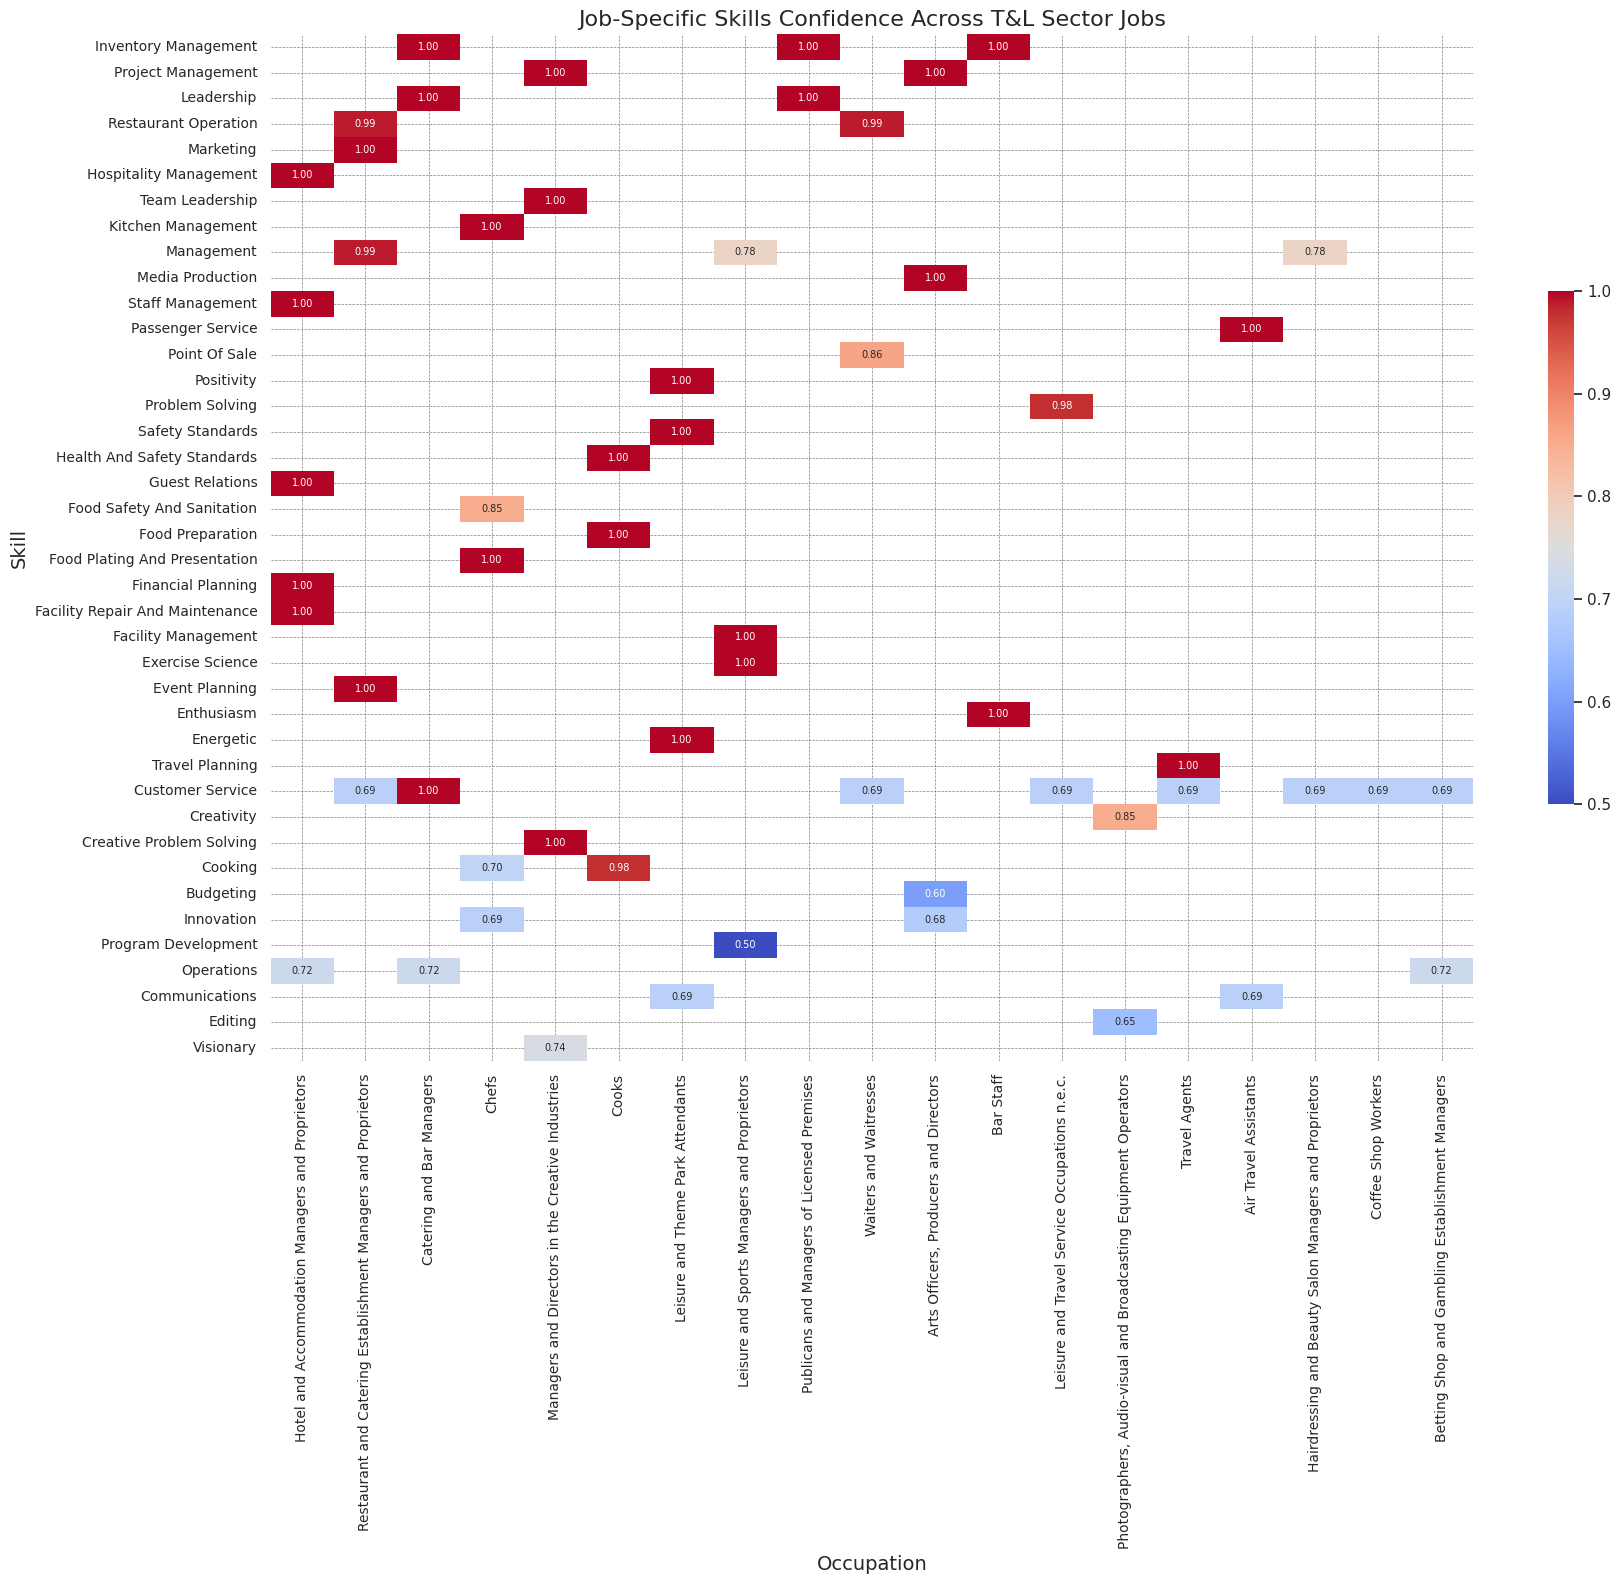

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'skills_categorization_tourism_and_leisure_df' is your DataFrame containing the necessary data.

# Create the pivot table with 'Job Title' as columns and 'Skill' as rows for better visualization
pivot_table = skills_categorization_tourism_and_leisure_df.pivot_table(index='Skill', columns='Job Title', values='Confidence')

# Define a high confidence threshold
high_confidence_threshold = 0.8

# Count the number of high confidence skills for each job title
job_title_high_conf = (pivot_table > high_confidence_threshold).sum(axis=0)

# Sort the job titles by the number of high confidence skills
sorted_job_titles = job_title_high_conf.sort_values(ascending=False).index

# Count the number of high confidence job titles for each skill
skill_high_conf = (pivot_table > high_confidence_threshold).sum(axis=1)

# Sort the skills by the number of high confidence job titles
sorted_skills = skill_high_conf.sort_values(ascending=False).index

# Reindex the pivot table with the sorted job titles and skills
sorted_pivot_table = pivot_table.reindex(index=sorted_skills, columns=sorted_job_titles)

# Set up the matplotlib figure and adjust the figure size to accommodate the annotations
plt.figure(figsize=(18, 16))

# Draw the heatmap with the mask and correct aspect ratio, use a diverging color palette
sns.heatmap(sorted_pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .5}, annot_kws={"size": 7})

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

# Increase the font size of the y-axis labels
plt.yticks(rotation=0, fontsize=10)

# Add a clear and descriptive title and labels with an increased font size for better legibility
plt.title('Job-Specific Skills Confidence Across T&L Sector Jobs', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Skill', fontsize=14)

# Use tight_layout to adjust the padding between and around subplots to minimize overlap
plt.tight_layout()

plt.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5)

# Show the heatmap
plt.show()


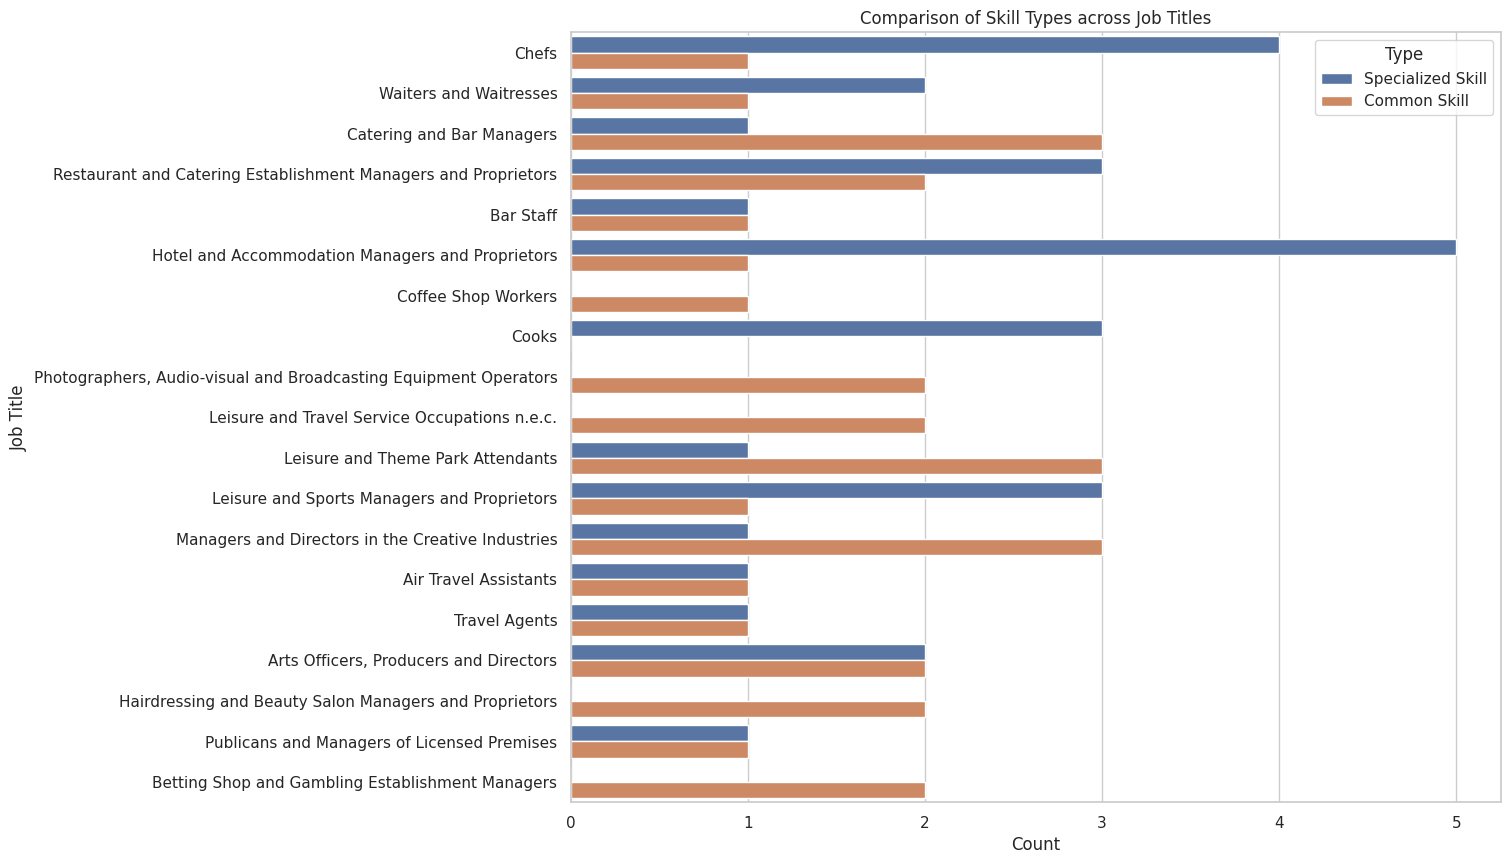

In [ ]:
plt.figure(figsize=(12, 10))
sns.countplot(y='Job Title', hue='Type', data=skills_categorization_tourism_and_leisure_df)
plt.title('Comparison of Skill Types across Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a diverging palette
palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)

plt.figure(figsize=(12, 10))
sns.countplot(
    y='Job Title',
    hue='Type',
    data=skills_categorization_tourism_and_leisure_df,
    palette=palette  # Use the custom diverging palette
)
plt.title('Comparison of Skill Types across Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


TypeError: ignored

<Figure size 1200x1000 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming skills_categorization_tourism_and_leisure_df is your DataFrame

# Define a custom palette
palette = {"Type1": "lightblue", "Type2": "mediumblue", "Type3": "darkblue"}  # Replace 'Type1', 'Type2', 'Type3' with your actual types

plt.figure(figsize=(12, 10))
sns.countplot(y='Job Title', hue='Type', data=skills_categorization_tourism_and_leisure_df, palette=palette)
plt.title('Comparison of Skill Types across Job Titles in the T&L Sector')
plt.xlabel('Count')
plt.ylabel('Job Title')

# Enhance readability
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Type', y='Confidence', data=skills_categorization_tourism_and_leisure_df)
plt.title('Confidence Levels by Skill Type')
plt.xlabel('Skill Type')
plt.ylabel('Confidence')
plt.show()


In [ ]:
skills_categorization_tourism_and_leisure_df['Skill Length'] = skills_categorization_tourism_and_leisure_df['Skill'].apply(len)
plt.figure(figsize=(8, 6))
sns.regplot(x='Skill Length', y='Confidence', data=skills_categorization_tourism_and_leisure_df)
plt.title('Relationship between Skill Length and Confidence')
plt.xlabel('Skill Length')
plt.ylabel('Confidence')
plt.show()


In [ ]:
skill_freq = skills_categorization_tourism_and_leisure_df.groupby(['Skill', 'Type']).size().unstack().fillna(0)
skill_freq.plot(kind='bar', stacked=True, figsize=(12, 10))
plt.title('Frequency of Skills by Type')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data (assuming you've already loaded it)
# skills_categorization_tourism_and_leisure_df = pd.read_excel(file_path, sheet_name='Skills_ Categorization')

# Create a graph
G = nx.Graph()

# Iterate through each job title group
for job_title, group in skills_categorization_tourism_and_leisure_df.groupby('Job Title'):
    skills = group['Skill'].tolist()

    # Add edges for co-occurrence relationships
    for skill1 in skills:
        for skill2 in skills:
            if skill1 != skill2:
                # Increase the weight for the edge if the skills co-occur
                if G.has_edge(skill1, skill2):
                    G[skill1][skill2]['weight'] += 1
                else:
                    G.add_edge(skill1, skill2, weight=1)

# Set node sizes based on degree (number of connections)
node_sizes = [G.degree(skill) * 10 for skill in G.nodes]

# Draw the network graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, node_size=node_sizes, with_labels=True, font_size=10, node_color='skyblue', edge_color='gray')
plt.title('Skill Relationships in Tourism and Leisure Sector')
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data
# skills_categorization_tourism_and_leisure_df = pd.read_excel(file_path, sheet_name='Skills_ Categorization')

# Create a graph
G = nx.Graph()

# Iterate through each job title group
for job_title, group in skills_categorization_tourism_and_leisure_df.groupby('Job Title'):
    skills = group['Skill'].tolist()

    # Add edges for co-occurrence relationships
    for skill1 in skills:
        for skill2 in skills:
            if skill1 != skill2:
                # Increase the weight for the edge if the skills co-occur
                if G.has_edge(skill1, skill2):
                    G[skill1][skill2]['weight'] += 1
                else:
                    G.add_edge(skill1, skill2, weight=1)

# Set node sizes based on degree
node_sizes = [G.degree(skill) * 100 for skill in G.nodes]  # Increase the multiplier if needed

# Set edge widths based on weight
edge_widths = [G[u][v]['weight'] * 0.5 for u, v in G.edges]  # Adjust the multiplier if needed

# Draw the network graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)  # k controls the distance between the nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)  # Adjust font size to fit

# Highlight peripheral skills with fewer connections
peripheral_skills = [skill for skill in G.nodes if G.degree(skill) <= 2]
nx.draw_networkx_nodes(G, pos, nodelist=peripheral_skills, node_color='red')

# Show clusters (if applicable, can use community detection algorithms to identify clusters)
# For example purposes, let's assume we have a list of clusters
# clusters = {'Customer Service': [...], 'Food Preparation': [...], 'Management': [...]}
# for cluster_name, skills in clusters.items():
#     nx.draw_networkx_nodes(G, pos, nodelist=skills, node_color=cluster_colors[cluster_name])

plt.title('Skill Relationships in Tourism and Leisure Sector')
plt.axis('off')  # Turn off the axis
plt.show()
